In [1]:
import urllib
import os
from IPython.display import display, Markdown
from pathlib import Path
import pandas as pd

# block party

<i>local policy information accessible and byte-sized</i>



block party generates a summary and transcript of community board meetings directly from the discussion recording. To learn more about these processes, feel free to check out the open-source project hosted on Github. 

In [2]:
def read_summary(file_name,get_prop=None):
    import os
    import json
    
    path_to_json = os.path.join(os.getcwd(),
                             f'../json_objects//{file_name}.json')
    json_files = json.load(open(path_to_json, 'r'))
    if get_prop is None:
        output = json_files
        return output
    else:
        output = json_files.get("data").get('properties').get(get_prop)
            
        full_word_count = json_files.get("data").get('properties').get('wordCountFullTranscript')
        summary_word_count = json_files.get("data").get('properties').get('wordCountSummary')
        word_count = list(dict(list(full_word_count.items()) + list(summary_word_count.items())).keys())
        #[display(Markdown(f"<font size=\"5px\">{chunk}</font><br/>")) for chunk in output_list]
        return output, word_count

In [3]:
def summarize_text(text_input=None, ratio_input=None, word_count=None):
    """
    Generate summary from the sentences of transcript, using Gensim
    :param text_input: punctuated transcript
    :param ratio_input: proportion of transcript to output as summary
    :param word_count: if entered
    :return: summary of transcript that is shortened to the ratio proportion
    """
    from gensim.summarization import summarize

    summary = summarize(text_input, ratio=ratio_input, word_count=word_count)
    return summary

In [4]:
def text_length(text_input):
    import readtime
    length = readtime.of_text(text_input)
    return length

In [5]:
def make_summary(input_text, phrase_list_input, word_count):
    import spacy
    from spacy.matcher import PhraseMatcher
    nlp = spacy.load('en_core_web_sm')
    
    nlp_text = input_text
    # apply spacy nlp
    doc = nlp(nlp_text)

    # apply matcher
    matcher = PhraseMatcher(nlp.vocab)
    terms = phrase_list_input
    # Only run nlp.make_doc to speed things up
    patterns = [nlp.make_doc(text) for text in terms]
    matcher.add("test", None, *patterns)
    
    # get key sentences
    important_sentences = []
    for sent in doc.sents:
        for match_id, start, end in matcher(nlp(sent.text)):
            if sent.text not in important_sentences:
                important_sentences.append(sent.text)
        else:
            continue
    
    
    
    input_summary = " ".join(important_sentences)
    summary = summarize_text(input_summary, ratio_input=None, word_count = word_count)    
    return summary

In [6]:
def make_summary_topic(topic_title, word_list):
    from IPython.display import display, Markdown
    try:
        summary = make_summary(full, word_list, 200)
        if len(summary) != 0:
            display(Markdown(f"<font size=\"6px\">{topic_title}:</font><br/>"))
            print(text_length(summary))
            output_list = summary.split('\n')
            [display(Markdown(f"<font size=\"5px\">{chunk}</font><br/>")) for chunk in output_list]
        else:
            pass    
    except ValueError:
        pass

In [44]:
def make_executive_summary():
    from IPython.display import display, Markdown
    summary = make_summary(full, keys, 500)
    display(Markdown(f"<font size=\"6px\">Summary:</font><br/>"))
    print(text_length(summary))
    output_list = summary.split('\n')
    [display(Markdown(f"<font size=\"5px\">- {chunk}</font><br/>")) for chunk in output_list]

In [8]:
def generate_topics(input_text, topic_title, word_list):
    from IPython.display import display, Markdown
    display(Markdown(f"<font size=\"8px\">{topic_title}</font><br/>"))
    display(Markdown("<font size=\"3px\">Keywords used:</font><br/>"))
    display(Markdown(f"<li>{str(word_list)[1:-1]}</li>"))
    
    # Generate Summary
    make_executive_summary()

    # Generate Education topic
    make_summary_topic("Education", education)

    # Generate Transportation topic
    make_summary_topic("Transportation", transportation)
    
    # Generate Citibike topic
    make_summary_topic("CitiBike", citibike)

    # Generate Community topic
    make_summary_topic("Community", community)

    # Generate Governance topic
    make_summary_topic("Governance", governance)

    # Generate Envrionmental topic
    make_summary_topic("Envrionmental", environmental)


In [9]:
transportation = ["ferry", "transportation", "cycle", "lane", "rotunda", "curb", 
    "bus", "subway", "car", "driving", "avenue", "e-bikes", "bicycles", "bicycle", "cyclist", "cycling",
    "river", "scooter", "cruise", "driveway", "terminal", "barge", "pier", "gutter", "bike", "stroller", "transit",
  "gridlock", "pavement", "walkway", "helmet", "highway", "curbside", "ramp", "moped",
  "rideshare", "ride", "helicopter", "helicopters", "crosswalk", "intersection", "freight", "rail", "railway",
    "promenadfe", "roadway", "motor", "vehicle",  "vehicular", "wheeled", "pedal", "congestion", "metro",
  "plowing", "signage", "MTA", "CitiBike", "DOT", "D.O.T"]

In [10]:
community = ["DDC", "PSA", "sidewalk","MIH", "AMI", "townhouse","housing","landlord", "apartment", "eviction", "high-rise", "kitchen", "rent", 
           "rental","buildings", "NYCHA", "police","homeless", "alcohol", "shelter","De Blasio","ADA",
  "condominium", "furniture", "real estate", "rooftop", "bed", "room", "tenant", "elevators", "heating", "vacancy"]

In [11]:
environmental = ["global warming","garden", "park", "tree", "bush", "greenway", "green", "air", "planters", "fence", 
                 "outdoor","coastal", "dog", "turf", "planting", "seed", "comfort station", "swings",  
    "trees", "playground", "plant", "gate", "bench", "sandbox"]
education = ["school", "student","teacher","education", "class", "remote learning", "bullying", "bully",
  "college", "university", "curriculum", "blended", "enrichment", "pre-k", "kindergarten", " learning labs",
  "k-8", "campus", "high school", "teachers", "report card", "classroom", "principal", "academic", "educate",
            "ACES", "DOE"]

In [12]:
governance = ["budget", "ballot", "voting", "elections", "polling", "presidential", "absentee"]

In [16]:
video_id_list = ['P0dvf0zTF9A', '-2HTUo7EQR8', '9DocNT5Glsk', 'E7XRxz1eNRw', 'kuuaZ3d-ojA', 'th96_Jp7SEo', 'kPFUhx9qcKw', 'uSTNS7gQsL8', 'RrdYR4EFaZA', 'Q6DE_I0hJks', 'ZMHzWMv0nVc', 'WzrN8O7f0ZM', 'lspscOp1UqQ', 'vWTWMjN9D18', '_OqSOeEzRkQ', '6_ZhdZiZDwA', 'qhXtaFi3RYs', 'GT3_vyq7J8g', 'ISkaqQBM5f4', 'Lv5vWYE8xs', 'MLWfF8DTZ0E', 'C86ar3E1blc', 'YpiiLfu8VSI', 'AZEEX6sugDg', 'YF9PhKs5ji8', 'g1gcT-cVsWM', 'sn1vzM7LFG0', 'uIf9gnmZonk', 'qopdwGLdEFI', 'uCwTty8NkGw', 'Ho1bSCKf2Yk', 'tZwlxPuoUJ0', 'eukVs_cjzPw', 'Vi_m9THIV9A', '00zq-buJ5AQ', 'T6Kg-QTGg1U', 'kTuNEaJHVPw', 'yFUGrB6T07Y', 'Ok94tkLx2HY', '0bASeaH6NqQ', 'R-6aV2Q9b7M', 'Vbz538KCbe0', 'FvAOhNg1mJM', 'MxTid4MyPOc', 'qVsbQrOIN2U']



In [17]:
citibike = ['CitiBike', 'citibike', 'city bike', 'City Bike', 'congestion price', 'congestion pricing', "congested",
           "transit system", "vehicle congestion", "car parking", "bikes", "bike rack", "bike lane", "CityRise", 
           "trash corral", "safer street", "better transit"]

In [35]:
video_id_list =['dZLhbcu4egk', 'Ly_DyNmo1DA', '4VYd7kZy-so', 'BuhJXsOg-KU', 'qHm1VJZETpI', 'FSMf9krrybk', 'AuioPrrutYE', '-Ez-wtiKSOg', 'NaLAEKem6Eg', 'byp-_-AqrmI', 'AFfdjMKLPAg', '8EcepN02T4U', 'ycD8kVwiHoA']


In [36]:
len(video_id_list)

13

In [37]:
video_id_path = Path('../../community_board_meeting/data/')
video_id_file = os.path.join(video_id_path, 'video_id_list.csv')
video_id_df = pd.read_csv(video_id_file)

In [38]:
path = os.path.join(os.getcwd(),'../../community_board_meeting/json_objects')
# get all files in directory
directories = os.listdir( path )

In [39]:
processed = [x.split('.json')[0] for x in directories]

In [40]:
video_id_list = list(set(video_id_list) & set(processed))
#video_id_list = ["hTjMrcmSMzo"]

In [41]:
len(video_id_list)

4

In [32]:
#video_id_list = ['Tsa95F4R0oY']

In [33]:
def output_text():
    for i in range(len(video_id_list)):
        video_id = video_id_list[i]

        author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
        display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))

        title = read_summary(video_id).get('data').get('YoutubeMetadata').get('title')
        display(Markdown(f"<font size=\"3px\">{title}</font><br/>"))

        date = read_summary(video_id).get('data').get('YoutubeMetadata').get('publishDate')
        display(Markdown(f"<font size=\"2px\">{date}</font><br/>"))

        description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
        description = description.replace('\\n'," ")
        description = urllib.parse.unquote(description)
        description = description.encode("ascii", "ignore")

        display(Markdown(f"<font size=\"2px\">{description}</font>"))
        url = f"https://www.youtube.com/watch?v={read_summary(video_id).get('data').get('properties').get('videoURL')}"
        print(url)
        print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
        print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
        print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")
        print(author, title, date, url)
        full, keys = read_summary(video_id, 'fullTranscript')

        generate_topics(full,"Summary", keys)

In [ ]:
Brooklyn Community BoardGeneral Board Meeting
Agenda- https://bit.ly/12920agenda

In [42]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    title = read_summary(video_id).get('data').get('YoutubeMetadata').get('title')
    display(Markdown(f"<font size=\"3px\">{title}</font><br/>"))
    
    date = read_summary(video_id).get('data').get('YoutubeMetadata').get('publishDate')
    display(Markdown(f"<font size=\"2px\">{date}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n'," ")
    description = urllib.parse.unquote(description)
    description = description.encode("ascii", "ignore")
    
    display(Markdown(f"<font size=\"2px\">{description}</font>"))
    url = f"https://www.youtube.com/watch?v={read_summary(video_id).get('data').get('properties').get('videoURL')}"
    print(url)
    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")
    print(author, title, date, url)
    full, keys = read_summary(video_id, 'fullTranscript')

    generate_topics(full,"Summary", keys)

<font size="5px">MCB1</font><br/>

<font size="3px">Waterfront, Parks & Cultural Committee</font><br/>

<font size="2px">2020-12-16</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=dZLhbcu4egk
{'uh': 256, 'um': 303}
14 min read
102 min read

MCB1 Waterfront, Parks & Cultural Committee 2020-12-16 https://www.youtube.com/watch?v=dZLhbcu4egk


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'park', 'space', 'project', 'parks', 'street', 'battery', 'sense', 'resiliency', 'idea', 'water', 'center', 'farm'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Let's then move to item number two item: two is a proposal for a nearly two acre park in the Holland Tunnel Rotary, and we have with us Dasha Capilova and Peter Balman who've come up with this idea So the two of us met at Cooper Union, where we were students and we have lived in New, York City on and on off, since 2002 and part of our practice is focused on finding opportunities for urban public space in cities, specifically in areas that are forgotten or neglected.</font><br/>

<font size="5px">So instead we want this to really be a very open-ended dialogue with the community and with the city and then third, we are very interested in adding people to our team who have expertise complementary to our own, so we'd like to collaborate with others who have expertise, working with city agencies, building and operating non-profits, and developing funding and operational feasibility models for the park and the surrounding areas.</font><br/>

<font size="5px">So you would you wouldn't see the tree canopies, but you would see the park, but it definitely is , we feel that all components of this project are open to discussion and that's a really good point but we're also planting we're planning to plant trees, not only in the center, but also around the perimeter and all those small perimeter parts and like in the rendering that we're looking at right here in the large sloped.</font><br/>

<font size="5px">It would just completely destroy the sense of the space as a piazza But in the long run we felt would be a space that would endure in the city and that would become a real center right The grand design is overwhelming, especially since it includes possible ice skating and swimming or spa just over the top, which is fantastic, but to be practical one of the things that I when you started this whole presentation, I immediately started thinking about the cisterns and the water capture that we're learning about through the resiliency measures.</font><br/>

<font size="5px">You know ideally filled with benches, as well as the street level parks, so again we're very open to what the kind of the programming and the design of that central space is.</font><br/>

<font size="5px">You know, I think it's really critical, that these kinds of ideas come to fruition sometimes and the idea of a park in anywhere in New, York City is a great idea but I think Wendy really tapped into what is really a launching pad for this project, which is really talking about it as a moment to add resiliency into the neighborhood in a real way, and so I would absolutely turn this on its head and reconsider the way you want to advertise it as it were, and, frankly, to really look at it with engineers and designers of this kind of sister and idea, because when I saw it I thought oh they're, You know they're going to fill this with the water.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">So there we really want children to have an accumule accumulative science experience as they move through the park from coming to the urban farm, going on a ride on c-class.</font><br/>

<font size="5px">Worry you might reach out to the middle and high school students they have community service hours and even though we're in a pandemic I think those students are potentially a source for volunteer work, so Lmc Millennium, High school, those are have been good sources of volunteer work for some of the parks downtown.</font><br/>

<font size="5px">Those eight students now have risen to 7,000 students a year come to the urban farm, so I have great fondness for millennium high school and for that collaboration, and so it's I know the park service is interested in education, doing more in the building for education, for some sense of understanding, all the other parks we have in New York state that are heritage areas.</font><br/>

<font size="5px">So, as a slight kind of sidebar to the project, we we've been collaborating with the Tribeca community school, so there's actually there's three preschools.</font><br/>

<font size="5px">Just on Erickson Place alone, like right across from the site and Tribeca community school got in touch with us.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">If any of you were in Madison Square car part for the Taraceta Fernandez art project, which were all these mirrored elements and a wonderful channeled feeling through the park, these kind of aren't, you know inspired, but these are very organic kind of bean shaped elements that will give us the shade we want and, as you see from the prototype, the it's great fun.</font><br/>

<font size="5px">and then we're kind of folding the size of the roadway up, so that we protect pedestrians in the park from you know the sound and the ways all that kind of unwanted stuff right So DOT would need to be involved too.</font><br/>

<font size="5px">A very well-known spanish architect who you know was like a chair at the G of Harvard and all this stuff, and it's also kind of a sunken park surrounded by a roadway, but it's about the same size, but I think the roadway itself would take about 80 weeks and because about eight weeks per ramp, but it's good.</font><br/>

<font size="5px">There is a roof project for the south side of the pier that they expect to be done in May. That will allow the car parking activity to reopen facade work.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So at street level the loop defines eight to ten smaller intimate parks and these parks act as extensions of the sidewalk in between these smaller parks are larger, sloped areas which are a mixture of green space and permeable hardscape, and they contain stairs ramps and elevators that lead from the sidewalk down to the central park around the park in the corners below the ramps, where the spaces are closed off and darker You can see the skylights kind of permeating to the lower interior spaces and they become benches and the small sidewalk parks, so the upturned walls of the new rotary can frame a new entrance experience to the city and the walls can serve as signage or as a space for public art, welcoming people into the city from the sidewalk.</font><br/>

<font size="5px">The entire project takes on the appearance of a large public sculpture and where the curved loopholes encounter the pedestrian directly, we've sculpted them sloping them down to the scale of the person and down to frame the entrances of the small sidewalk parks and here's some views of these parks.</font><br/>

<font size="5px">So the you know the walls, the sidewalk parks, the kind of sloped parks, the Central park, the interior spaces.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">and then the tree houses that it flows into all surrounded by gardens and many of these areas are for water retention and like little mini creeks and as the architects on the project said, the most fun time to be here is after a big rainstorm, because the way the water moves through the space is very much a part of this environment.</font><br/>

<font size="5px">The other is communicating with all dog owners the need to respect fragile landscapes and that you know that to stay on a hard surface and get a good walk and We would like to make the forest farm labyrinth gardener a dog-free zone.</font><br/>

<font size="5px">So this is a series of images dealing with the central park space, so this is showing it as a kind of hardscape piazza as a planted park as a venue for farmers markets, a children's park with a lot of playgrounds and playscapes as a venue for fairs or large-scale public sculpture, a venue for outdoor screenings or performances and plugging into that there's also an idea that interior ring that forms the roadway.</font><br/>

<font size="5px">So the idea- and the hope and the kind of the very real possibility is that the air, even at street level, would end up being cleaner for pedestrians than it is now you know, building a park, we're not trying to make a park.</font><br/>

<font size="5px">MCB5</font><br/>

<font size="3px">JOINT Committee Meeting</font><br/>

<font size="2px">2020-12-16</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=8EcepN02T4U
{'uh': 328, 'um': 315}
9 min read
53 min read

MCB5 JOINT Committee Meeting 2020-12-16 https://www.youtube.com/watch?v=8EcepN02T4U


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bid', 'street', 'expansion', 'services', 'businesses', 'buildings', 'business', 'assessment', 'property', 'neighborhood', 'day', 'department'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">You know in our relationships with the institutions here, whether it's Madison Square Park, Conservancy, Baruch college, the businesses, property owners and residents has been a constant and we think we've done a lot to make a big difference in terms of both the quality of life, the look and feel and the economic vibrancy of the neighborhood over the past decade So you know just a few items that many of you who have been in this community for quite some time, pre and post bid probably have witnessed and notice over time before the bid.</font><br/>

<font size="5px">And, of course, that's also working closely with the department of Homeless, Social, Services and Department of Homeland services to provide that support and then, in terms of marketing and program, business support I touched on this a little bit, but you know we spent a lot of time telling folks what we're up to making sure that people feel that Flatiron nomad the greater neighborhood is a place that they want to shop in work in and take a stroll through.</font><br/>

<font size="5px">So this included flooring forming a steering committee of businesses, property owners, residents, resident organizations, creating a statement of need for the expansion, doing a needs assessment over the past two years, developing a modified district plan that met this met, those needs holding public meetings, conducting ongoing outreach and documenting support and then submitting a proposal to the city department, small business services and then, as the next chapter here, is what we're doing tonight.</font><br/>

<font size="5px">That's needed particularly right now we're working with the chamber on the New, York City, small business resource network and As a you know, as we represent interest both on the property owner and the business side of this, we've provided direct promotional campaigns from the all in flat iron and all in nomad to drum up some business for our restaurants and dry good retail over the fall we've distributed, masks to businesses , I think it ended up being somewhere between 50 and 60,000 mass that we distributed on behalf of the city to businesses across the bid of expansion area and beyond, It's I hate to say it like that, but you know whether it's through the open restaurants and open streets can't work that we've been working with the businesses and community on or just a vision for a safer and more accessible public realm for all sorts of for everyone.</font><br/>

<font size="5px">You know, especially with the conversations let's just say, going on right now, it's one that we would certainly be you know: I've studied up on and kind of worked with the community, our stakeholders, of course, which are a wide array of them, whether it's on the property side, the business side, the residential side, I mean we're in the business, is making sure that this neighborhood gets back up on its feet as best as it possibly can some blocks on the northern boundary of your of the extended bid, are currently zoned manufacturing, meaning that no residential building, no residential development can happen or conversion can happen.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">and then we taper out on the east side from Park Avenue south over to Lexington, to include the Baruch college campus and these you know this neighborhood.</font><br/>

<font size="5px">You know in our relationships with the institutions here, whether it's Madison Square Park, Conservancy, Baruch college, the businesses, property owners and residents has been a constant We do have a special class that was created at the onset of the bid for large, very large commercial buildings that take up one full block.</font><br/>

<font size="5px">But we're saying what we're asking to do here is assess the commercial portions of those buildings at the same rate as class a and I'll get into this in a second, but just quickly, the rest of the assessment class, individual, residential co-ops and condos.</font><br/>

<font size="5px">but so this is the large mix use buildings class map.</font><br/>

<font size="5px">In fact, you know there are two buildings that are excluded on Madison Avenue on the West side, going up to the southwest corner, one is a large commercial, a decent sized commercial building class a and another one is like a commercial building that has a furniture, store, luxury store, Lizoni</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">These are the boundaries that were ultimately approved back in 2005 2006 through the legislative process, roughly from about 21st street on the south bits and pieces of 6th avenue up to 23rd street, and then we taper in as you can see towards Broadway up until about 28th street, It's really concentrated on kind of an upward thrust, along sixth avenue, as a gateway to Midtown into Penn, Plaza and Harold Square.</font><br/>

<font size="5px">You know, obviously it's not yours yet, but even on sixth avenue, where the bid is already operating, it certainly looks and feels very different from Fifth, Avenue and Broadway.</font><br/>

<font size="5px">We do have a very different feel around sixth avenue and the current bid boundaries 24th, Street and south than we do up in the expansion area.</font><br/>

<font size="5px">and I would also like to suggest that sixth avenue in every possible aspect of what the bid does, whether it's sanitation, homeless, outreach marketing or any other aspect become a priority.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">I also want to disclose at the very beginning of this meeting that Al, although I am sitting here and I presented, my myself as the chair of the land use housing and zoning committee , that's something we take great pride and joy in managing activating cultivating and making it a community living room for the neighborhood Forty thousand, of course, we're hoping we return to that number as we recover over the coming year and the way we underwrite our assessment formula, we'll talk about a little bit more shortly, is using square footage of buildings of properties to determine how we apply an assessment rate.</font><br/>

<font size="5px">So much I just have a quick question, which is that if this was never meant to reach residents and if residential buildings in the co-ops and Congress have never been assessed, I mean aside from the nominal dollar, I'm a little unclear about the rationale about why property owners should be assessed on the residential square footage of their mixed-use buildings.</font><br/>

<font size="5px">, I'm just a little unclear on mixed-use small buildings that would have retail on the ground floor and then residential above, which is, you know very typical of buildings, south of 23rd street.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">so yeah, just we'll give you the lay of the land of who we are some facts on the expansion, the some of the needs of services that we've explored with the community over the past number of years in terms of pushing to move on this expansion of our services, a look at the assessment budget and formulas that are required to underwrite the services and programs, as well as the outreach, engagement and support that we've been working on over the past year, both pre and post Covid-19 outbreak.</font><br/>

<font size="5px">This is how it's been done since the late 70s, when the bid pro the first bids were created and it almost acts kind of like a cam, a community assessment kind of like how malls would work where there'd be a common fee, that a fee that's paid by each vendor in that case, to make sure that there's common area support throughout the district, so we're currently a 3.</font><br/>

<font size="5px">Here we were getting a lot of calls for servicing it, and just the sheer amount of density and conditions required that we had an ample enough budget to do a good job there without letting that corridor down.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">So this is a hundred plus block faces that that's in the blue air We've worked very closely with the business community in both on 20th street and on Broadway and 29th street to help maintain and introduce open streets and out and outdoor dining, it's been really successful.</font><br/>

<font size="5px">So yeah- and one thing I'd like to add with one street in particular- is that it isn't in the expansion area right now, but we did work hand-in-hand with a lot of restaurants along the block between Broadway and Park Avenue South for their very successful outdoor dining setups that have expanded into the road bed worked them on outreach on developing that plan, for them maintenance and working kind of liaison being a liaison between them in the city with D.O.T, and that is one of the more I mean, admittedly unbiased, but The bid created tree pits they plant the flowers in the tree, pits they have hanging baskets, say the and the clean streets they come and they sweep in front of my building is that the same service, those the same services that you'll provide to side streets in the expansion district</font><br/>

<font size="5px">BCB10</font><br/>

<font size="3px">Police and Public Safety Committee Meeting</font><br/>

<font size="2px">2020-12-16</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=-Ez-wtiKSOg
{'uh': 16, 'um': 22}
2 min read
7 min read

BCB10 Police and Public Safety Committee Meeting 2020-12-16 https://www.youtube.com/watch?v=-Ez-wtiKSOg


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'owner', 'music', 'stipulations', 'menu', 'business', 'premises', 'food', 'attorney', 'beer', 'restaurant', 'floor', 'plans', 'establishment', 'level', 'draft'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">the attorney's Rep So John asked me to appear on his behalf and assist Lewis Louis I usually handle the community Board meetings, hello, Justine.</font><br/>

<font size="5px">The owner Louis was he present is present, and he also has one of his attorney.</font><br/>

<font size="5px">We do have a draft of the menu sent in to the Community Board Office earlier today, premise photos and floor plans for both indoor and outdoor seating areas were provided and the owner intends to maintain outdoor dining in the rear yard.</font><br/>

<font size="5px">There is no adverse history associated with this owner, as this owner has had several other establishments owned in this community, known as spartan, Souvlaki, One and spartan Souvlaki 2, so Joe. If you want to just browse through that, so the committee can look at the floor plans and the menu that would be great, so you just roll back one, so the rear yard will have room for five.</font><br/>

<font size="5px">The menu will be finalized pretty soon and we should have hard copies within a week The wording for our meeting is that we say that the committee's decision is to deny an application unless the owner agrees to following stipulations so, and they are basically pretty routine for this type of establishment.</font><br/>

<font size="5px">but most restaurants such as this have the usual eight to ten stipulations.</font><br/>

<font size="5px">just like I said my parents owned and operated a successful business for 25 years kind of got to the age of where they just wanted to get out and I want to continue the legacy of the gyro business and like having a nice glass of wine or beer or a nice greek beer imported from Greece, with your gyro kind of accents, the food a little bit to kind of reminisce like you're in Greece , I will abide by it's, not a sports bar, so there will be I, have a TV up inside just for the news and to keep people occupied I guess maybe waiting for food keep up with what's going on in the world, but as for a TV in the backyard loud music.</font><br/>

<font size="5px">So I'm going to read what the usual stipulations are for an establishment like this.</font><br/>

<font size="5px">Okay, so I will say that the committee will deny this application unless the owner agrees to the following stipulations: that the premises will operate as a restaurant, that there will be no sale or consumption of alcohol on the premises until appropriate authorization is issued by the SLA that the hours of operation, as you had in the application will be Sunday through Thursday 11 a.m, to 11 P.M and Friday, and Saturday 11 A.M to 12 a.m. Is that that's correct, right?</font><br/>

<font size="5px">Okay, so as the owner has agreed to the above stipulations, committee can I have a motion to accept this recommendation motion to accept hey sandy</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Yes, okay, well, I need I.</font><br/>

<font size="5px">Think you need to circle whether you're going to be using a bicycle or not.</font><br/>

<font size="5px">If, like I said by any chance, there is a bicycle that does go out: I will immediately notify you guys or if I have one right.</font><br/>

<font size="5px">BCB8</font><br/>

<font size="3px">DCP Meeting MCROWN Local Population and Demographic Trends</font><br/>

<font size="2px">2020-12-15</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=NaLAEKem6Eg
{'uh': 199, 'um': 251}
6 min read
37 min read

BCB8 DCP Meeting MCROWN Local Population and Demographic Trends 2020-12-15 https://www.youtube.com/watch?v=NaLAEKem6Eg


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'population', 'growth', 'context', 'percent', 'housing', 'areas', 'trends', 'data', 'increase', 'jobs', 'share', 'households'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">So, let's get started so, as Jonah said, we're first going to take a look at the citywide trends, so that consists of population growth and then we're going to look at job growth and then looking at housing, affordability and then moving on to racial composition and the changes action of the city The data presented here today was collected before the current covit 19 pandemic.</font><br/>

<font size="5px">People in those areas are severely rent burdened, so we looked at this very quickly earlier, so I want to come back to this New York City's population has grown and changed a lot, and it's become more diverse over the last 50 years and in the 2012 2016 ACS, the American Community Survey New York City's population is comprised of 32 white non-hispanic, 29 hispanic, 22 percent, black non-hispanic 14 asian Pacific islander and 3 percent other.</font><br/>

<font size="5px">yes, you're right I will make the corrections before we share this slide with you guys If there are competence, average compensation data available for the growth in jobs from 2010 to 2017- This information on jobs was the source for it is on our website or if you look at planning and regional planning, there are two reports on job growth in New, York, City and in the metropolitan region, and I think the compensation data would probably be in ACS as well, although trying to get average across everything, maybe a little bit challenging I put a link to the geography of jobs This study that we referenced for telework capability took surveys of jobs and asked workers to characterize their jobs by like their tasks, and they grouped the ones where, if people say like most of my tasks are done, outdoors or I, don't use email a whole lot at work.</font><br/>

<font size="5px">yes, great, okay, so moving on to the neighborhood trends agenda, we're gonna be looking at population growth, age, household composition, race, income, education and industry of our data is sourced from the decennial census and the ACS.</font><br/>

<font size="5px">Only Cd2 has a comparable 54 percent share of non-f of non-family households, so we also wanted to look at demographic change in race and, as we see here from this graph as the population grew, the demographics of the context area have changed significantly since 1990.</font><br/>

<font size="5px">The share of the black non-hispanic population has decreased in the context area at a higher rate than that of Cd8 9 and 3.</font><br/>

<font size="5px">We also looked at percent of households living under the poverty line, comparing that change from 2006 2010 to 2014 2018, so 11 of the households in the context area live under the poverty line, and this is half as many households living in poverty as cd8 and a lower rate than that of Brooklyn and New York City.</font><br/>

<font size="5px">New York City, especially Brooklyn and Manhattan, had gained a significant number of jobs since 2010, as we saw in this presentation, citywide housing production has not kept up with the significant job growth in the area, leading to increased demand and rising housing costs.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">As we all know, there was a city-wide economic crisis, followed by the flight of the middle class and then from 1980 onwards.</font><br/>

<font size="5px">This was due to city-wide economic downturn and the flight of the middle class that we talked about in the first half of this presentation in 1980s in the 1980s there was a 12 increase in population and a lot of that can be attributed to immigration from the Caribbean and Latin America, in particular, between 1980 and 86.</font><br/>

<font size="5px">The second one is high school and then moving on to some college or an associate's degree, and then the last category is a bachelor's degree or higher, so the oh god, sorry.</font><br/>

<font size="5px">Meanwhile, the there was a slight decrease in numbers of people holding less than a bachelor's degree, so the less than high school, the high school and some college associates degree those categories.</font><br/>

<font size="5px">The remaining categories just want to know here that many of these categories, particularly education, health care, arts, entertainment and food services, were really hard hit by Covid-19, and this graph was put together with the help of Cb8's very own gibvoconi.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Meanwhile, the metro region in between 2000 and 2010 grew by about four percent, excluding New York City in that same time period.</font><br/>

<font size="5px">Color are areas that have seen a decrease in the share of the hispanic population, while areas in yellow are areas that have seen an increase in the hispanic population and what that results in is this kind of a map, so each DOT represents 100, New Yorkers, and what this shows is that New York City is incredibly diverse, but it's also very segregated.</font><br/>

<font size="5px">The larger the DOT is, the more people in those areas are traveling, so On top of Cd8, the study area is at the intersection of three districts, so we felt that it was very important to look at trends in the neighboring areas and throughout the next dozen or so slides we're going to be comparing a lot of the trends with trends in CD, 2, 3, 8 and 9 just so that we can see what's happening in the area at large.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">New York City, especially Brooklyn and Manhattan, had gained a significant number of jobs since 2010, as we saw in this presentation, citywide housing production has not kept up with the significant job growth in the area, leading to increased demand and rising housing costs.</font><br/>

<font size="5px">As you said, there are a lot of influences that we can't track as carefully or directly to what we would like to see happen in M crown, but I do want to say that, based on what you've shown us, we should be setting a target based on the stability over the past 20 years of that changes in population I strongly suspect that the difference in income is from people who could no longer afford rent in Manhattan moving to a part of Brooklyn.</font><br/>

<font size="5px">some of the data that Amy showed was that those areas experienced similar trends that even the tracks that included Pacific park experienced so a change in black and hispanic populations, rising incomes, rising educational attainment and rising housing costs, and so we can get back to you on what we have for that specific census tracts that pick up Pacific park.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">So there have been a number of contextual area-wide rezonings in this neighborhood, which is represented in green here short of a couple of significant upzonings such as downtown Brooklyn, fourth Avenue, and then there are small pockets around the other neighborhoods.</font><br/>

<font size="5px">in 1990 the context area population was over three-quarters, black, which is represented in green here and under 12 white non-hispanic.</font><br/>

<font size="5px">Despite the ongoing construction of Pacific park, the big picture is that there's still a housing shortage, especially in Brooklyn and in the context area and limited opportunities to grow nearby between 2000 and 2018.</font><br/>

<font size="5px">right so, overall, it is where in each case, and it increased in places like in Canarsie and Marine park and northern portions of the Bronx, so the change in population and the loss in the black population in some of these areas is due to a number of different reasons.</font><br/>

<font size="5px">some of the data that Amy showed was that those areas experienced similar trends that even the tracks that included Pacific park experienced so a change in black and hispanic populations, rising incomes, rising educational attainment and rising housing costs, and so we can get back to you on what we have for that specific census tracts that pick up Pacific park.</font><br/>

In [14]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    title = read_summary(video_id).get('data').get('YoutubeMetadata').get('title')
    display(Markdown(f"<font size=\"3px\">{title}</font><br/>"))
    
    date = read_summary(video_id).get('data').get('YoutubeMetadata').get('publishDate')
    display(Markdown(f"<font size=\"2px\">{date}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n'," ")
    description = urllib.parse.unquote(description)
    description = description.encode("ascii", "ignore")
    
    display(Markdown(f"<font size=\"2px\">{description}</font>"))
    url = f"https://www.youtube.com/watch?v={read_summary(video_id).get('data').get('properties').get('videoURL')}"
    print(url)
    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")
    print(author, title, date, url)
    full, keys = read_summary(video_id, 'fullTranscript')

    generate_topics(full,"Summary", keys)

<font size="5px">MCB1</font><br/>

<font size="3px">Environmental Protection Committee</font><br/>

<font size="2px">2020-12-09</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=Tsa95F4R0oY
{'uh': 206, 'um': 664}
16 min read
105 min read

MCB1 Environmental Protection Committee 2020-12-09 https://www.youtube.com/watch?v=Tsa95F4R0oY


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'building', 'text', 'island', 'flood', 'buildings', 'resiliency', 'feet', 'zoning', 'space', 'water', 'concerns', 'amendment', 'height'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">So what that effectively means is that in some parts of these special purpose, districts say in Tribeca or in battery park city, if you were building a new building, effective height limits, are essentially increased by 10 feet, to accommodate more restricted uses on the ground floors and in basement levels of building and flood plain to kind of incentivize and make and provide increased flexibility to design designers, architects and professionals in historic districts.</font><br/>

<font size="5px">So if you were working on a historic building in Tribeca- so thank you and Allison is a person who can help us a great deal in answering some questions on this zoning for coastal flood resiliency so, and also governor's island and probably a million other things Does anyone just to remind everyone tonight is a conversation again giving us a little additional time to look at this city-wide zoning text amendment and ask our questions and then it's next week at next week or two weeks?</font><br/>

<font size="5px">There you are okay, I, really think we have a meeting with our landmarks group because, like what I think is that this zone and makes a lot of steps if I were a building owner in the South Street Seaport or on the front of this tavern block I was basically going to lose my first floor economy because of flood issues.</font><br/>

<font size="5px">It overrides the existing text, amendment that is I, think you're, referring to the South Street Seaport subdistrict in lower Manhattan, which, where the 120 feet rule applies, so it allows for that 120 feet to be measured from a different point, which is 10 feet above so it's effectively resulting in 130 foot, tall buildings right and the other question we have Alice Thank you, Alison and the other question I have is when we're dealing with coastal resiliency.</font><br/>

<font size="5px">okay with the ground floor, flood proofing, part of the text, I've answered this question in some contexts without pointing out that actually, the current temporary provisions in zoning allow for a property owner to exempt the total ground floor area of the building if they do a dry floodproofing, whereas the tech that this text amendment reduces that to only the first 30 feet from the street frontage, and the reason that has been changed is that there were some projects that DCP noticed where developers were building an unusually short first floor, so that they could capture that benefit and make a taller building.</font><br/>

<font size="5px">But I think that when you're talking about a new building and especially a very large lot new building with a lot of street frontage I understand the change that you made to make it so that it's only the floor area to set back 30 feet from the sidewalk is taken out, but, for instance, in a property like 250 water or for the governor's island buildings.</font><br/>

<font size="5px">you know it's like the trifecta, so you went from 250 water street to the citywide coastal zoning text, amendment and now we're going to governor's island.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Okay, some of the areas that we want them to study more closely are about shadows, specifically the Pearl Street playground, the tree canopies along Pearl Street at Delores, Square Park, the Peck Slip school roof playground how it impacts the blue school and the Seaport district.</font><br/>

<font size="5px">you know all the buildings, but especially school children in the building that also came up in case If you remember, when Paxlet became a school, they said that it was impossible to close peck slip due to circulation needs.</font><br/>

<font size="5px">that when Peck slips school open said that it was required to leave that street as a definable street and in fact, that's also where the school buses drop off.</font><br/>

<font size="5px">So I think we do need to have a plan that will actually be able to address that, and it will go on for years and I.</font><br/>

<font size="5px">Don't think that any sane parent would want to send their child to a school where they think that their children will not be able to learn in that environment for years.</font><br/>

<font size="5px">So we're essentially closing the school.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">We think that the pile driving for some reason is not a good thing for school kids I mean they have a grid that runs from basically the river all the way up to Pearl Street, okay, anything else, good, okay, I'm certain know from the D.O.T, and it turns out the damage went down to the support beams in 2006 16 that finally proved how the damage on the 37 other permits occurred.</font><br/>

<font size="5px">But of course we can't have people just driving huge piles into the ground and destroying the you know Businesses that operate downtown the site is about a hundred meters, away from the Brooklyn bridge, on-ramp, the FDR on ramps and the on-ramp for both FDR north and FDR South.</font><br/>

<font size="5px">Currently is the following: the Ceqr Technical Manual, which is the city environmental quality review states that the quantified transportation analyses may be warranted if a proposed action results in 50 or more vehicle trips and or 200 or more transit pedestrian trips.</font><br/>

<font size="5px">You know we run the transportation to and from the island, I can't think of another park that is responsible for getting people to and from it solely.</font><br/>

NameError: name 'citibike' is not defined

In [139]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    title = read_summary(video_id).get('data').get('YoutubeMetadata').get('title')
    display(Markdown(f"<font size=\"3px\">{title}</font><br/>"))
    
    date = read_summary(video_id).get('data').get('YoutubeMetadata').get('publishDate')
    display(Markdown(f"<font size=\"2px\">{date}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n'," ")
    description = urllib.parse.unquote(description)
    description = description.encode("ascii", "ignore")
    
    display(Markdown(f"<font size=\"2px\">{description}</font>"))
    url = f"https://www.youtube.com/watch?v={read_summary(video_id).get('data').get('properties').get('videoURL')}"
    print(url)
    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")
    print(author, title, date, url)
    full, keys = read_summary(video_id, 'fullTranscript')

    generate_topics(full,"Summary", keys)

<font size="5px">MCB3</font><br/>

<font size="3px">Manhattan - Landmarks Committee -</font><br/>

<font size="2px">2020-12-08</font><br/>

<font size="2px">b"Agenda  1.    Approval of previous month's minutes 2.    Certificate of Appropriateness: 12 Eldridge Street (The Museum at Eldridge Street) - Installation of 2 areaway gates and 4 anti-climb cages at existing fire escapes 3.    Vote to adjourn"</font>

https://www.youtube.com/watch?v=29X3IvNUJ_8
{'uh': 91, 'um': 251}
7 min read
44 min read

MCB3 Manhattan - Landmarks Committee - 2020-12-08 https://www.youtube.com/watch?v=29X3IvNUJ_8


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'building', 'security', 'fire', 'landmark', 'pole', 'gates', 'elevation', 'metal', 'level', 'poles', 'measures', 'fencing', 'staff', 'consultant'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">You can see one exactly at the north, one at the south 12 feet: high five inches diameter metal painted black mounted with a light and a security camera and then you can see the boundary of the fencing, the Areaway fence, okay and the gates, so that you can gain access to the area ways you can gain access to the steps going down to enter the museum.</font><br/>

<font size="5px">Yes, is the ADA, so, as you can imagine, we had very specific size limitations and dimensional limitations, but we responded to the recommendation of the security consultant that the museum engaged in placing these polls in these two locations, and we identified the manufacturer of the polls and security lighting and camera that would mount onto the pole and again You may recall that Trinity Church on Broadway a number of years ago installed something similar with lights and cameras on mounted on poles, and so this is some something similar, but not as many and certainly there's not a need We know that there are a number of pavers that are blue stone that would need to be lifted to accommodate the electrical conduit run and then replaced not reinstalled, I should say reinstalled once the electrical conduit feed into the building has been established and then at the south area way.</font><br/>

<font size="5px">You know they're not going to prevent somebody with metal cutters and you know whatever they want to do, but it would certainly be a deterrent for anybody that was trying to gain access onto the fire escape, and so the intention is to do something in an extremely light metal mesh so as not to you know, compromise the visibility of the historic landmark and certainly not to diminish any light coming into the building through the windows beyond, but at the same time create this anti-climb measure.</font><br/>

<font size="5px">You know that in placing this poll, these two polls that they would be beyond the property line and we did apply to the New York City DOT revocable consent department, asking for their determination as to whether or not a revocable consent would be required, and they said no, because you have demonstrated that the area way fencing and gates existed prior to 1940 that they would not need to issue a permit for the proposed polls.</font><br/>

<font size="5px">Well, you know, I dare say a home depot or somebody needed an areaway fence, a gate, and that was procured, but it does not rise to any level of doesn't do preservation, no, not something, and then this is the view down the north area way really and then just imagine that in that corner there, where you see the right angle of the metal that no and tucked in the corner here close to the street or the sidewalk, keep bringing it closer We just you know, have the existing condition photographs but with I think very detailed drawings that illustrate the intention and location of the two poles.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">So in addition to applying to the Landmarks Commission for the security polls, we also went to the department of transportation and their revocable consents department and because we were able to prove that the Areaway fencing was in existence before 1940 A 1905 drawing elevation drawing of the building D.O.T said that they would not have any comment and wouldn't require a revocable consent to be issued for the two security polls.</font><br/>

<font size="5px">, you can see the areaway fencing and then the rail is where the gates We had our office had worked as the preservation architect for the high bridge rehabilitation which opened in 2015, and this type of very similar type of web mesh metal mesh stainless steel metal mesh was used on high bridge to supplement the historic railing which was not high enough to meet D.O.T requirements.</font><br/>

<font size="5px">You know that in placing this poll, these two polls that they would be beyond the property line and we did apply to the New York City DOT revocable consent department, asking for their determination as to whether or not a revocable consent would be required, and they said no, because you have demonstrated that the area way fencing and gates existed prior to 1940 that they would not need to issue a permit for the proposed polls.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">if you are a guest and not a presenter or a member of the committee, please enter your name and affiliation in the chat room, so we have an attendance record 12 feet high black and one would be located at the north area way and one would be located at the south area way, so that would be within the bounds of the existing areaway fencing, but as it happens, or sometimes with older buildings.</font><br/>

<font size="5px">In this case, the museum has two fire escapes one at the south area, way, one at the north area way and due to the close concentration of other buildings that have been developed and over time at different heights.</font><br/>

<font size="5px">This is the Vega pole and then the light that would be mounted onto it is a special housing We were talking about security issues in various landmark buildings and in my case, in the park that I look after The whole purpose here is to be able to assist the museum assist the police if there is a an attack in a building to be able to hopefully document the perpetrators.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I. Don't anyway, if you can circle your take your cursor down to the front towards the front gate: okay, a little lower down So you see where that gate is I mean this one right swings out And then, if you go to the exact south, so at the top of the drawing, also right next to the areaway fence and the exact same installation is proposed, there would just be these two and then you can see the boundary of the fencing, the Areaway fence, okay and the gates, so that you can gain access to the area ways you can gain access to the steps going down to enter the museum.</font><br/>

<font size="5px">So in this drawing you can see the location of the area, way fence and gates right and then you can see the proposed poles, so I think the area wave fence and gates maybe about five feet.</font><br/>

<font size="5px">Well, you know, I dare say a home depot or somebody needed an areaway fence, a gate, and that was procured, but it does not rise to any level of doesn't do preservation, no, not something, and then this is the view down the north area way really So if you can just imagine you can see in the very immediate foreground the black area, away, fence and gate, can you put your cursor there</font><br/>

<font size="5px">MCB4</font><br/>

<font size="3px">MCBACES Committee Webinar</font><br/>

<font size="2px">2020-12-08</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=H4vAZ_xbPNw
{'uh': 399, 'um': 413}
14 min read
92 min read

MCB4 MCBACES Committee Webinar 2020-12-08 https://www.youtube.com/watch?v=H4vAZ_xbPNw


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'school', 'lease', 'building', 'students', 'projects', 'program', 'capital', 'funding', 'street', 'roof', 'Covid-19', 'situation', 'day', 'schools', 'kids'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">These jobs are coming up and there will be money right now is in there for design for m33, which, by the way I neglected to let you know is that we're actually doing two room: conversions in the building for the school, we're almost completed for the first floor conversion and then we'll be working up on the second floor, hopefully within two and a half months.</font><br/>

<font size="5px">it's a instead of not in addition to okay, so we're not looking at a situation where we might have people working from 8 a.m to midnight, for example, no, definitely not for the possible future, but you never know Would you be able to stay on because I think the high school for environmental science has a brief presentation on what's what their process, what their with their status is with the their capital projects and This is about held up capital projects because of our lease expires in 2023, and it's fine.</font><br/>

<font size="5px">If there's a bad way about getting some of these things done, you know they fixed our that we had a ventilation issue where they fixed that the SCA, but when it comes to specifically asking for an additional capital project through the res away process through any result funds, we can't use them on projects that we specifically request and right whenever the high school comes up, it's hard to kind of put them in the budget because of these parameters.</font><br/>

<font size="5px">We survived because we're a small little office of three people, but the school does not survive that you know like you're saying it's cyclical, so you know electeds might not always fun projects for school that they know is having difficulties, and so therefore, then the school isn't getting the funding and the school isn't getting the capital needs and the in the expenses, and that means parents might not be wanting to send their kids to the school and it becomes this really sick cycle So also Jesse, you don't know anything in the pipeline or anyone that this lease is not going to be renewed, I, don't know any inside information about the realities of this situation and so I.</font><br/>

<font size="5px">We really appreciate you taking the time to present answer our questions and again all the work that your team is doing for students in Hell's kitchen across the city who travel to the school, we're going to shift gears now You know in support of this school and extending the lease I think that Alan's right we need to do another.</font><br/>

<font size="5px">It seems to be in conflict with how and the way that a attribute you know a regular school would operate and it being able to fund its capital projects and broad strokes right the details with this particular school will find from probably talking, like everybody said here with some of the elected officials getting the right people on the phone with the mayor's office DOE Jesse love what you just said, but definitely want to make sure that where yes, we want to put a whole lot of strength around making sure that lease is renewed.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">We survived because we're a small little office of three people, but the school does not survive that you know like you're saying it's cyclical, so you know electeds might not always fun projects for school that they know is having difficulties, and so therefore, then the school isn't getting the funding and the school isn't getting the capital needs and the in the expenses, and that means parents might not be wanting to send their kids to the school and it becomes this really sick cycle That area, of course, will be included in this extensive letter of outreach right, but at the end of the day, we need to know who is the mayor's representative that is working along with the panel for education policy to find out.</font><br/>

<font size="5px">We really appreciate you taking the time to present answer our questions and again all the work that your team is doing for students in Hell's kitchen across the city who travel to the school, we're going to shift gears now You know in support of this school and extending the lease I think that Alan's right we need to do another.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">We survived because we're a small little office of three people, but the school does not survive that you know like you're saying it's cyclical, so you know electeds might not always fun projects for school that they know is having difficulties, and so therefore, then the school isn't getting the funding and the school isn't getting the capital needs and the in the expenses, and that means parents might not be wanting to send their kids to the school and it becomes this really sick cycle so like, for example, let's say next year with the budget cycle next year, you're applying for a particular program or expanding your program or to hire additional staff or of some sort The issue of derelict bikes, which you know I, know Judith, has been working a lot on and is problematic with all these bikes chained to public property, which is an area that DSNY looks after, and if the bike is not in usable condition, it's considered derelict and vsny is able to remove it.</font><br/>

<font size="6px">CitiBike:</font><br/>

1 min read


<font size="5px">The issue of derelict bikes, which you know I, know Judith, has been working a lot on and is problematic with all these bikes chained to public property, which is an area that DSNY looks after, and if the bike is not in usable condition, it's considered derelict and vsny is able to remove it.</font><br/>

<font size="5px">You know more outreach that should be done into the community about how to report derelict bikes.</font><br/>

<font size="5px">You know and or improvements in just actually following up on the 311 complaints, or you know, maybe even proactive enforcement of some of the most problematic areas for derelict bikes.</font><br/>

<font size="5px">You know, I think there is a big problem with the derelict bikes, but I don't know about you, but I see lots of bikes chained to tree pits expensive tree guards.</font><br/>

<font size="5px">and I think they would be chained to the bike rack if they were there,</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">and so I think getting everybody in a room together, like Alan said, is good They have to sit there and negotiate this out for years, hoping that this works out right and not just go off and sell it and rent it to another space, and so you know I, don't think the process is the best it can be When you bring up something like that, and because the SCA has decided that it does not want to upgrade, we have to call the question how they prioritize the upgrades of those Shsat schools and their buildings.</font><br/>

<font size="5px">Hell's kitchen can't lose this school New York City can't lose to school We really appreciate you taking the time to present answer our questions and again all the work that your team is doing for students in Hell's kitchen across the city who travel to the school, we're going to shift gears now I think the broad strokes would be that we are one in support of the size school being renewed police being renewed right and that it's staying here and that its capital projects be funded right We understand this is wrong, but on the flip side, these kids can not go without elevators or bathrooms or whatever.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">Okay, Jesse I want to ask you that we talked about this in our budget task force right whenever the high school comes up, it's hard to kind of put them in the budget because of these parameters.</font><br/>

<font size="5px">You know you need to, but whatever couple of things, but just to be clear, I was talking about broad strokes, for you guys voting on something what you guys want to put into the letter in terms of questions.</font><br/>

<font size="5px">We look forward to seeing more your students work in our district and hopefully throughout the city also, but especially in our district Jesse can I just go back to what Alan is saying Alicia just so you understand, we have a statement of district needs every year and we have a number of budget requests, so I think what Alan is referring to also is.</font><br/>

<font size="5px">You can always come back to the committee and at ask or advocate to for us to support that budget that particular budget request, whether it be through department.</font><br/>

<font size="5px">We can put it on our budget requests priority list, and so, but it has to be something that you're submitting funding for asking funding through the city.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Our neighborhood we've been in this neighborhood for 13 years and then the exhibit kind of changed directions pretty quickly in March when Covid-19 hit and everybody was quarantined and all the regular projects the kids were working on since the fall moved towards what they could photograph being quarantined, and so our teachers, Scott Dodie and Adam Chinetz and Lauren Wells came up with the idea of launching a book, which is what that project is in the park.</font><br/>

<font size="5px">Five thousand dollars to do a show like that to wrap around a park, and so that made it possible for us to put it up, but we got a great response the day that we went out to put it up, so many people stopped and were curious.</font><br/>

<font size="5px">Maybe we could do our end of year show in June in the park again, because the students are all working on stories now that will extend through the year It was a pleasure to wake up in the morning, go to sleep looking at it at night, and a lot of the folks that I bumped into being around the park really impacted them quite a bit.</font><br/>

<font size="5px">when you said five thousand dollars for that park, that's really shocking because they don't charge anything.</font><br/>

<font size="5px">Oh no, it wasn't five thousand dollars for the park.</font><br/>

<font size="5px">MCB6</font><br/>

<font size="3px">Manhattan Community Board Six - Transportation & Public Safety Committee Meeting -</font><br/>

<font size="2px">2020-12-08</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=lk4mmwDOvWc
{'uh': 254, 'um': 402}
13 min read
82 min read

MCB6 Manhattan Community Board Six - Transportation & Public Safety Committee Meeting - 2020-12-08 https://www.youtube.com/watch?v=lk4mmwDOvWc


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'street', 'bike', 'station', 'project', 'parking', 'pedestrian', 'construction', 'lane', 'bus', 'space', 'cyclists', 'detour', 'stations'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Why we chose this route to upgrade, how it will work with the closure of the East River park, some of the design details in terms of connection connecting up to the north, how it looks on the street that's larger in the upper right on Avenue C, between 18th street to 14th street and, as you can see in the other areas on the map, the larger network that can mentioned does continue down to East Houston Street on Avenue C, and also with that project, we're implementing First, it helps to fill in gaps in the protected bike lane network in the East village.</font><br/>

<font size="5px">So Avenue C has the advantage of continuing all the way up to east 20th street, whereas some of the other streets don't make it all the way through skytown , we have heard a number of requests from elected officials and community members during the public engagement process of the East side, coastal resiliency project really wanting to hear about what options cyclists could use during that closure for a north-south route in 2019, the city released a green wave plan for cycling, which shows, on a conceptual level a citywide protected bike lane network.</font><br/>

<font size="5px">So that's a really significant decrease in crashes with injuries just from these street redesigns, and when we look at the crash numbers for pedestrians, those actually decrease even more so protected bike lanes and street redesigns are a really important opportunity to really make the street safer for everyone, and so the department of design and construction, as you know, is managing the East side.</font><br/>

<font size="5px">So while the East River park will be closed, it is important to provide a reliable, dedicated space on the street that serves as an alternative, and so again our project meets the need of both building out that citywide protected bike lane network, but also assisting during this time.</font><br/>

<font size="5px">We are not proposing any changes to those bus stops, so they will continue to be in operation at their current locations and the bike lane design does accommodate the existing buses, so they'll still be able to pull to the curb Avenue C between East 14th street to East 18th street is unique in that it consists of both a service road and a main line.</font><br/>

<font size="5px">One I was wondering if D.O.T could elaborate on the 18th street intersection, which is quite complicated at the moment, and you know what might be done with this project to kind of simplify that where there's something like five different points getting on and off the FDR there Street be marked for cyclists to cross from Avenue C over to the crosstown bike lane that begins at Avenue B, there's a pedestrian area there by Tanya towers, that's about a half a block, long and kind of wondering if the gap in the network is going to be closed there with markings for cyclists thanks so the 18th street.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">, we have heard a number of requests from elected officials and community members during the public engagement process of the East side, coastal resiliency project really wanting to hear about what options cyclists could use during that closure for a north-south route in 2019, the city released a green wave plan for cycling, which shows, on a conceptual level a citywide protected bike lane network.</font><br/>

<font size="5px">We are not proposing any changes to those bus stops, so they will continue to be in operation at their current locations and the bike lane design does accommodate the existing buses, so they'll still be able to pull to the curb So with the service road on the West side, which is on the left side of that graphic, there's parking on both sides and a single travel lane, then there's a concrete median which is discontinuous at some points There's a traveling in each direction, parking on both sides and standard bicycle veins running in each direction and in this area we've noticed that the bike lanes can be obstructed by double parked vehicles.</font><br/>

<font size="5px">So at this location, cyclists ride along the greenway off Street and that's going to be closed during the East River park, closure and all of the construction work, so That people can use while the East River Park, is closed, and it also helps us meet our goal of building out that city-wide by protected bike lane network, as called for in the green wave plan.</font><br/>

<font size="6px">CitiBike:</font><br/>

1 min read


<font size="5px">19 additional measures were taken to ensure rider and employee safety by lift that includes cleaning high contact areas on bikes when returned to the depot disinfecting bikes when docked at high use stations near hospitals, and we also provided a free membership for essential workers through the critical workforce membership program, which has been quite cool so in this next portion, we're going to discuss the expansion and infill strategies of phase 3 and the difference between the two.</font><br/>

<font size="5px">, we have heard a number of requests from elected officials and community members during the public engagement process of the East side, coastal resiliency project really wanting to hear about what options cyclists could use during that closure for a north-south route in 2019, the city released a green wave plan for cycling, which shows, on a conceptual level a citywide protected bike lane network.</font><br/>

<font size="5px">So while the East River park will be closed, it is important to provide a reliable, dedicated space on the street that serves as an alternative, and so again our project meets the need of both building out that citywide protected bike lane network, but also assisting during this time.</font><br/>

<font size="5px">That people can use while the East River Park, is closed, and it also helps us meet our goal of building out that city-wide by protected bike lane network, as called for in the green wave plan.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">This station is proposed for the southern portion of the road bed at 2nd, Avenue and East 29th street.</font><br/>

<font size="5px">This will be on the east side of the road bed at this intersection at East, 44th, Street and Lexington Avenue.</font><br/>

<font size="5px">It is proposed for the south side of the road bed there and East 34th Street and first Avenue.</font><br/>

<font size="5px">Next we have East 54th street and First Ave, which is proposed for the south side of the road bed and then, lastly, we have East 14th, Street and Avenue B with which is proposed for the north sidewalk at that intersection, okay, and you know- let's say there is a road bed station if they are able to qualify for a sidewalk site.</font><br/>

<font size="5px">We are, you know we're working with DDC pedestrians know that the ferry is going to still be in operation and D.O.T needs to work with DDC as the access way to the ferry changes during the course of the project to modify the signage and then to bring it back at the end.</font><br/>

<font size="5px">Okay, rattling right along here we get to DDC and the presentation about cyclist and pedestrian mitigation related to the East side, coastal resiliency project, one of our favorite topics.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Why we chose this route to upgrade, how it will work with the closure of the East River park, some of the design details in terms of connection connecting up to the north, how it looks on the street or they don't connect up past the waterfront and finally, with the East River park closure coming up , we have heard a number of requests from elected officials and community members during the public engagement process of the East side, coastal resiliency project really wanting to hear about what options cyclists could use during that closure for a north-south route in 2019, the city released a green wave plan for cycling, which shows, on a conceptual level a citywide protected bike lane network.</font><br/>

<font size="5px">So at this location, cyclists ride along the greenway off Street and that's going to be closed during the East River park, closure and all of the construction work, so That people can use while the East River Park, is closed, and it also helps us meet our goal of building out that city-wide by protected bike lane network, as called for in the green wave plan.</font><br/>

<font size="5px">BCB8</font><br/>

<font size="3px">SLAC Committee meeting</font><br/>

<font size="2px">2020-12-08</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=RbfdbC0bH34
{'uh': 54, 'um': 131}
5 min read
27 min read

BCB8 SLAC Committee meeting 2020-12-08 https://www.youtube.com/watch?v=RbfdbC0bH34


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'sidewalk', 'restaurants', 'cafe', 'noise', 'music', 'applicant', 'business', 'seats', 'renewal', 'hours', 'restaurant', 'bar', 'tables', 'capacity'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">I appreciate knowing that nuance to this virtual world of conducting business, not a fraud, still waiting one more one, two, three, four: five, six, seven eight we need nine All right so Miss Williams here presenting a renewal application for James Restaurant Corp Group Llc at 605 Carlton been in business operating as James for 12 years as a restaurant bar application presents indoor seating area of 10 tables with 30 seats.</font><br/>

<font size="5px">Attenuation measures permitted outdoor spacing is not included on this application, but an amendment is made stating that, due to Covid-19 restrictions and allowances that they have activated outdoor patios and slightly temporary shorter hours of operations, there are six residences in the building, 10 residences left right and rear, and eight service employees no live.</font><br/>

<font size="5px">The applicant has presented reads that Mr Max Colson is presenting a renewal from Brooklyn Parliament Llc, doing business as catfish at 1433 Bedford Avenue in business since January of 2013 as a restaurant bar 15 tables with 32 seats, one bar with 11 seats, maximum indoor capacity at 74 hours of operation proposed 11 A.M to 2 a.m. Seven days a week, noise attenuation measures were extensive.</font><br/>

<font size="5px">As mentioned before, as we were moving through this document, the applicant is proposing 11, as is presenting 11 a.m to 2 a.m. As their hours of operation with extensive noise attenuation measures, a outdoor service area includes a patio or deck.</font><br/>

<font size="5px">That's 15 by 15 seats, three tables with 16 to 20 patrons maximum outdoor capacity is 20 with noise, with hours of operation until 9 pm nightly and moving along sound system behind the bar, with six speakers of below 50 watts per speaker, 31 service employees, with a manager on duty at all hours and closed caption, TV security, 15 residents left right and rear, and existing operational chips include Covid-19 operations, restrictions and allowances.</font><br/>

<font size="5px">So Ms Bunsfree is here representing good luck, 689 doing business as muse at 689 Washington Avenue at the corner of prospect place in operation for four years as a restaurant bar with the liquor wine beer insider license currently programmed with 11 tables, with 22 seats, 74 indoor capacity, the hours of operation with slight changes.</font><br/>

<font size="5px">This outdoor seating area that they're proposing is described here on the sidewalk cafe on the prospect place front of 29.6 feet by 7.9 feet on Washington and 25.8, and six feet on prospect with six tables to see 24 patrons their proposed hours requested until 11:30 p.m nightly The building two one is the applicant and then other residents include one left right and rear, and this is to allow for outdoor seating permit permitted during the pandemic.</font><br/>

<font size="5px">Would that be a part of the vote that she not have outdoor music or are we going to just leave it to this Well, if I might I think the question here is whether this application, if she really needs an application for a sidewalk, cafe to do this now, because I think it looks like she can do this all with through the open restaurant program.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">This outdoor seating area that they're proposing is described here on the sidewalk cafe on the prospect place front of 29.6 feet by 7.9 feet on Washington and 25.8, and six feet on prospect with six tables to see 24 patrons their proposed hours requested until 11:30 p.m nightly Edition of the sidewalk cafe I think this to the committee that this is a renew an application for alteration for the license to include this sidewalk cafe space.</font><br/>

<font size="5px">making approving sidewalk cafes right now, since the city's created all sorts of latitude for sidewalk, cafes I'd, be reticent to document approving, amplified music for a sidewalk, cafe, I, don't without taking stock of the bigger situation, but mostly I just agree with James I think we should go with open restaurants, which is really flexible and let lets operators you know, take advantage of the sidewalk without going through the community board for a permit, in fact, I think even way.</font><br/>

<font size="5px">I mean I, think it's the police would be the people who would be enforcing it right now, as Wayne pointed out Well, if I might I think the question here is whether this application, if she really needs an application for a sidewalk, cafe to do this now, because I think it looks like she can do this all with through the open restaurant program.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">Can you send over our voting roster that we can use?</font><br/>

<font size="5px">Just give me two minutes to find the voting the most up to the most recent voting roster for slack Mr Ellis I just sent the voting roster to both you and Ms Westbound.</font><br/>

<font size="5px">The voting roster has been updated.</font><br/>

<font size="5px">and I'm acknowledging Mr Weatherspoon, who is one of our vice chairs, helping support with meeting minutes and voting counts as well as being verified by Ms Julia Neil of the Community Board eight District office.</font><br/>

<font size="5px">If that's the case and I accept the feedback, is this something that we would be then voting on?</font><br/>

<font size="5px">Okay, so we are starting the voting Kimani Allison, yes, Wayne Bailey, yes, help Rancho vomit</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Attenuation measures permitted outdoor spacing is not included on this application, but an amendment is made stating that, due to Covid-19 restrictions and allowances that they have activated outdoor patios and slightly temporary shorter hours of operations, there are six residences in the building, 10 residences left right and rear, and eight service employees no live.</font><br/>

<font size="5px">maximum outdoor capacity is 20 with noise, with hours of operation until 9 pm nightly and moving along sound system behind the bar, with six speakers of below 50 watts per speaker, 31 service employees, with a manager on duty at all hours and closed caption, TV security, 15 residents left right and rear, and existing operational chips include Covid-19 operations, restrictions and allowances.</font><br/>

<font size="5px">This outdoor seating area that they're proposing is described here on the sidewalk cafe on the prospect place front of 29.6 feet by 7.9 feet on Washington and 25.8, and six feet on prospect with six tables to see 24 patrons their proposed hours requested until 11:30 p.m nightly The building two one is the applicant and then other residents include one left right and rear, and this is to allow for outdoor seating permit permitted during the pandemic.</font><br/>

<font size="5px">BCB14</font><br/>

<font size="3px">Board Meeting</font><br/>

<font size="2px">2020-12-08</font><br/>

<font size="2px">b'Monday, December 7, 2020'</font>

https://www.youtube.com/watch?v=QqGo8ZDo0tk
{'uh': 439, 'um': 299}
10 min read
64 min read

BCB14 Board Meeting 2020-12-08 https://www.youtube.com/watch?v=QqGo8ZDo0tk


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'youth', 'program', 'staff', 'programs', 'bylaws', 'health', 'summer', 'speaker', 'care', 'report', 'manager', 'period', 'pandemic', 'friends', 'hearings', 'evening', 'force'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Eugene and the Brooklyn bubble, President Eric Adams, the Task force will work simultaneously with Hpd's procurement process to prepare recommendations on development details such as income levels or other characteristics of the affordable homes, ideas for the youth, educational and vocational training, space, a desired ground floor uses, site layout and building design historical memoria, memorial installations and more have asked district manager, Sean Campbell, to represent the board and to report back to me and relevant committee co-chairs along the way the community , Environment Committee will have a report on their recent meetings with HPD and the DC later this evening with more detail on the project, and that about does it for the chair support report and moves us on to tropical committees.</font><br/>

<font size="5px">Okay, then, let's move on to the topical committee report, starting with youth services, any of the chairs available here I just figured that if you I'd give you the first pick, if you wanted to sure thank you Jonathan good evening, everyone thank you for always taking the time out to participate in these meetings.</font><br/>

<font size="5px">Through the mayor's office of Immigrant affairs, we asked the representative from the Department of Youth and community development DYCD to speak to the workforce, connect programs that they offer.</font><br/>

<font size="5px">Specifically, we were asking about the SYEP program which, as you guys know, we have been hosting a youth conference for well over a decade now that's been very successful and has been anchored around helping young people find jobs during the summer on internships during the summer, and we've been heavily dependent on the DYCD application process and program and providers to accomplish that.</font><br/>

<font size="5px">Youth employment usually employs somewhere near upwards to or just above 70,000 young people for six weeks every summer because of the pandemic they've they had to pivot and reimagine the program for this past summer, doing it completely virtually creating a bridge program so to speak, but they were still able to provide services to a significant number of youth across the city.</font><br/>

<font size="5px">The hope is that we'll have a youth committee that will be able to have representatives on you know, sit with each committee of the board to have full engagement with the board, so we're hoping through some direction from Vista, and we're also going to be continuing to reach out to other community partners to just learn how we can better engage our young people and get them involved and correct me if I'm wrong here Certainly, we've got to talk about what the youth conference is going to look like this year and I think that forming a youth leadership Council of our own could be part of that discussion.</font><br/>

<font size="5px">Members are expected to remain for the public comment period and because we're meeting remotely all speakers were asked to pre-register via email to the board office.</font><br/>

<font size="5px">Hello good afternoon, like to thank community board number 14, for you know giving us this opportunity to come and speak to you this evening.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">I know that we've reopened schools again this week, the elementary schools, if you have any issues around school closures, around closures or zones, please feel free to reach out to my office, worked with assembly member Simon today to put out a letter around middle school and high school programs for autistic school-aged children in the nest programs that have been shut down and trying to see.</font><br/>

<font size="5px">It's a program targeted to youth age 16 to 24, where not in school, and not working to help them achieve their long-term career goals and educational goals includes a literacy and math skill programs, high school equivalently, test prep, as well as recognize training programs in various industries to get these young people credentialed and certified.</font><br/>

<font size="5px">Lastly, the other program I wanted to kind of highlight, was the learn and earn program which is focused on high school, juniors and seniors.</font><br/>

<font size="5px">So, whatever it looks like moving forward, we encourage board members to participate in it, get companies, friends, organization, whatever you can get us to help us move this forward to help our young people find activities that are productive and worthwhile to keep them out of trouble to keep them engaged to get them ready for the workforce to get them ready for college.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">so really I just wanted to say hello to some old friends and new friends and for those who aren't aware of my the 41st assembly district in terms of community board 14 kings highway I want to echo what I believe Sean had said before about testifying around the MTA fare hike and what is going on.</font><br/>

<font size="5px">and we don't want to see a truly doomsday scenario where fares go through the roof and services are cut and, of course, the MTA has currently proposed a possible cut of 40 percent of service on our bus and subway lines, and over and almost 10,000 employee layoffs that we're going to be going up to Albany at the beginning of the new year and the most important thing we're going to be doing is: how do we balance our state and city budgets?</font><br/>

<font size="5px">Okay, that's one thing, but how much can you live with that if your car was used by that perp in a drive-by shooting and somebody got hurt, so please keep that in mind, secure your car but put out of sight as far as assaults were concerned, he said there were four shootings this month.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">you know I'm concerned of buildings that reach new heights in the sense of First we had represent Campbell was represented by Rick Rodriguez, although Canvas serves a variety of issues such as economic Development, Youth, Development, Family support, Health housing, legal services, just to name a few Rick gave us a more in-depth understanding of the unit of family support services, any person who is a victim of an assault of any kind.</font><br/>

<font size="5px">Obviously, the police department would like to hear from you know from the community or if they see them, let's say, for example, driving erratically, and you suspect that maybe those are false paper plates.</font><br/>

<font size="5px">So, oh, so you know, let's delineate what's going on so one Brooklyn health system is carrying out the orders of the New York State Department of Health to go ahead and merge the system and close the acute care beds so that those buildings can be transformed.</font><br/>

<font size="5px">and that's really the elephant in the room There's been no information that has been conveyed to me as a staff member, whether or not we're gonna hold off on closing the bed, and we did already once postponed the closure of these beds.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">So for those of you who want to say things, there's a lot to say things about, then we also there's been some questions about snowplow for the season and senator trained for snowplow many weeks prior to this and went through and drove the districts, and it's changed somewhat with some of the outdoor dining in terms of what equipment they're going to use in certain places.</font><br/>

<font size="5px">But they've got it they're all planned, but they're ready for it to snow I, don't know if the rest of us are, but there were some questions about outdoor dining and the responsibilities regarding snow and support and equipment and guidelines.</font><br/>

<font size="5px">He really want to hear his people talk about what he's doing up there at park circle.</font><br/>

In [ ]:
Hello good afternoon, like to thank community board number 14, for you know giving us this opportunity to come and speak to you this evening.

In [ ]:
I. remove the .

In [ ]:
If you guys have complaints about large parties happening, Chelsea, Second, Before about large gatherings sure, if you have complaints or tips, and you want to send them our way, the large gathering kind of like underground party busting general complaints are all being handled, centralized to the office of special enforcement, with participation from the sheriff and a ton of other city, agencies.

I would also say that I know a lot of people are really drawn in by the rapid test when at h, sites, I won't speak for other sites.
For folks who are just going to city Md, getting a rapid test and taking those results as kind of gospel, you know I would just say: buyer beware.

In [121]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    title = read_summary(video_id).get('data').get('YoutubeMetadata').get('title')
    display(Markdown(f"<font size=\"3px\">{title}</font><br/>"))
    
    date = read_summary(video_id).get('data').get('YoutubeMetadata').get('publishDate')
    display(Markdown(f"<font size=\"2px\">{date}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n'," ")
    description = urllib.parse.unquote(description)
    description = description.encode("ascii", "ignore")
    
    display(Markdown(f"<font size=\"2px\">{description}</font>"))
    url = f"https://www.youtube.com/watch?v={read_summary(video_id).get('data').get('properties').get('videoURL')}"
    print(url)
    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")
    print(author, title, date, url)
    full, keys = read_summary(video_id, 'fullTranscript')

    generate_topics(full,"Summary", keys)

<font size="5px">MCB1</font><br/>

<font size="3px">Battery Park City Committee</font><br/>

<font size="2px">2020-12-03</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=FWIQypEal4A
{'uh': 327, 'um': 432}
20 min read
130 min read

MCB1 Battery Park City Committee 2020-12-03 https://www.youtube.com/watch?v=FWIQypEal4A


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'park', 'ambassadors', 'ambassador', 'battery', 'neighborhood', 'contract', 'parks', 'security', 'idea', 'authority', 'extent'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">Last year with allied when the contract was coming up for bid, I've asked Eric Munson, who is our chief operating officer as well, and who kind of oversees the general security posture for the battery Park city authority to join us as well.</font><br/>

<font size="5px">The idea is that we don't just have folks sitting and watching the cameras that are in the neighborhood, but rather we have folks that are a visible presence that are in assigned locations that we agree upon mutually and that they're proactive in safety, security and community engagement If you have individual questions about this incident happen, how would you want an ambassador to respond but to the extent that again, they witness a crime in process I want them to call Pd to the extent that they witness the violation of a parks rule.</font><br/>

<font size="5px">Can you know, while lying in bed at night, look on my phone and see where the ambassador is in teardrop park or identify the fact that there isn't one and address the situation and then just a quick shout out to pat at the bottom here, but we wrote expressly in the contract to make sure that we have someone who has law enforcement experience and ties to serve as a primary contact, not just with local law enforcement, but also to be a main point of contact with members of the community and to attend meetings like these Lucian.</font><br/>

<font size="5px">Think Patrick's answer to what you just said is that that's not going to be for public consumption, but that might be a working group so that, for you, know certain eyes to look at that and get input and then be able to have that information to add color, I, suppose and depth to what the how the ambassadors are being evaluated and They there have been there's been the idea of the development of the special patrol officer and I'd like to reiterate the visibility issue that we might not see many ambassadors around.</font><br/>

<font size="5px">That's what this chart says here, this picture I, don't know, and the boy and Justin the CB is already on record, asking for contextualities to neighborhood, not symmetry, because we don't think it should look the same as it does the historic Seaport as it would in battery park city great again that we would want to hear The idea was either in the planting bed or right next to the planting, but the conversation was oh, throw away outside which, while theoretically possible whether or not a second of these would be needed, which would require the removal of the entire lawn area on the south side of West Ham's park that for lack of a better expression, it's like where all the babies sit in the grass My notes was that the idea hopefully was that you we may be able to move that second one further up, so you still have the southern one at a location potentially again pending all the technical issues that we're still working through opposed to that, while the other one that may have been able to be put up to the Chamber street and function as part of really much resiliency.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">The safety ambassador was up at Stuyvesant high school.</font><br/>

<font size="5px">, I'm a resident since 2009 I have two school-age children And so you know, if we, if a holiday arrive, you know arrive, and it turns out that the kids are going to be out of school If Sonia or Jane DOE wrote you and said this is what I just saw with a yellow jacket, security, whatever and you feel like you're late for school.</font><br/>

<font size="5px">Even though you're a grown adult, then there is no school Well, if it's a business I'll tell you what, if it's a business and they're running it's a class, a martial art I also have to walk my dog Justine, but essentially I'm a graduate student at the CUNY School of Public health great classes in school Every Monday and essentially taking that opportunity to educate them about nutrition and alternatives to you know with the right amount of participation, education and incentive, I'm hoping that Green Monday might be, might have the potential to not only you know affect the skewed diets of New Yorkers.</font><br/>

<font size="5px">I, don't know the date, but you can student can tell you</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">One of the reasons why I asked specifically where it was is because I know the supervisor and a safety ambassador was dealing with somebody who they had a bicycle incident on the esplanade and and then Pat can follow up with what happens on the ground, but the vehicle and traffic law which govern some of the like the moving violations and the parking violations are not part of the special patrol officer's scope.</font><br/>

<font size="5px">We owe them on issues that we've been talking around for some time right battery bikeway the back kind of housed, the backup house entrance on the berm in or kind of the structure in Wagner Park from the seating areas on the lawn I know that Tammy had brought up bike lanes to that area, etc, as well as environmental reviews and schedule for that.</font><br/>

<font size="5px">Options are in this planter here, which is little West Street in the planter here or when you say on the walkway.</font><br/>

<font size="5px">, exactly that's what I was going to say and at that point there's a line of trees and hedges and things that's pretty dense next to the bike lane Mars Street there's a crosswalk there as well, but there is a substantial island space there It also creates a barrier for people trying to get out of the passenger side of their car so that they don't have to get out in traffic.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Can you know, while lying in bed at night, look on my phone and see where the ambassador is in teardrop park or identify the fact that there isn't one and address the situation and then just a quick shout out to pat at the bottom here, but we wrote expressly in the contract to make sure that we have someone who has law enforcement experience and ties to serve as a primary contact, not just with local law enforcement, but also to be a main point of contact with members of the community and to attend meetings like these Lucian.</font><br/>

<font size="5px">So yeah we can we'll take a pass with the buildings as well, and you know we're always happy to give exposure to the great men and women and I notice in the attendee list a few names that I recognize from boards of buildings in the neighborhood, maybe that's a conversation that they want to have with their boards to say, inviting the Gary, Park City Authority, to come to a board meeting and say: hey.</font><br/>

<font size="5px">On my end, as well, along the West Side highway, there's a huge pipe that all the buildings, sewage and water kind of runs into, and maybe not using the right terms.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">So I'd like to know if the new contract is seasonally adjusted and is that, based on the labor levels used for 2019 versus 2020, looking ahead in the budget, that's my first question.</font><br/>

<font size="5px">So it enables us to basically to flex according to what the budget is.</font><br/>

<font size="5px">So the board of Battery Park City Authority approves the budget for contracted security services annually, and they allowed me to work with Pat and his team to set staffing levels, not just with regards to the seasonality, but also depending on the needs that are arising in the neighborhood.</font><br/>

<font size="5px">the amount that we spend on security is set by our board as part of the annual budget process.</font><br/>

<font size="5px">but budget I know, we want to do an update on that and talk about some items there so just to marinate on for now more to come on date and time and Luci and Tammy and Justine</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">If somebody says I'm in teardrop park right now Can you know, while lying in bed at night, look on my phone and see where the ambassador is in teardrop park or identify the fact that there isn't one and address the situation and then just a quick shout out to pat at the bottom here, but we wrote expressly in the contract to make sure that we have someone who has law enforcement experience and ties to serve as a primary contact, not just with local law enforcement, but also to be a main point of contact with members of the community and to attend meetings like these Lucian.</font><br/>

<font size="5px">That's what this chart says here, this picture I, don't know, and the boy and Justin the CB is already on record, asking for contextualities to neighborhood, not symmetry, because we don't think it should look the same as it does the historic Seaport as it would in battery park city great again that we would want to hear The idea was either in the planting bed or right next to the planting, but the conversation was oh, throw away outside which, while theoretically possible the further away it gets from the actual interceptor gate itself, the bigger it needs to be because from what we're trying to control.</font><br/>

<font size="5px">BCB6</font><br/>

<font size="3px">Gowanus Infrastructure Update from DCP</font><br/>

<font size="2px">2020-12-02</font><br/>

<font size="2px">b'December 2, 2020 DCP on Gowanus Infrastructure  Check out meeting materials here- http://bit.ly/GowanusInfrastructureMeetingMaterials'</font>

https://www.youtube.com/watch?v=6hVbEJx8nmc
{'uh': 255, 'um': 391}
12 min read
77 min read

BCB6 Gowanus Infrastructure Update from DCP 2020-12-02 https://www.youtube.com/watch?v=6hVbEJx8nmc


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'stormwater', 'rule', 'water', 'sewer', 'infrastructure', 'development', 'canal', 'sites', 'rezoning', 'storm', 'volume', 'gallons', 'system'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Think Since we released the June 2018 framework, we have made progress on a number of fronts, including completing the first phase of high-level storm sewers along third Avenue, completing a major upgrade to sewer and water mains and the Gowanus ibz along 9th street and 2nd Avenue, and progressing planning, design and property acquisition for the Cso facilities at the head of the canal.</font><br/>

<font size="5px">That's giving some more flexibility for the development community and allowing them to manage the storm water in a way that is more cost effective in terms of the amount of space that a tank takes up so again, just want to highlight the new, unified, stormwater rule will affect all new and redevelopment sites that drain to a city sewer.</font><br/>

<font size="5px">These requirements are in place today and they are in place to maintain optimal stormwater quantity and flow rates in the sewer system to help with that peak reduction, but they're being increased moving forward, and so that's going to trigger the sites that trigger that are all new construction additions, alterations and other agency projects.</font><br/>

<font size="5px">So you'll see that more clearly in a few slides, high level benefits of the unified stormwater rule from a resiliency standpoint, point we're requiring more on-site stormwater management for all new development that improves water quality.</font><br/>

<font size="5px">We did ask for a site that was large enough to trigger both components of the unified stormwater rule, because we really want to hit home on the credits that we're giving to redevelopment that chooses to use green infrastructure to meet both requirements.</font><br/>

<font size="5px">The sewer operations requirement here would be managing 40,000 gallons in a detention tank at a release rate of 0.25 cubic feet per second fast forward to the new unified stormwater rule.</font><br/>

<font size="5px">We wanted to see the effect that our 2021 rule would have on the growth that would result from this rezoning and we wanted to ensure that the growth in the area, meaning the sanitary increase in flow, would not offset or would not create additional csos from overflowing into the Guanis canal, because we have worked so hard already to reduce those csos into the canal, both with the efforts that DEP made prior to the Superfund program, with the two tanks that EPA is requiring, and when I review this slide with, you will see, although I can not see without my glasses that the projected development sites in the diagram to the right are in purple and the potential development sites are in the yellow, color and the black demarcation is of the resulting area.</font><br/>

<font size="5px">So again, two components to the unified stormwater rule, the component that triggers the water quality volume requirement that requires retention, has its own authority enforcement authority process and then the sewer, the site, connection and house connection requirement has its own enforcement process so for any green infrastructure.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">We should also note that new housing in Gowanus, coupled with new schools, will make not only for a more integrated neighborhood but also a more integrated school system, so real quick.</font><br/>

<font size="5px">Income of school age there's a lot of there's a lot of monitoring and development trends that goes into school planning and once it's determined that a school need exists, the SCA and City act to provide seats and can do so in a number of ways through outright purchasing of property, to construct schools, leasing and renovating space or doing add-ons to existing schools.</font><br/>

<font size="5px">And here in the area, we have a couple examples: there's an add-on to Ps32, which also includes the underway school resulting process in the stand-alone school new school in the past decade, plus at Baltic and 4th Avenue.</font><br/>

<font size="5px">We've come up with a special tool, a school's zoning tool that allows the largest sites that can handle and accommodate a school in its base to exempt up to sixty thousand square feet of school space as of right on so along the canal, who are large enough to accommodate a school in their base building heights.</font><br/>

<font size="5px">If you include a school, you can exempt that school size.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">You know new stormwater policies to make sure that new construction doesn't add any csos into the canal, that we really get a resilient waterfront esplanade and that there's enough new schools for not just the new kids but the ones that are already here, because we already have some overcrowded schools and some transit policies to make sure that we have the subway access and the buses that we need to nurture our families for a long time to come.</font><br/>

<font size="5px">The space would be dedicated for whenever the improvement can be made in the future through a legal instrument that runs the land, which is just a fancy way of saying it doesn't go away if the developer sells the property, so the transit bonus that we've worked on would be applicable to a 500-foot buffer from the station envelope along fourth avenue.</font><br/>

<font size="5px">We're looking to you know, afford help to the city writ large for the private sector to help with some of that transit infrastructure and We talked about transportation or subways schools and storm water.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">We also plan to come back to the community board for a MIH and affordable housing presentation that could very well be in January before or after certification and we're excited to be here again and take your questions, and so with that I will we'll take a five minute break and we'll be right back Can you clarify if the new rules only apply to new buildings and what triggers the new rules?</font><br/>

<font size="5px">It's a volume, credit and it's something that the development community has been asking us to do for a long time, because tanks do take up valuable, real estate space and we, you know, we acknowledge that they're not always being used to the full size requirement if they're doing some other practice on the property.</font><br/>

<font size="5px">You know I think, frankly, the what we're showing here is that the new development is part of that infrastructure, and that's not just the case for housing has infrastructure, but this is now the case also for storm water and that without the new buildings- We look at both the density that can be accommodated on sites, given the urban design, guidelines and principles that we come up with collaboratively with the community, but also what we believe will be satisfying to the policy goals that we have as a city, and so we really try to balance that where we have a housing crisis.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">This is the component that we're talking about so it's above and beyond that new release rate, and so this is the what we call the retention first requirement, which means, if you trigger this component of the unified stormwater rule, you must use green infrastructure to meet the requirements.</font><br/>

<font size="5px">We did ask for a site that was large enough to trigger both components of the unified stormwater rule, because we really want to hit home on the credits that we're giving to redevelopment that chooses to use green infrastructure to meet both requirements.</font><br/>

<font size="5px">It would be very typical for a project to implement a green roof and a blue roof for their water quality component and then a detention tank for their sewer operations component.</font><br/>

<font size="5px">This would require a 51 increase in the total stormwater management practice volume on this site, so the green roof, the blue roof.</font><br/>

<font size="5px">So again, two components to the unified stormwater rule, the component that triggers the water quality volume requirement that requires retention, has its own authority enforcement authority process and then the sewer, the site, connection and house connection requirement has its own enforcement process so for any green infrastructure.</font><br/>

<font size="5px">MCB8</font><br/>

<font size="3px">CBStreet Life Committee Meeting</font><br/>

<font size="2px">2020-12-02</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=CnM-l23btNI
{'uh': 250, 'um': 308}
9 min read
62 min read

MCB8 CBStreet Life Committee Meeting 2020-12-02 https://www.youtube.com/watch?v=CnM-l23btNI


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'music', 'restaurant', 'street', 'public', 'Covid-19', 'problem', 'location', 'neighborhood', 'business', 'restaurants', 'windows', "o'clock", 'stipulation', 'rules', 'hours'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">well I think everybody has to comply with the local with the regulation, the Covid-19 regulations, 25 of the solvents I don't know what I'm saying, but we have to be in agreement with the these new regulations of Covid-19 or protection of the public and I don't have a problem with this application.</font><br/>

<font size="5px">The next item is 1482nd Avenue, so I would object to this new location only because of my concern about late hours and music, because right now there are many establishments that have liquor licenses on the block within 500 feet: 1490, 1492, 1494 and 1496, and that's just on the east side of Second Avenue, between 77th and 78th street and on the local blog next door.</font><br/>

<font size="5px">You feel like I'm just missing that concern, I'm just trying to explain why I think that concern will be alleviated not only with God willing, the you know the Covid-19 disappearing, All summer, long and I tried not to object, even when they came at 11 o'clock at night on weekends, because I really don't want you to lose business.</font><br/>

<font size="5px">So maybe the committee might want to consider, including that, as a stipulation that if there are disputes that the restaurant or the bar will willingly participate in a program so that they can try and resolve things with their neighbors well, I think Louisades has been in contact with I know that area has been a problem for many years, one or two bars, but I'm not sure if it's quietened down now or not, but would you agree to that Massimo Cause I just wanted to say that it's a very friendly way to resolve things where you work out a time or you work out some kind of parameters of music or windows, or something so that it's not just the residents who are being satisfied.</font><br/>

<font size="5px">If there's a stipulation that the doors and windows must be closed at 10 pm and no music after midnight and with regard to the last gentleman who had spoke regarding some restaurants are able to do to extend the hours and so forth, and some aren't I would just say that it's very common for the community board to impose some kind of stipulated limitation when it comes to live music on the time that it goes on.</font><br/>

<font size="5px">if people don't follow the Covid-19 rules, there are consequences both from DOT and so the stipulation the will be you know, approved with a stipulation of live windows and music closing at terminating at 10 o'clock, midnight, yeah, 12 o'clock.</font><br/>

<font size="5px">I just the motion is to approve with the stipulations that live, music and outdoor windows will be closed by 12 o'clock and to follow the current covered rules.</font><br/>

<font size="5px">They don't have an outdoor area, so the live music and the windows will be closed at 12 o'clock and they will follow current Covid-19 rules.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Yeah, true pedal, assist and bikes to go up to 20 Even if we don't thank you max, even if we don't say that they're not no longer legal or illegal, we should also make sure that the restaurants comply with the rules pertaining to e-bikes, because we all know the delivery guys are on the sidewalks and going the wrong way.</font><br/>

<font size="5px">The only thing that would concern me are late hours and music, because the people who were at 1480 second avenue played loud music till very late hours if people don't follow the Covid-19 rules, there are consequences both from DOT and Our bedrooms face second avenue.</font><br/>

<font size="5px">Well, if there's a DOB violation that goes to the building, if it's social distancing, that's something else that that's an SLA or a DOT in 311, we will have the 311 cause for the January meeting, so we will be in a better position to know what is going on with the with Ala Turka my family took over ownership of the location on first avenue 14 years ago.</font><br/>

<font size="6px">CitiBike:</font><br/>

1 min read


<font size="5px">We have a station outside the park and there's a man that services them there and most of the CitiBikes now have been turning to e-bikes and they have very few manual bikes now.</font><br/>

<font size="5px">Yeah, true pedal, assist and bikes to go up to 20 Even if we don't thank you max, even if we don't say that they're not no longer legal or illegal, we should also make sure that the restaurants comply with the rules pertaining to e-bikes, because we all know the delivery guys are on the sidewalks and going the wrong way.</font><br/>

<font size="5px">So the restaurant should comply with the traffic laws and any other laws relevant to bikes Is that with the e-bikes?</font><br/>

<font size="5px">I think we might park it there, but you can park any bikes near trees.</font><br/>

<font size="5px">to put your bikes How many bikes will you be using?</font><br/>

<font size="5px">How many want bikes?</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">And finally, we ended up calling 911 and the police did not come a few times because they asked what is your emergency You know a man singing a few songs on the sidewalk and no one came after about the third or fourth time that we called 911.</font><br/>

<font size="5px">The police did come and they said they spoke to the guy and they looked at us Unfortunately, like my son explained, we couldn't do it much about the outdoor music, but certainly indoor as far as the dining room it got lost that I believe when I answered the resident who lives a few buildings down.</font><br/>

<font size="5px">That's really saying quite a lot if the SLA, if the police came and only dispersed the crowds that should have been a warning to you that you were doing something wrong.</font><br/>

<font size="5px">Actually, my impression is that if we gave notice of the fact ordinary notice of the kind we usually do and the fact that we're going to talk about green kitchen, my guess is that we would have a lot of people coming out to talk about this, and so it seems to me that maybe we should just you know, put this off to the next meeting, and that way you know we'll be able to hear.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">Okay, anybody else abstaining or voting Anybody voting no or abstaining.</font><br/>

<font size="5px">If anybody abstains or voting no, then they will So the basically the liquor license that we're voting on and the stipulations that we're voting on are what's going to apply in the absence of any of that stuff.</font><br/>

<font size="5px">Yes, okay, anybody unless you're voting, no or abstaining if you're voting, yes, okay Okay, it is time to vote if you're, abstaining or voting no raise your hand.</font><br/>

<font size="5px">, if you're voting, no put your raise your virtual hand if you're abstaining raise your virtual hand, otherwise it'll go down as a unanimous approval.</font><br/>

<font size="5px">Their license has been pulled and I guess they are applying to have it reinstated, and so we are, you know, voting on whether to recommend approval of that or not.</font><br/>

<font size="5px">This was a last-minute edition under new business, but if we're going to be voting on it, then I think the public has a right for what we do and in this case, as Russell has stated, we haven't notified the public.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Unfortunately, like my son explained, we couldn't do it much about the outdoor music, but certainly indoor as far as the dining room Well, what we've been trying to do is put a stipulation on a time limit that, but also for outdoor dining, isn't it 12 o'clock week, Saturday and Sunday Is there an outdoor area in that place?</font><br/>

<font size="5px">I just the motion is to approve with the stipulations that live, music and outdoor windows will be closed by 12 o'clock and to follow the current covered rules.</font><br/>

<font size="5px">They don't have an outdoor area, so the live music and the windows will be closed at 12 o'clock and they will follow current Covid-19 rules.</font><br/>

<font size="5px">and I happened to have a service dog and I repeatedly received comments from staff there that I couldn't bring the dog in and I've been going to the original green kitchen on 77th for 10 years or so, and last year, I started going to the 84th street location because I go to a couple of places up over there I had to shut down entirely because they had no space for outdoor.</font><br/>

<font size="5px">MCB7</font><br/>

<font size="3px">CBFull Board Meeting</font><br/>

<font size="2px">2020-12-02</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=XS_x7mMaQBw
{'uh': 501, 'um': 678}
17 min read
126 min read

MCB7 CBFull Board Meeting 2020-12-02 https://www.youtube.com/watch?v=XS_x7mMaQBw


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'schools', 'paint', 'hate', 'school', 'crimes', 'building', 'percent', 'lights', 'workers', 'mark', 'students', 'health', 'president', 'voting', 'wall'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Don't know if anybody wants to say a friendly word about the lights, Yes, okay, I voted against this because a building of this quality and this importance in the neighborhood which is going to do this project anyway.</font><br/>

<font size="5px">Think Members and I do remember, mark that we have somebody in the community, so I haven't forgotten that a concern was that we're, not public health experts , I'm an educator, I've taught in public schools, but we don't have the expertise to kind of make these to make claims, and so that's why I think it's so important to include information and I learned a lot through this process that remote learning has been harmful and is not as effective by a lot by a long shot as in person learning and the disruptions, and the chaos has been really harmful for students.</font><br/>

<font size="5px">Many private schools in New York City, where there's a lot of options for how to close when to close, and so I just want to emphasize that the process does need to be improved not only and both in terms of taking into account recent research by public health experts, but also taking into account the rights of students and families, and there are a lot of options for improvement, and this is going to continue for the next year, because this one instance could be resolved , does it make sense to offer a friendly member of the resolution recognizing the lower grade reopening for some and the movement away from a blanket three percent rule as positive first steps?</font><br/>

<font size="5px">The other main factor that we're not discussing here is that the teachers union has massive control of the situation, I'm not sure of it, but I think that the three percent guideline was what it took to get the teachers union to agree to open the schools at all, so I think De Blasio's hands are tied both with the teachers Union Principals, students, parents weighing in we know they're, not surveying every parent, because I'm one I haven't been asked, but I think Ken's point was one that I was going to make as well, which is we've got to balance the call that we want for them to make robust evidence-based decisions with getting viewpoints of a lot of different groups, and those two often can be at odds, and it might be a case where the more people you have involved, the more of a cluster f.</font><br/>

<font size="5px">It further resolved that community board 7 calls on the mayor to include more robust, anti-hate crime and community resilience, which is art curriculum, which is already committed to appropriate for in-person and remote learning in New, York, City schools, and we also call on the Manhattan district attorney's hate crime unit to provide more education, outreach to schools, community groups and religious organizations on strategies for reporting and identifying hate crimes to law enforcement, as well as information on available resources and supports which they already do.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">So it asks for the video he should survey administrators teachers, staff, students, families guardians they should continue to consult with superintendents and the Cec. We think it's very limited in terms of how they're making these decisions a handful of other things that are asked for as a DOE to develop and a target education plan for New York city.</font><br/>

<font size="5px">It further resolved that community board 7 calls on the mayor to include more robust, anti-hate crime and community resilience, which is art curriculum, which is already committed to appropriate for in-person and remote learning in New, York, City schools, and we also call on the Manhattan district attorney's hate crime unit to provide more education, outreach to schools, community groups and religious organizations on strategies for reporting and identifying hate crimes to law enforcement, as well as information on available resources and supports which they already do.</font><br/>

<font size="5px">I'm working in the same class I think I'm here to piggyback on what we previously talked about in terms of remote learning and school closing and how important it is that we still continue to teach our children on the importance of nutrition education right now as their home, quarantining, social, distancing and remote learning.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">What can we tell the public to keep your car safe, because your brand new, 2020, Toyota or Honda or Mercedes should be very safe?</font><br/>

<font size="5px">So, just like having an alarm system on your house deters most burglars having something as simple as a club on your steering wheel, that's visible through your non-tinted New York legal windows should deter most car thieves.</font><br/>

<font size="5px">So it gives a very lovely effect to the perimeter of the building, particularly on the very busy side of the street, where you have the bus stop and you have people coming by.</font><br/>

<font size="5px">and oh I know they the hand rail is not the handrail.</font><br/>

<font size="5px">But it's not a rail and it's not what's called a step ramp.</font><br/>

<font size="5px">As the third rail I think your point about De Blasio, you know not having to pandemic yet I agree.</font><br/>

<font size="5px">But we know there is enormous risk in jails and homeless, shelters as well, and that needs to be a top priority and when it comes to essential workers, there's consensus around police and fire and transit workers as well.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So that's the way we, our committee felt like that, should be kept and fixed up and then the other concerns that in the area ways in the bottom of the area of each of the area ways there are some sidewalk lights now you know the little round, things that sometimes crop up on the sidewalk and if they're illumined below you I, don't understand on the paragraph you guys recorded the vault lights and metal framework are not an integral element of the design of the app orb are not replicated anywhere else in this individual landmark and are not common or frequently observed feature of other buildings in their on the surrounding historic district.</font><br/>

<font size="5px">You know, I, agree that you can't have 500 people in the room.</font><br/>

<font size="5px">We have run into the problem, as you know, in Manhattan, where they say there aren't enough poor people and the fact of the matter is they're in pockets like at NYCHA, This morning it was a discussion Midtown with some of the folks focusing on homeless, about the lack of internet connection in the shelters.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">So if you're, not if you want to retain or have them replace the vault lights, you'd be voting no or abstaining, so the so all those in favor of the resolution as presented.</font><br/>

<font size="5px">Okay, now anybody voting against.</font><br/>

<font size="5px">at least wasn't what we were explicitly voting on spoke favorably about the bench I think recorded the fact that they said they would keep the bench I, don't know if you're voting on the resolution that Clary just made- There are extra lines on the voting sheet, so Chris you're, saying that if for the next vote for this particular vote number three for the app store, we're going to be voting at number- eight, yes, correct Christian, maybe I'm looking at the wrong form, but I don't see my name on this here: Okay, Richard, I'm voting early, oh and often great.</font><br/>

<font size="5px">Can I just ask a question: we're kind of voting, but okay We have it our budget priorities, but I think that the parks Department has Gosh.</font><br/>

<font size="5px">, I'm gonna call the question unless anybody has a, as has an issue or a question, so we will mark this on the number nine on the voting form.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">The one thing that we're seeing more often this year than we ever have before is due to the outdoor dining because of coba we're still going to experience.</font><br/>

<font size="5px">they're going to replace the metal railing with a masonry fence.</font><br/>

<font size="5px">One is obvious: on the right-hand side, you see that bench that was added at some point so I see, Madge has your hand up and then maybe others want to speak and I.</font><br/>

<font size="5px">Will too Madge your muted bench?</font><br/>

<font size="5px">one last time there's nobody signed up from the public to speak right, that's correct, okay, so the only other thing is about the bench.</font><br/>

<font size="5px">If you leave a rubber glove out in the garden for a couple of weeks, it turns green and black.</font><br/>

<font size="5px">you won't like walking by it when it's stippled with black dots and green algae.</font><br/>

<font size="5px">It's a board member I, don't know who it is, and many of the men at the Lucerne are now working at forgotten Riverside in their green keepers program, so to lose all that not good.</font><br/>

<font size="5px">MCB8</font><br/>

<font size="3px">Resource Sharing Session with MAS' Livable Neighborhoods Program</font><br/>

<font size="2px">2020-12-01</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=BcjOwgr4WEI
{'uh': 99, 'um': 264}
9 min read
57 min read

MCB8 Resource Sharing Session with MAS' Livable Neighborhoods Program 2020-12-01 https://www.youtube.com/watch?v=BcjOwgr4WEI


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'zoning', 'project', 'building', 'land', 'review', 'projects', 'impacts', 'scoping', 'map', 'neighborhood', 'impact', 'statement', 'decision'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">I know that you all have a number of projects coming to your part of town and a good refresher , never hurt anyone, especially on land use processes, they're so complicated again, I'm Spencer Williams I'm gonna start with some really basic intro to zoning then spend a little bit more time in going over the land, use and zoning review procedures in the city, and I'm going to reserve the bulk of the time for walking us through a few key critical lane use tools that are available, the zoning handbook and a couple of interactive web maps that are really helpful, that the city has put together that many neighborhoods and neighbors don't really know about or know how to navigate and use.</font><br/>

<font size="5px">Certainly, issues of land use rights of like I want to build this building impacts of those rights, and so what we saw after that was this incorporation of the sky exposure plane in New York City, which helps define a lot of these wedding cake style buildings that we see, as well as introducing things like floor area ratio to how we govern the bulk, the scale the size of buildings.</font><br/>

<font size="5px">You can do a lot of research on underlying zoning issues and find out a lot of information about projects and then, lastly, where I'll spend most of the bulk of this is the zoning application portal, which I think you'll find the most helpful, because you can go back and forth through the other tools by using this as your interface and so I think I'll pause there I think when we look at what other projects are going on in the neighborhood and how those impacts may or may not be taken into account in the scoping of a project oftentimes those types of things of like hey, yes, you've identified this construction impact for you building your building, but at the same time this other impact is going on, and you should really account for that in the decision that you're making, because our neighborhood will be impacted , I think that's a really great example of the kind of input that would be really helpful and is often missing in some of the environmental review and land use review processes.</font><br/>

<font size="5px">It also gives you these project milestones, that you can use to file and track the project over time, and so, if you don't want to commit to memorizing those diagrams that I went through earlier in my presentation, you can use the zoning application portal to really file through these critical milestones that each project must take right, and so, ideally you know the date of the scoping meeting would be on here and other information, and this website will get updated as new information comes up, but it's a good way to follow the steps that this project will take towards completion, and so everything in here Similarly, you can go over any of these eyes and get additional information about what's happening at this step, and so a good example is here at the community Board review.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Look at things like transportation, impacts, shadows, a whole host of issues, and so those edge conditions that are outside of that immediate side area should there be impacts to a would be considered as part of the environmental impact statement and would be referenced likely in the scoping the draft scope of work in terms of that being incongruous in Congress to what you've been presented, there are times in which a zoning action on a larger set of tax slots can facilitate the eventual design of the building, and so that there might be reasons to include or exclude particular lots within a rezoning, depending on what the ultimate development proposal is seeking to get, and so that could also be something that you could scope and think of calling out those particular parcels surrounding if there are particular impacts that you want to be mindful of how do we find out about how do we find the documents for seeker, but also, what's the history of second avenue or going to a one way on first, you know</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Certainly, issues of land use rights of like I want to build this building impacts of those rights, and so what we saw after that was this incorporation of the sky exposure plane in New York City, which helps define a lot of these wedding cake style buildings that we see, as well as introducing things like floor area ratio to how we govern the bulk, the scale the size of buildings.</font><br/>

<font size="5px">That's the way that I like to think about it, and so that's going to involve both written code that will define things like the distance between buildings and lot lines.</font><br/>

<font size="5px">This helps monetize those rights for landmark buildings to be able to make investments and also preserve those really critical components, and then there are other examples in which we do it in a more of a district scale that allows for those rights to be transferred and across a wider geography.</font><br/>

<font size="5px">When it comes to this decision, we're going to be really focused on these three aspects of this project: transportation, housing, shadow impacts to really focus in your comments on that Okay, so that is one of the ways in which we get higher taller buildings, even though they have us the same amount of or a smaller amount of floor area.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">One of the ways that you can think about that really clearly is a not quite a similar, not quite the same structure, but is in the budget advocacy that the community board does every year there's the in the next year.</font><br/>

<font size="5px">We want you here the line item items that we want you to really prioritize and focus on, because we know that those speak to the budget, but globally.</font><br/>

<font size="5px">Here's some of the things in our community district needs assessment that we think you should respond to as you make decisions in that case about the budget.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">There are a lot of people in the city that interact with or involve with land use, whether that's the office of environmental coordination that deals with issues of environmental quality, things like air quality transportation, the Landmarks commission, the Department of Housing preservation and development parks.</font><br/>

<font size="5px">The amount of parking that may be required, the types of uses that are allowed there number of dwelling units open space, planting requirements, as well as the intensity of those items, and so allowing one residence versus 100 is going to be a very different zone.</font><br/>

<font size="5px">There may be additional concerns that come up in scoping that are really important to take note of, but things like asking very specific questions about not just parks and open space, but a community garden and its potential impacts and really looking at what type of detailed questions would the community want to have answers to really inform the best decision.</font><br/>

<font size="5px">and so I think in response to both of those things, light air and urban design sensibility around the perceptions of height.</font><br/>

<font size="5px">However, that is a result of the function of like air quality, moving air, the requirement to heat and cool space for comfort in the center, and so you can verify one thing, I'm sorry!</font><br/>

<font size="5px">MCB12</font><br/>

<font size="3px">Business Development CommitteeVirtual meeting</font><br/>

<font size="2px">2020-12-02</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=6HiRSBSdQs4
{'uh': 238, 'um': 192}
6 min read
39 min read

MCB12 Business Development CommitteeVirtual meeting 2020-12-02 https://www.youtube.com/watch?v=6HiRSBSdQs4


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'businesses', 'loan', 'business', 'program', 'resources', 'funds', 'interest', 'dollars', 'grant', 'building', 'funding', 'space', 'loans', 'lending'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">So what I would propose is that we actually start bringing in key stakeholders and we build that capacity together, whether it be cloth and their connections with their businesses, but also being able to create a space, a hub where all the community layers, all the key stakeholders that work with small businesses are also involved in a month-to-month basis, meaning, for instance, a lot of the making sure that we create space for them.</font><br/>

<font size="5px">So what we'll do is some of the welcoming the welcome welcoming opening remarks, the approval of agenda and instead of partnership, meeting roundtable, which will table it for next month, we're going to replace it with a umass presentation on loans for small businesses and then we're gonna, keep our old business, new business announcements and adjournment and in that time, if anybody wants to raise anything first of all like Let's see here business development.</font><br/>

<font size="5px">This is our 25th year of operation, and it was originally designed as a 10-year designation period and the reason we've been able to continue our operations because we've done a lot of prudent lending and those loan funds have come back and been returned to Umez, which really gives us a position to continue to operate.</font><br/>

<font size="5px">You know one of the things that I want to just kind of talk about is a new program that we have, which is a hybrid micro loan program really targeted at small businesses, and one interesting thing is that yumez is not an SBA lender, but back when the CARES Act came out, there was a lot of interest in providing funding for small businesses.</font><br/>

<font size="5px">Small businesses didn't have information about lending opportunities, and we knew that it took really that first round of CARES Act where the funds were exhausted, and then it was that second round and We provided technical assistance to many small businesses and worked with some of the community banks here, like Carver Bank and Ponce Bank, to provide funding through the paycheck protection program, and in that process we saw that there were a lot of small businesses that needed help.</font><br/>

<font size="5px">You know some of the key features that we think make this lawn attractive is that we call it a hybrid micro loan program because it has the elements of a loan, but also the elements of a grant, and by that what I mean is that if a small business pays the loan for four years, they will be able to and the business stays open.</font><br/>

<font size="5px">So just to give you an example of something like that, a small business that say took a ten thousand dollar loan for the first year.</font><br/>

<font size="5px">So if they're going to maintain the retail presence, but they want to invest these funds to allow them to do a greater online pivot presence and We would love to help out with the marketing, as we are also trying to market a lot of the resources that are coming into the community.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">That's why we have the interest only given that year to ramp up and really pivot to new business conditions, really look and see how they are going to change the way they do business.</font><br/>

<font size="5px">What was it avenue NYC?</font><br/>

<font size="5px">There's a commercial building being built on Broadway close to Dikeman over where the library was and the car wash used to be.</font><br/>

<font size="5px">This is the car wash site.</font><br/>

<font size="5px">MCB5</font><br/>

<font size="3px">Parks & Public Spaces Committee Meeting</font><br/>

<font size="2px">2020-12-01</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=nlQV3F_TWpk
{'uh': 107, 'um': 153}
6 min read
35 min read

MCB5 Parks & Public Spaces Committee Meeting 2020-12-01 https://www.youtube.com/watch?v=nlQV3F_TWpk


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'position', 'kettle', 'park', 'realm', 'event', 'space', 'language', 'agencies', 'public', 'marketing', 'statement', 'parks', 'budget', 'details'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">We are going to begin with a little bit of a rehash of an issue that we heard a couple of months ago, namely the proposed position of the director of the public realm, put forth by municipal arts, society and New Yorkers for parks, so Tara Kelly is with us from Mas hi, Tara, hello.</font><br/>

<font size="5px">everyone we heard this, as you might recall, as a committee specific to issues that pertain to our committee's jurisdiction, and there are many of them with this proposed position, and we agreed unanimously to put that into a written statement that would we weren't exactly sure what the strategy was going to be but be submitted to the city in some fashion, to indicate our support for the proposed position in the two or three weeks immediately following that, as you know, the Bex Committee on Community Board five took up the same issue in regards to the formal budget request for the year Coming from the budget request process formally and now that has been done, we thought that it was a good idea to re-hear this idea at committee again, for two reasons: number one is to hear from municipal art society about any updates we should know about whatever progress has been made or anything that has been further evolved in the proposed position since the time that we saw them last and secondly, just as a strategy for Community board five, since there is such widespread support for this proposed position, even as many details continue to be talked about, is that we, as a committee, can take the content of that written statement and actually, assuming that we have things we might want to add or talk about tonight, put that into the form of an actual resolution which is just stronger and then can be sent to full board and then a full board people on other committees.</font><br/>

<font size="5px">we'd be interested in knowing specifically about community boards, just so that we're informed about what other boards we might be aligned with already, if that's the matter of the public record, yet that's just useful information to know Does anyone have any questions for Tara or about the proposed position that maybe didn't strike you three months ago, when this was a new idea to us?</font><br/>

<font size="5px">We in our report state that it should be within the mayor's office so that it can coordinate between all the different departments and agencies, but we also understand that is only as effective as the mayor who appoints that person and so I think that, in terms of accountability and empowerment, this call coming from the people of New York City asking for this position to be created to then create some accountability to the public.</font><br/>

<font size="5px">That's fine sure my understanding of the application is that this is an event that the Salvation Army is proposing to host in Madison Square Park and there are a few I think it's maybe just best to let the salvation Army present the application themselves or with the conservancy I So you know just first of all a quick update on the park.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">I'm basically I'll be testifying on behalf of the expansion and development of community gardens with also integrated, but also the integration of school gardens.</font><br/>

<font size="5px">With allocation development of community gardens in New, York City public school children would have the potential to become involved in the formation of school gardens.</font><br/>

<font size="5px">Once school gardens are formed, public school children would essentially have the autonomy to control what they eat and how to eat.</font><br/>

<font size="5px">In essence, school gardens have become a lifeline for some of the neediest New Yorkers, as of November 19 2020 grow, NYC, teaching garden from governor's island has helped donate 20,000, plus pounds worth of fruits and vegetables to the hardest hit hardest of communities during the this pandemic.</font><br/>

<font size="5px">Introduction number 0578-to 2018 by submitting a letter to the city council that stresses the importance of establishment and development of school gardens throughout the fibers for New York City public school children who currently suffer from food insecurity.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">oh, active, transit, and so all things that I think that CB5 is well acquainted with and how we see that we really need this coordinating position to balance all of these really important aspects of our public realm infrastructure.</font><br/>

<font size="5px">Do you see that there will be some coordination between say, open streets and pop spaces and bike lanes or increase pedestrian plazas, so that there's some city planning to coordinate all these things and how would that be enforced?</font><br/>

<font size="5px">and they've improved a little bit in terms of their communication between the agencies, but we really would like the public, doesn't understand the difference between the agency jurisdiction between that pops next to a plaza next to a park next to the bike lane.</font><br/>

<font size="5px">you're talking about sanitation and trash pickup to transportation, to MTA, to you know, just everything that you could possibly think of Moving on I should have mentioned at the outset that our third agenda item tonight was removed from the agenda because D.O.T was not able to attend, and there was nothing particularly pressing about hearing that this cycle.</font><br/>

<font size="5px">So we will be hearing the automated public toilet sighting issue next cycle.</font><br/>

<font size="5px">This was an unusual cycle because of the holiday, so a lot of work was done by email and stuff prior.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">But it's the department of buildings who enforces it There is no rationale, that is the department of City planning, who is responsible for enforcing a sidewalk cafe and a pops when everyone is familiar with DCA doing the same on a sidewalk, and you know, after being on the community board for x number of years.</font><br/>

<font size="5px">It harkens back to a long tradition of sidewalk kettles on New York, City Street corners since 1903.</font><br/>

<font size="5px">Among other things, were the court appointed monitors for the shelter system in New, York, City and I can say without qualification that the shelters for single men and women run by the Salvation Army are among the worst, and for that reason, I can not get behind supporting this installation.</font><br/>

<font size="5px">This is not an issue that we can't investigate how we might incorporate that into all the very many things that we're discussing right now with homeless services in our city.</font><br/>

<font size="5px">So this is not a question for this committee, but I do wonder if this might help to inform conversations moving forward with the bigger picture about what's happening with health and human services and homeless services in the city.</font><br/>

<font size="6px">Governance:</font><br/>

2 min read


<font size="5px">everyone we heard this, as you might recall, as a committee specific to issues that pertain to our committee's jurisdiction, and there are many of them with this proposed position, and we agreed unanimously to put that into a written statement that would we weren't exactly sure what the strategy was going to be but be submitted to the city in some fashion, to indicate our support for the proposed position in the two or three weeks immediately following that, as you know, the Bex Committee on Community Board five took up the same issue in regards to the formal budget request for the year Coming from the budget request process formally and now that has been done, we thought that it was a good idea to re-hear this idea at committee again, for two reasons: number one is to hear from municipal art society about any updates we should know about whatever progress has been made or anything that has been further evolved in the proposed position since the time that we saw them last and secondly, just as a strategy for Community board five, since there is such widespread support for this proposed position, even as many details continue to be talked about, is that we, as a committee, can take the content of that written statement and actually, assuming that we have things we might want to add or talk about tonight, put that into the form of an actual resolution which is just stronger and then can be sent to full board and then a full board people on other committees.</font><br/>

<font size="5px">Let's see 25 of our budget in March and next year, so out of in 19 2019 we were a five million dollar budget in 2020.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">We had a series of four conversations over the course of October and November about management and oversight of the public realm as it pertains to design how it works in relationship to providing open and green space.</font><br/>

<font size="5px">At this point, mainly in operations capacity and just recently in this new role, so today we're presenting a sculpture of the iconic Salvation Army red Kettle that will be placed in the park for five days in December.</font><br/>

<font size="5px">Our task here is to say: is this a proper use of park space?</font><br/>

<font size="5px">This is a proper use of the park space and it's low impact We've had people reach out over concerns of safety in and around the park, and so well two things, one in terms of data In essence, school gardens have become a lifeline for some of the neediest New Yorkers, as of November 19 2020 grow, NYC, teaching garden from governor's island has helped donate 20,000, plus pounds worth of fruits and vegetables to the hardest hit hardest of communities during the this pandemic.</font><br/>

In [96]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    title = read_summary(video_id).get('data').get('YoutubeMetadata').get('title')
    display(Markdown(f"<font size=\"3px\">{title}</font><br/>"))
    
    date = read_summary(video_id).get('data').get('YoutubeMetadata').get('publishDate')
    display(Markdown(f"<font size=\"2px\">{date}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n'," ")
    description = urllib.parse.unquote(description)
    description = description.encode("ascii", "ignore")
    
    display(Markdown(f"<font size=\"2px\">{description}</font>"))
    url = f"https://www.youtube.com/watch?v={read_summary(video_id).get('data').get('properties').get('videoURL')}"
    print(url)
    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")
    print(author, title, date, url)
    full, keys = read_summary(video_id, 'fullTranscript')

    generate_topics(full,"Summary", keys)

<font size="5px">BCB14</font><br/>

<font size="3px">Community Environment Committee Meeting</font><br/>

<font size="2px">2020-12-01</font><br/>

<font size="2px">b'Monday, November 30, 2020'</font>

https://www.youtube.com/watch?v=7D-fG5Do2u4
{'uh': 114, 'um': 293}
7 min read
45 min read

BCB14 Community Environment Committee Meeting 2020-12-01 https://www.youtube.com/watch?v=7D-fG5Do2u4


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'housing', 'force', 'task', 'plan', 'project', 'space', 'income', 'school', 'development', 'input', 'building', 'neighborhood'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">So that's where we are about today to bring us to today, so it was just in October actually that the mayor and council member put out a you know a press release and I and announced the path forward, moving forward with development of the site, and that includes an affordable housing site which HPD will talk more about including a youth-centered and vocational community space in the building as well, and then concurrent to that process Hpd's process there will be a community based task force which will work in coordination with HPD and their eventual RFP to redevelop the site to come up with recommendations that are focused on a number of things.</font><br/>

<font size="5px">So the task force will, you know, speak to you and come up with recommendations around what the program of the housing site looks like more detail about that community space that I mentioned on and or off-site memorialization, and that can take so many different.</font><br/>

<font size="5px">So those recommendations that come out of this task force process will eventually go into the future housing development request, proposals that HPD will be releasing and their timeline, as you can see on the right, shows that they're most likely going to be released.</font><br/>

<font size="5px">You know this includes to a number of local community-based organizations, some who are more development, focused and housing, focused and others who are more historical and can advise on how we actually do the descendant, outreach and plan for memorialization on the site, as well as other community stakeholders and I, spoke to the timeline We're really excited to advance this important project during this time.</font><br/>

<font size="5px">Affordable units is not what I knew them for a decade ago, and I can't tell you how thrilled I am to hear that plus a community center is what you're promoting for the neighborhood, especially considering the history of this particular site Hpd is obviously leasing leading the housing development and will be working with landmarks, Preservation Commission as well Currently, that would require being changed by any development and would that require a ulurp, or is that not something you're anticipating happening?</font><br/>

<font size="5px">do you know the current zoning designation of the site and, as I recall in the there was going to be 132, affordable housing units Just on the second question quickly: that's what we'll do the workshop about and, of course, we'll come up in the task force process too.</font><br/>

<font size="5px">On top of each we've seen this in projects where people are basically kind of stacked on top of each other, with no open space and no green space, so I, I'm just I, guess expressing some concern that these are things that need to be looked into sure I think in terms of the school capacity question is, you know, is what maybe you were getting at.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">So some interesting connections there back in the early 2000s site work was being conducted by the school construction authority, and it was during that time that fragments of human remains and 18th and 19th century artifacts were discovered.</font><br/>

<font size="5px">We believe that the human remains are associated with an african slave burial ground that may have been located in the vicinity of the school dating back to the colonial era.</font><br/>

<font size="5px">, so we believe that the human remains are actually associated with an african slave burial ground that may have been located in the vicinity of the school dating back to the colonial era and at those at that time, in the 2000s, when the human remains were found, they were actually interred at the nearby reformed dutch church of Flatbush and as required by the Landmarks Preservation Commission, because you know sensitivity, archaeological sensitivity was identified at the time.</font><br/>

<font size="5px">There's a process through the city's environmental quality review procedure that you know this project would have to file a report, a an environmental site assessment that would look into basically whether this, whether the number of units that we're proposing has any burden on the school system.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">As you know, it's located at the intersection of church and Bedford Avenues, and despite this prominent corner it has been vacant and under utilized for several years.</font><br/>

<font size="5px">, don't know if anybody else had said it, but I have to say to find EDC as a driving force behind 130.</font><br/>

<font size="5px">Is there any other avenue at this point to keep pushing the issue if I might make a comment?</font><br/>

<font size="5px">The idea is to create protected bike lanes primarily protected that will link different communities and different parks throughout Brooklyn, which, given that we don't have any parks other than prospect park kind of leaves us out of the picture to some extent.</font><br/>

<font size="5px">and then there's other things that just fall into place because, like Donald said, were approached by DOT as a perfect example We have a bike lane proposal.</font><br/>

<font size="5px">We have a bus lane proposal, we have a you know a street, a directional proposal, and so, if there's anything big in the roadway, they would come to us and ask us to hear it because they had an obligation to seek community input on it.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So that's where we are about today to bring us to today, so it was just in October actually that the mayor and council member put out a you know a press release and I and announced the path forward, moving forward with development of the site, and that includes an affordable housing site which HPD will talk more about including a youth-centered and vocational community space in the building as well, and then concurrent to that process So the task force will, you know, speak to you and come up with recommendations around what the program of the housing site looks like more detail about that community space that I mentioned on and or off-site memorialization, and that can take so many different.</font><br/>

<font size="5px">You know this includes to a number of local community-based organizations, some who are more development, focused and housing, focused and others who are more historical and can advise on how we actually do the descendant, outreach and plan for memorialization on the site, as well as other community stakeholders and I, spoke to the timeline Sorry about this, as Catherine said, very 20 problems, so just quickly what is affordable housing so HPD with the department of housing, preservation and development.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Is it likely that the open space or park would be Next question I believe their hands in the air are raised for prior questions, but Glenn Woolen, Barton Croissants.</font><br/>

<font size="5px">But the work that they're trying to do is to close the gap to make it so that it's more accessible for different communities to get two green spaces and two different parks.</font><br/>

<font size="5px">Unfortunately, because she wanted to speak about the garden and I'd like to give her the opportunity to have a slot at the next meeting to actually talk about the garden you know, but if anybody comes up with anything that they want to talk about approach me or my co-chair or Sean, and if it's appropriate, we will try and get it on the agenda.</font><br/>

<font size="5px">You got it, especially if Nina gets us the greenway folks, we'll get them on stage as quickly as we can, and if Maureen wants to talk about the garden you know we could give her an actual slot.</font><br/>

<font size="5px">MCB6</font><br/>

<font size="3px">Manhattan Community Board Six - Parks, Landmarks, & Cultural Affairs Committee Meeting - 12/01/20</font><br/>

<font size="2px">2020-12-02</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=jBweAQsR2WQ
{'uh': 247, 'um': 189}
8 min read
55 min read

MCB6 Manhattan Community Board Six - Parks, Landmarks, & Cultural Affairs Committee Meeting - 12/01/20 2020-12-02 https://www.youtube.com/watch?v=jBweAQsR2WQ


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'facade', 'roof', 'street', 'building', 'block', 'windows', 'yard', 'rooftop', 'edition', 'level', 'rear', 'glass'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">So what we're going to introduce is the roof edition with a new HVAC equipment above this is the elevator bulkhead, and this is a skylight to an atrium down below This is probably the best diagram for that, so we're going to propose its excavation partially of the backyard to meet with the lower level of the building.</font><br/>

<font size="5px">So it's fully built with the new elevator bulkhead and from various angles so, and this is a view from the rear yard- here's a zoomed version of that the rear facade of the roof edition is set back three feet from the face of the rear wall, and this is the just existing conditions of the entry area which will remain in place.</font><br/>

<font size="5px">It's bracketed by a large office tower to the West at Third Avenue and to a large apartment building at the eastern corner, and then here are two views showing the historic 1940s tax photo as well as the present day photo He performed an extensive renovation on that 1860s townhouse, where he removed the front, facade and built out the house an additional three and a half feet to the front property line, and he introduced this kind of crisp, stucco and glass block facade, which is what you still see today.</font><br/>

<font size="5px">That's salvaged new windows to match the existing layout and configuration just in steel rather than aluminum, and a similarly designed rear facade of the rooftop edition, also set back from the rear facade to minimize its sight lines when you're in the rear yard and again finished in stucco to match the front facade moving further ahead, because the property is a little bit complex with these different terraces and setbacks and yards A few other facades to consider I won't go into too much detail unless there are specific questions here, but at the actual rear facade of the building, which is the rear of the basement extension.</font><br/>

<font size="5px">So our proposal is to excavate and eliminate that planted area and to bring everything down to the lowest level of the rear yard, as it is right now and make it one large outdoor space accessible from the lower level of the basement, the existing window and door at the basement level would be reconfigured into one large opening with sliding doors.</font><br/>

<font size="5px">In addition to that, we're proposing to lower and rebuild the existing roof by about a foot in order to minimize the vertical impact of the rooftop edition when it's placed onto the building, these are blow-up views of the existing and proposed work at the rear yard.</font><br/>

<font size="5px">And then, in the proposed view, you see the new rooftop addition here: the reconstructed in kind, facade, pushed back six feet the additional skylight here and the lowered rear yard and then finally, to move through some mock-up views.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">So this is 2nd avenue in 15th street.</font><br/>

<font size="5px">This is actually something we filed with the year with the community board a number of years ago to put in a handicap ramp The next series of photos show that you really just see the top of the raised chimney and a portion of the southeast corner of the rooftop edition, so this is from two more positions: further down East 48th street, moving towards second avenue and then.</font><br/>

<font size="5px">This is me when I first started sculpting and casting in my driveway out in Utah I at 34 years old, on a whim, but some clay and found out I had a bit of a an ability to sculpt Pedro wrote this is about Albano Jr. Playground playground, which of course, is still under the auspices of the MTA.</font><br/>

<font size="5px">The project is once again moving through the MTA channels and should be resolved still looking at three to four months for agreement to finalize pending an MTA board vote, but at least they will recommence the discussions internally and with parks they should be reaching out to Dpr soon and if they do not I'll be checking again with the governor's team.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">He performed an extensive renovation on that 1860s townhouse, where he removed the front, facade and built out the house an additional three and a half feet to the front property line, and he introduced this kind of crisp, stucco and glass block facade, which is what you still see today.</font><br/>

<font size="5px">The only other element that changes at the roof here is that the construction of the rooftop edition will also require us to raise the neighbors chimneys by code, and so those will be raised to three feet above the roof of the new addition at the rear facade.</font><br/>

<font size="5px">You can see this in the proposed section, so there'll be a skylight built along the rear parapet, which will be an operable skylight for light and air, and so it'll become a guest room here In addition to that, we're proposing to lower and rebuild the existing roof by about a foot in order to minimize the vertical impact of the rooftop edition when it's placed onto the building, these are blow-up views of the existing and proposed work at the rear yard.</font><br/>

<font size="5px">We did a quick Photoshop photo montage of projecting the existing rear facade if it was reconstructed and brought proud to this new six foot position again, you see that it blocks any view of the rooftop addition.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">You'll also note here in brown, the various outdoor spaces, so these two terraces, the shallow rear yard, the small area way and then the roof which, in the original design and its current configuration, was never meant to be kind of an accessible or an amenity, outdoor space, it's populated by the skylight, a mechanical bulkhead, which was added after the fact and then various mechanical equipment on dunage There is a scraping and repainting proposed for all of the metal elements at the front facade, so the front doors, the railing, the gate, there's some damage to the stucco, it's in fairly good condition, but it's got kind of dirt and staining from gears of wear and So our proposal is to excavate and eliminate that planted area and to bring everything down to the lowest level of the rear yard, as it is right now and make it one large outdoor space accessible from the lower level of the basement, the existing window and door at the basement level would be reconfigured into one large opening with sliding doors.</font><br/>

<font size="5px">BCB8</font><br/>

<font size="3px">Youth and Education Committee Meeting 1201.2020</font><br/>

<font size="2px">2020-12-02</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=OMb-baM7UIs
{'uh': 21, 'um': 148}
5 min read
32 min read

BCB8 Youth and Education Committee Meeting 1201.2020 2020-12-02 https://www.youtube.com/watch?v=OMb-baM7UIs


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'school', 'students', 'kids', 'parents', 'learning', 'schools', 'home', 'education', 'teachers', 'book', 'devices', 'child', 'internet'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Oh my thing with the school is You have half of the parents who want the school open and the other half still want the schools closed so and then there's also the issue of there's a lot of students at home that don't have the needed computers or what have you to even complete the work that's been given to them remotely.</font><br/>

<font size="5px">and so I think it is worth us talking about what we see as the major issue, as opposed to I mean in particular, kids not being able to get the kind of education that they need because of everything that's going on.</font><br/>

<font size="5px">What about because I know that previously, the mayor had said that if parents had not already opted into in-person learning that they would not be able to do so now, it seems like given the new safety measures and all the things that they're trying to do.</font><br/>

<font size="5px">This is available where they're not in a school, but it's providing a safe space for your child to go and do remote learning Wasn't advertised enough because it could be an option for working families or even if you know grandma's at home, doesn't know how to work an iPad. Maybe you could send the child to this Learning Bridges site, which you know supposedly is allowed to have social distancing.</font><br/>

<font size="5px">Everyone keeps their masks on the kids, are getting meals and hopefully again not bringing something home to grandma, just because she can't work the iPad, so I feel like they didn't advertise those Learning Bridges sites enough right.</font><br/>

<font size="5px">She homeschooled her son, but it was like all internet based learning as well, so I don't know that would really solve the problem of people who need home school or would think homeschooling would be a better option for them, and then you know, as Julia said, like still meeting the benchmarks that are required and things like that because in New York like you mess around and don't send your kids to school, you'll have ACS knocking at your door and stuff, just like even the I remember it was an issue registering how many hours your child is learning and making sure all the documents are filed, because the state is still keeping track of the child and making sure that they're learning so I don't know, and we just there was an email that was just sent out right, saying that there's going to be enrichment classes offered to families.</font><br/>

<font size="5px">Aren't those books being sent home with the assignment and lawyer with a teacher's phone number if they should need have what or the parents you have any questions, and they actually really do spend a lot of their time on the phone with their students what this situation has shown is the just discrepancy and quality of education right.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Oh my thing with the school is You have half of the parents who want the school open and the other half still want the schools closed so and so I think it is worth us talking about what we see as the major issue, as opposed to I mean in particular, kids not being able to get the kind of education that they need because of everything that's going on.</font><br/>

<font size="5px">She homeschooled her son, but it was like all internet based learning as well, so I don't know that would really solve the problem of people who need home school or would think homeschooling would be a better option for them, and then you know, as Julia said, like still meeting the benchmarks that are required and things like that because in New York like you mess around and don't send your kids to school, you'll have ACS knocking at your door and stuff, just like even the I remember it was an issue registering how many hours your child is learning and making sure all the documents are filed, because the state is still keeping track of the child and making sure that they're learning so I don't know, and we just there was an email that was just sent out right, saying that there's going to be enrichment classes offered to families.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Obviously it's epidemic is going on and a lot of kids are doing remote learning, but we know that there's been an issue with internet access, particularly within NYCHA developments, and so chair tires wrote to some elected officials, as well as to NYCHA and to a couple of providers recommending that they get together to figure out how to provide universal internet access at NYCHA houses, in particular for kids, who are remote learning there.</font><br/>

<font size="5px">It might make sense to figure out what problems that you know that the parents themselves are seeing or the problems that Rcz's are seeing and see how, if we either might be another voice in the room to push whatever they need along or if there's something that they you know physically need that we might be able to help with like volunteering or anything like that.</font><br/>

<font size="5px">Do you know that letter was mailed for NYCHA?</font><br/>

<font size="5px">What you're saying is exactly what the district's office criticism was about the NYCHA letter, because that was the assumption that it's only Nycha's students and residents that don't have access to internet and Wi-Fi. There are people in regular private housing that needs these services.</font><br/>

<font size="5px">MCB5</font><br/>

<font size="3px">December 1st, 2020 - Landmarks Committee Meeting</font><br/>

<font size="2px">2020-12-02</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=pu7xhQtvS98
{'uh': 530, 'um': 404}
10 min read
71 min read

MCB5 December 1st, 2020 - Landmarks Committee Meeting 2020-12-02 https://www.youtube.com/watch?v=pu7xhQtvS98


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'building', 'street', 'canopy', 'windows', 'story', 'floor', 'facade', 'design', 'annex', 'storefront', 'right', 'rooftop', 'flagpoles', 'buildings'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Second, that all right, first vote of the evening buzz here on mute unmute, This is an application for storefront alterations, Rooftop edition a landscaped roof at an existing building and a new building at the adjacent parking lot located at 9, West 17th street, and all of this is located in the lady, small historic district, and we have the applicants 122 Fifth Avenue has been a building that we have owned for.</font><br/>

<font size="5px">The three street facades, 122 Fifth Avenue, was constructed in 1899 and to 1900, designed by Robert Manicki, who is prolific in the historic district and it's a neo-renaissance style store and loft building 10 stories in height, the Fifth Avenue facade on the left is clad entirely in limestone and that's articulated as three monumental arches, with a rusted, very strong rusticated base capped by an attic story and a cornice and then on the side, streets, the wings at 17th and 18th streets.</font><br/>

<font size="5px">This is I forgot to point this out, but this is the only view where we actually see the glazed storefront, projecting storefront at 17th street and so I think that that's a really magical shot, because so many of these have been clad over in the district and you don't have a sense of what they actually look like historically- I think I'll just pass it over to David to get through get into the design of the building.</font><br/>

<font size="5px">So you know the existing facades of these buildings provide so much depth and looking at ways to create that, in a modern facade, the two-story expression doing that by folding in referencing a little bit the stonework to the right at the tops of the window heads and then, as we get up higher in the building.</font><br/>

<font size="5px">Even though these are not visible from the street and we thought it was an important part of the building story, so that the pavilion itself has an expression that is referential to the Bay Windows at the street level and again calling back to the canopy that we talked about a little bit before and using then the lot line, brick and dark metals that are found throughout the rest of the project.</font><br/>

<font size="5px">You know, even if it is further back, it's not visible once the annex building is filled in and then looking back at the Fifth Avenue first facade from 18th street so you'll see the cornice of the 1:22 building.</font><br/>

<font size="5px">The no door condition again adding divided dividing the lights and the transom similar to the Bay Windows on 17th and 18th street, but keeping the flat, because these don't project into the sidewall keeping the current location of them, the side door, access in the middle and the opportunity, if needed, where glass might be replaced for louver The option on the right we're also illustrating that flagpole mounting, which Aaron pointed out in the historic photos, is where they were mounted typically between the double hungs on the second floor and then resting on that kind of spangled piece decorative piece at the sill.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">so historically there it changed over time, but there was one located in every bay of the building on fifth avenue at some point and then finally, oh, this is going back to the awnings a bit or a little out of sequence, but those awnings occurred not just at single construction period buildings but on the left, 880 broadway, we see again.</font><br/>

<font size="5px">We see the existing view from the southwest so 17th street, at the bottom of the page and fifth avenue to the right.</font><br/>

<font size="5px">Looking back so the overall roof plan, the core on the left 17th street is at the bottom of the page, 15th or 5th avenue is on the right of the page.</font><br/>

<font size="5px">So you know for members of the committee and for the applicant and attendees just a little background on flagpole and flags signage in New, York, City, so flat, poles.</font><br/>

<font size="5px">So it does serve a purpose besides for a little bit of protection and shelter from the elements and a place to put the signage and some light at night when it's dark, so it is very functional.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">We see the projecting bay and then the parking lot in the distance on the left, and so this composition and the history of lateral expansions in the district are very much a part of the history here where commercial buildings were expanded over time and their subtle variation in the design and articulation that we'll see.</font><br/>

<font size="5px">so historically there it changed over time, but there was one located in every bay of the building on fifth avenue at some point and then finally, oh, this is going back to the awnings a bit or a little out of sequence, but those awnings occurred not just at single construction period buildings but on the left, 880 broadway, we see again.</font><br/>

<font size="5px">Okay, but you know just for the sake of predictability: the is there any intention to use this remaining available air rights at a later time, maybe building a rooftop on top of the annex or any other extension or maybe selling these air rights to another neighbor through a lot merger.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">so we walked through that and as we get to the top, you see the elevator overrun and the in the blue dashed line, and then the one-story pavilion to then gain access to some outdoor roof space and then a mechanical plant that is pushed a little bit to the east.</font><br/>

<font size="5px">To note this says: 11 floors and 122 has 10 and then a section through that showing basically mechanical above pavilion and then access to the roof, and then the mechanical plant so section through that space, we'll move to Fifth Avenue, where we see the elevation of the mechanical plant.</font><br/>

<font size="5px">and then the overall elevations from 17th street, showing the pavilion with the annex in context and fifth Avenue again, the mechanical plant really in the foreground and the pavilion in the background and then 18th street with the pavilion That is in green and copper here and the bulkhead of that elevator shaft for that building.</font><br/>

<font size="5px">Okay, but you know just for the sake of predictability: the is there any intention to use this remaining available air rights at a later time, maybe building a rooftop on top of the annex or any other extension or maybe selling these air rights to another neighbor through a lot merger.</font><br/>

In [142]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    title = read_summary(video_id).get('data').get('YoutubeMetadata').get('title')
    display(Markdown(f"<font size=\"3px\">{title}</font><br/>"))
    
    date = read_summary(video_id).get('data').get('YoutubeMetadata').get('publishDate')
    display(Markdown(f"<font size=\"2px\">{date}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n'," ")
    description = urllib.parse.unquote(description)
    description = description.encode("ascii", "ignore")
    
    display(Markdown(f"<font size=\"2px\">{description}</font>"))
    url = f"https://www.youtube.com/watch?v={read_summary(video_id).get('data').get('properties').get('videoURL')}"
    print(url)
    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")
    print(author, title, date, url)
    full, keys = read_summary(video_id, 'fullTranscript')

    generate_topics(full,"Summary", keys)

<font size="5px">BXCB11</font><br/>

<font size="3px">Ethics \u0026 Disciplinary Committee 11/2020</font><br/>

<font size="2px">2020-11-18</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=mHQEzp_2VJ4
{'uh': 60, 'um': 39}
2 min read
13 min read

BXCB11 Ethics \u0026 Disciplinary Committee 11/2020 2020-11-18 https://www.youtube.com/watch?v=mHQEzp_2VJ4


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'complaint', 'minutes', 'form', 'session', 'motion', 'complaints', 'public', 'member', 'days', 'dates', 'opportunity', 'subject'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">I do not know if you had an opportunity to read it, but we're going to make the motion soon to approve the minutes.</font><br/>

<font size="5px">The biggest changes to that to our forum was that if someone files a complaint, the subject of the complaint, if they're going to have five days to provide a response, that was that was the biggest thing out of it and after we meet let's say to we do not have any new complaints, but if we picked up a new complaint and we're discussing it today, we have 10 days to notify the subject so we're just trying to close them out a little quicker.</font><br/>

<font size="5px">So a motion to approve the minutes from the October meeting do I have a second any second up for a discussion, any issues with the minutes: So that's just the first agenda item we just voted on the minutes.</font><br/>

<font size="5px">So if a member of the public wants to fill out the form I'm going to go down to page 2.</font><br/>

<font size="5px">at the bottom here is complaint number, because some members of the public might not want their names to be disclosed.</font><br/>

<font size="5px">If you go into executive session during a committee meeting, other community board members are allowed to be in the executive session.</font><br/>

<font size="5px">It is in the community board handbook, I, think it's page 28 or 29 that any discussion that involves a personnel matter related to a staff or community board member must be discussed in executive session.</font><br/>

<font size="5px">If we do vote that vote has to be in public and before I make a motion to go into executive session.</font><br/>

<font size="5px">I would like to make the motion to go into executive session to discuss community board complaints.</font><br/>

<font size="5px">I gave members of the committee and I'm giving an opportunity to the public to say something: Okay, all right all in favor to go into executive session, hey any opposition, any abstentions.</font><br/>

<font size="5px">We are resuming our meeting, so the committee discussed some personnel matters and complaints that were filed.</font><br/>

<font size="5px">We will vote on some recommendations right now, but we do have some complaints that were discussed and closed.</font><br/>

<font size="5px">We will a member of the public filed complaints and the dates of the incidents were April 14, June, 11, June 16th wait, 4, 1, 4, yeah, okay, and these are incidents or are these complete dates?</font><br/>

<font size="5px">One of the incidents was October 7th 2020, a member of the public filed a complaint, so I call for a motion for the October 7 2020 for the for that complaint to be that it's partially substantiated and after reviewing it, we have decided to close the complaint because there was a technical issue during that meeting.</font><br/>

<font size="5px">a complaint submitted for incident or a complaint submitted on October 27th of 2020 that references, numerous dates from starting March 22nd, so I call for a motion that the committee recommends.</font><br/>

<font size="5px">MCB6</font><br/>

<font size="3px">Manhattan Community Board Six - Executive Committee Meeting - 11/18/20</font><br/>

<font size="2px">2020-11-19</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=qFSKUYsrxaE
{'uh': 179, 'um': 208}
6 min read
41 min read

MCB6 Manhattan Community Board Six - Executive Committee Meeting - 11/18/20 2020-11-19 https://www.youtube.com/watch?v=qFSKUYsrxaE


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'safety', 'rights', 'minutes', 'housing', 'health', 'education', 'business', 'transportation', 'ideas', 'idea', 'work', 'environment', 'budget', 'kind'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">I had some ideas on first of all, pulling out some committees and creating new committees and then renaming some of the committees so that they more closely described the work that the committee is doing, but also with public interface, so that people know where to go and which committees to go to, and so the first two committees that I'm thinking of creating, which are basically just pulling out from two other committees, is with the transportation and public safety committee.</font><br/>

<font size="5px">Yeah I think I'm I kind of agree with sema about the human rights and public safety feeling a little bit off, but I also do think that human rights- okay, like you said, encompasses so many different things.</font><br/>

<font size="5px">You have safety, you know all over, like quality of life, I mean, but again that bleeds into homelessness or some of the other things that brings committee is handling The thing that occurs to me is that public safety and public health both have public in them, but beyond that I think they might be a better fit than some of the other things that you're talking about the problem with putting it back into Transpo.</font><br/>

<font size="5px">Again, it also is the idea of not wanting to make every single thing a public safety or then you know within a lot of people's mind a police issue, so really thinking about how connecting those as well, and that's also, why I wanted to bring it up for discussion as well to kind of think this through as an executive committee, whether on what makes the most sense moving forward.</font><br/>

<font size="5px">Then it becomes kind of like a Of course it's also going to cover cultural affairs, so your committee will still oversee that does not necessarily need to be in the name, I think in the description so just really hitting on the idea of environment parks, which are the things that you will focus most most on and I'll work with the board staff, and that makes the most sense and obviously logistical sends that for me.</font><br/>

<font size="5px">So, as you all know, our November meeting is tomorrow, so I think in my new business I'll bring that up to ask folks to be prepared to kind of have a discussion on outdoor dining, the status of it in our district, but other than that.</font><br/>

<font size="5px">Okay, moving on to the next committee, which is housing, homelessness and human rights to see if there's no meeting for December all right, I'm sorry Claire, so Justin you'd like us to add a discussion on the status of outdoor dining in the district as one of your items for your December agenda.</font><br/>

<font size="5px">As you know, health care, it's the same as housing, it's the same as public safety, it's the same as education, and what is happening right now with the rent, stabilization ish, a report that Adam kind of brought up and then picked up on it as well, and I'm following along, but I was just too so many other things were going on in housing.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">There are many voices in the city already, so you know asking the committee to focus on education.</font><br/>

<font size="5px">We have many groups that already focus on education, so it would be a really good discussion to say: okay, what is the unique Community Board contribution to the discussion of education in the city and that's something I think is a good conversation to have not that it's maybe too much in the weeds to have tonight, but it would be a good conversation to have absolutely Public health goes to education as well, and really kind of creating that environment that creates more partnership amongst our committees as well and engagement.</font><br/>

<font size="5px">Now, just to speak about some renamings and again, this could, you know, is open to feedback as well, if pulling out public health from education.</font><br/>

<font size="5px">I'd like to call it youth in education with business affairs Let's move on to health and education John.</font><br/>

<font size="5px">Being you know like about two percent, is that infectionary between kids or between kids and teachers or amongst point two?</font><br/>

<font size="5px">I mean I, know like Abby is in health and education.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">I had some ideas on first of all, pulling out some committees and creating new committees and then renaming some of the committees so that they more closely described the work that the committee is doing, but also with public interface, so that people know where to go and which committees to go to, and so the first two committees that I'm thinking of creating, which are basically just pulling out from two other committees, is with the transportation and public safety committee.</font><br/>

<font size="5px">I would like to pull out the public Safety committee from transportation and create a human rights and public Safety committee, so that we can more closely focus on those specific issues and particularly in relation to one another human rights, public safety.</font><br/>

<font size="5px">This will also allow transportation to focus solely on transportation issues as well, and the second is to pull public health out from education and to create a public health, senior services and social services.</font><br/>

<font size="5px">because I've seen public safety being handled in a number of ways once it was a stand-alone committee as public safety and the people that were on transportation also were on public safety, and it actually did not work being a stand-alone.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Again, it also is the idea of not wanting to make every single thing a public safety or then you know within a lot of people's mind a police issue, so really thinking about how connecting those as well, The October minutes for transportation were submitted and will be adopted at their next meeting in December for housing.</font><br/>

<font size="5px">You know, for example, recently housing had a meeting and one of the things that folks said We also discussed the first item on that draft agenda was because we had discussed and looked at a report by George James about afford the history of rent.</font><br/>

<font size="5px">almost entirely enclosed right, sometimes with heating, Okay, moving on to the next committee, which is housing, homelessness and human rights to see if there's no meeting for December all right, I'm sorry Claire, so Justin you'd like us to add a discussion on the status of outdoor dining in the district as one of your items for your December agenda.</font><br/>

<font size="5px">Are there any questions or comments for Corrin or the housing, homelessness and Human rights, Committee all right, seeing none!</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">Maybe environment and parks is what I would like to call the Parks Committee, as it is now environment and parks, and obviously still overseeing landmarks and cultural affairs, but having that the title and then with the budget having it be known as the budget district needs, which I think are more closely aligned with the actual focus of the committee as well.</font><br/>

<font size="5px">The October meeting minutes have been received and will be adopted at their next meeting budget.</font><br/>

<font size="5px">9Th budget is cancelled.</font><br/>

<font size="5px">If you wanted to make port on budget, that's well, You know I as chair of ad hoc budget.</font><br/>

<font size="5px">This is something that exec and budget had in common.</font><br/>

<font size="5px">I know that that's sometimes hard to redirect other people to doing like on budget.</font><br/>

<font size="5px">We would discuss a budget request that was forwarded to us by a committee That was our budget committee issue to discuss, and so we do not want to do that kind of thing</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">So, as you all know, our November meeting is tomorrow, so I think in my new business I'll bring that up to ask folks to be prepared to kind of have a discussion on outdoor dining, the status of it in our district, but other than that.</font><br/>

<font size="5px">They have increasingly specific regulations about what the indoor outdoor dining is supposed to be during cold weather, and the fire department is very much involved from everything that I've seen Okay, moving on to the next committee, which is housing, homelessness and human rights to see if there's no meeting for December all right, I'm sorry Claire, so Justin you'd like us to add a discussion on the status of outdoor dining in the district as one of your items for your December agenda.</font><br/>

<font size="5px">and we essentially have two items on our agenda- one we're going to have just a regular monthly update from DDC regarding the eastside, the eastside coastal resiliency It was not wrong, but it did not necessarily say that the park was imminently closing like within this week Keith power's office forward, an email from to waterside to Janet, basically saying that the park was probably going to close within this week.</font><br/>

<font size="5px">BCB2</font><br/>

<font size="3px">2020.11.16 - CB2 Parks \u0026 Recreation Committee Meeting</font><br/>

<font size="2px">2020-11-19</font><br/>

<font size="2px">b"Brooklyn Community Board 2 (CB2) Parks \\u0026 Recreation (P\\u0026R) Committee Monday, November 16, 2020 // 6:00pm remote via Webex  00:00:00 - Welcome \\u0026 Process 00:01:43 - Roll Call \\u0026 Introductions 00:03:00 - Approval: Agenda  00:03:20 - Q\\u0026A: Brooklyn Borough President's Office Capital Budget Director Candice Julien  00:28:12 - Approval: September 2020 Committee Minutes 00:28:41 - Chair's Report 00:32:36 - Other Business 00:34:10 - Community Forum 01:22:15 - Motion to Adjourn"</font>

https://www.youtube.com/watch?v=_Mu0hEX4eLw
{'uh': 142, 'um': 251}
6 min read
46 min read

BCB2 2020.11.16 - CB2 Parks \u0026 Recreation Committee Meeting 2020-11-19 https://www.youtube.com/watch?v=_Mu0hEX4eLw


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'park', 'project', 'parks', 'president', 'dollars', 'projects', 'capital', 'bridge', 'budget', 'marty', 'money', 'space'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Given the state of things who knows what next year's budget is going to look like, but generally just before we get into Q&A, and is there any money left over and how can the Parks Committee access some of that funding?</font><br/>

<font size="5px">One very quick Google form to the borough president contact information and project overview, and then they do the larger office of Management and budget cap grants, application and city-owned entities, schools, hospitals, parks; they just apply to the borough.</font><br/>

<font size="5px">Of course this is the committee we're talking to have conversations with marty maher because he would be the one to speak to the bp to say we can move this project in this district faster than or you know have that conversation around the financing First of all, all capital expenditures, large and too small, giving us some sort of dollar parameters.</font><br/>

<font size="5px">I know the borough president likes to give 50 to schools, so you know fi and then so we have five million dollars and again we really depend on marty to give us that breakdown.</font><br/>

<font size="5px">So you know, even if the project is underfunded, I still say advocate for it, because you know we work on behalf of the community and Okay, final question, one final question, and so for the upcoming years budget are we likely to still because that'll still be under the Mr Adams Administration will do not likely get the 11 of the borough president's application or percentages change in light of what the dollar the actual dollar amount received is so with 42 million dollars canvas?</font><br/>

<font size="5px">and that's something that either the school or parks can apply for capital to turn that courtyard, which is usually just you, know, an open field into an actual playground that the community can access jointly operated parks like that if there is not green space, that you know some sort of partnership and that's a conversation you have with marty as well.</font><br/>

<font size="5px">just today she already reached out to shake Shack to see if she can get them to do more garbage cans outside of their outside of their location, because truly at Brooklyn bridge park and fulton landing there You know a marker for us to be communicating with the borough president in some way, and just after the new year to sort of to line up support for some of our top initiatives, as makes sense for his conversation with borough, President Adams.</font><br/>

<font size="5px">The idea was sort of connecting the two sides of downtown with a kind of park like feel Two, maybe three years ago now, which had some support from the borough president's office, then there turned out to be not a lot of money to do anything beyond.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">seven or eight years now, I'm working before I took over the capital budget portfolio last year in the programs Department working with our development director on writing grants and then executing those programs in schools, senior, centers, any and everywhere in the borough which we're focused on cultural diversity, financial education, things of that nature, so capital funding.</font><br/>

<font size="5px">Every fiscal year goes towards education.</font><br/>

<font size="5px">Coming after education, 15 of the administration's application went to housing and third was parks, receiving 11 of the administration's capital allocation receiving roughly 42 million dollars in capital projects.</font><br/>

<font size="5px">You know school yards, you know and that's something that either the school or parks can apply for capital to turn that courtyard, which is usually just you, know, an open field into an actual playground that the community can access jointly operated parks like that You know getting the school on board and what is it going to cost to turn this concrete?</font><br/>

<font size="5px">That's on the on the web on the CB2 website and register for our December seventh meeting, which I I'll mention also is not the regular we're having a joint meeting with the youth education and cultural meeting on and, if you're not familiar with that, it's an opportunity to apply for grants on behalf of your favorite sort of causes, whether it's a school a park.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Public health received 16.7 million department of transportation, received about three percent of the budget at twelve million dollars and transfer DOT things for like countdown clocks, sidewalk extensions, economic development, 17.9 million.</font><br/>

<font size="5px">The Brooklyn bridge at the intersection of like the BQE and a whole host of traffic issues, is not only often alarmingly full of dead birds but also seems to be full of trash, and also it's just very unkempt and unsafe.</font><br/>

<font size="5px">An opportunity to attempt some revitalization and, as you mentioned about these community gardens I, wonder if there's ever a way to turn park space into a community garden or how that process works because it seems, like everyone, is just sort of passing off this area to either the DOT or to the department of buildings, doing construction or passing it off to Brooklyn bridge park, if that's their area.</font><br/>

<font size="5px">Now it started going a little further and somebody decided we're going to try to get it all the way down to by the Brooklyn Navy yard and get that walkway in there Let me make it very clear that little sliver was a jurisdiction of DOT quandary, because it was under the impression that little triangle was under the jurisdiction of D.O.T.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Coming after education, 15 of the administration's application went to housing and third was parks, receiving 11 of the administration's capital allocation receiving roughly 42 million dollars in capital projects.</font><br/>

<font size="5px">First, on I on the application that you that you gave in and so correctly it was 60 percent, graduation 15 for housing 11 for park, yes, Public health received 16.7 million department of transportation, received about three percent of the budget at twelve million dollars and transfer DOT things for like countdown clocks, sidewalk extensions, economic development, 17.9 million.</font><br/>

<font size="5px">An opportunity to attempt some revitalization and, as you mentioned about these community gardens I, wonder if there's ever a way to turn park space into a community garden or how that process works because it seems, like everyone, is just sort of passing off this area to either the DOT or to the department of buildings, doing construction or passing it off to Brooklyn bridge park, if that's their area.</font><br/>

<font size="5px">You know if we could get more of the politics involved to get Amanda Barry Park fixed up for the three largest housing projects in Brooklyn, probably we'd.</font><br/>

<font size="5px">The first thing he went to De Blasio was to fix all the In his first date in office, he got 11 million dollars from De Blasio to fix up hello.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">and we're very fortunate to have the capital budget director candace Julian for the Brooklyn borough president Yes, as you mentioned, President Adams, all five borough presidents actually receive five percent of the city's capital budget that can range anywhere in a given year from 30 million dollars upwards to 50 million dollars.</font><br/>

<font size="5px">Given the state of things who knows what next year's budget is going to look like, but generally just before we get into Q&A, and is there any money left over and how can the Parks Committee access some of that funding?</font><br/>

<font size="5px">seven or eight years now, I'm working before I took over the capital budget portfolio last year in the programs Department working with our development director on writing grants and then executing those programs in schools, senior, centers, any and everywhere in the borough which we're focused on cultural diversity, financial education, things of that nature, so capital funding.</font><br/>

<font size="5px">One very quick Google form to the borough president contact information and project overview, and then they do the larger office of Management and budget cap grants, application and city-owned entities, schools, hospitals, parks; they just apply to the borough.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Usually my colleague Richard Bearak, through land use, they're, usually I, know green space is something and that's something that either the school or parks can apply for capital to turn that courtyard, which is usually just you, know, an open field into an actual playground that the community can access jointly operated parks like that if there is not green space, that you know some sort of partnership and that's a conversation you have with marty as well.</font><br/>

<font size="5px">The idea was sort of connecting the two sides of downtown with a kind of park like feel So just that you know individual four corner meeting where you get off the Brooklyn bridge is sort of one project to tackle in a smaller scale, whether it's community garden or just revitalization of the green space.</font><br/>

<font size="5px">I think our purposes would be better if we would be able to in that particular neighborhood find friends of a park to create a group of people that would you know, sort of adopt and start cleaning up the park.</font><br/>

<font size="5px">MCB8</font><br/>

<font size="3px">Top chat replay</font><br/>

<font size="2px">2020-11-19</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=2XXaZ5Klie4&t=3s
{'uh': 380, 'um': 312}
19 min read
130 min read

MCB8 Top chat replay 2020-11-19 https://www.youtube.com/watch?v=2XXaZ5Klie4&t=3s


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'chair', 'question', 'blood', 'member', 'building', 'vote', 'street', 'chairs', 'diversity', 'work', 'candidates', 'bank', 'role'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">I'm here because I want to just express my disappointment and actually my outrage at the Zoning Committee's failure to take an appropriate action last night with respect to the proposed tower on the blood bank site , it's a 334 foot, mid block commercial building in a residential, neighborhood I.</font><br/>

<font size="5px">Thank you thank you for everyone who is speaking or about the blood center or for any other reason, A few comments on the existing blood bank proposal I serve as a board member 301 e 66th street 200 units, 17-story condo building that lies directly adjacent to the proposed development, not just an immediate impact of this colossal structure, right on our property line, our strenum of issues with respect to the proposal, including related to the mid-block zoning, which was established over 30 years ago by the arrest, the residential neighborhood, to prevent this type of abuse of our zoning laws.</font><br/>

<font size="5px">So thank you very much and we'll be doing a roll call for each vote by name instead of Actually, elita and I have had numerous requests, especially from new board members to be able to answer, ask and then see answers to questions from our candidates and, frankly, I think this is in large part due to zoom, because people have not been able to really get to talk to one another in person to know each other and sometimes frankly, even to recognize other board members.</font><br/>

<font size="5px">I'm very proud of all the work that the board has done in response to Covid-19, not just on contact tracing, but also with regard to small businesses with regard to schools and in other areas I also want us to do more outreach to let the community know about the positive role that we play in particular.</font><br/>

<font size="5px">This has been a concern for a number of you, so I just wanted to make sure everybody knows that in closing whether it is in leading and participating in meetings or working with other board members outside of meetings, I have shown the ability to work, collaboratively, build consensus and listen to effectively address and resolve issues and to run things efficiently.</font><br/>

<font size="5px">A lot being said whether you know when it went into asking about the building and other things that I do not think it has anything to do with this kind of introduction to meeting the people that are going to the chair, I would be interested to hear what Sherry has to say and then ask questions according, but not to just deal with the subject.</font><br/>

<font size="5px">The city charter gives the community board a special role in the area of land use, and that would make that my top priority is to address development in the Upper East side You know with the we do with the the the blood bank because they're asking for our support and we need to ask them those questions we'll be continuing to address the expansion of the Lenox Hill Hospital in the bud.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">They also helped to keep our poll sites clean during early voting and they went to wagner middle school a few times to pick up trash in the area I know that Hunter College, President, Jennifer Rob will be participating and speaking at the youth, education and Libraries Committee meeting on Monday so sign up and go to that.</font><br/>

<font size="5px">I support the efforts of the parks and Waterfront Committee to advocate for more public spaces and addressing repairing the aging East, River Esplanade and then schools in education.</font><br/>

<font size="5px">The school and Education Committee is advocating for more schools and child care, as well as for of child care.</font><br/>

<font size="5px">and I know that there was a time that you know that people raised their kids in the in the suburbs, because the schools were, you know there was not a a reliable option for people to put their kids in public school in the city That being said, do you think the fact that you have not put your kids through any school situation in the city will have an impact on or like?</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">The assembly member you know, finds these proposals unsettling and urges the legislature to find new ways of raising revenue recommending an ultra billionaire's tax so that we do not see these layoffs happen and all of these cuts happen in the MTA, because it's the it's the backbone of our city, so we're trying our absolute best to keep tabs on the situation as well, as you know, find ways that we could raise more revenue for the MTA to fully function, and you know just get back to as normal as they possibly can, and also some of you may be aware of the increasing percentage percentages of Covid-19 in the community, and we are seeing a high percentage in the one, zero, seven, five zip code, and we are just asking people to continue practicing social distancing, mask wearing and all of those necessary protocols.</font><br/>

<font size="5px">Yet heartless development rules, our neighborhood and our city west of Lexington avenue lies the largely protected sub-district of Fifth, Madison and Park.</font><br/>

<font size="5px">Avenues to the East lies: increasing hospital expansion and luxury residential construction driving out, affordable housing, encroaching on our light and air and further overloading our fragile infrastructure.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Let me finish the one thought they show a picture of a 45 square block area with this 18 tallest buildings mark It looked as though it was a three-lane boulevard that had all this room for traffic every day at Julia, Richmond and I just wanted to mention that we're definitely concerned that tower will impact the light of our building's common rooftop a place that was essential to the mental and physical health of our residents throughout Covid-19.</font><br/>

<font size="5px">The tall real estate contr construction would provide better medical facilities, upgraded transportation, affordable housing, lower homeless rates, new senior centers schools and the like look around this model of supposed developer.</font><br/>

<font size="5px">The second development is that New York City public schools are going to be closed tomorrow, because the Covid-19 positivity rate is above 3 city wide, and these two ingredients of change provide the perfect recipe for mom and pop shops, particularly restaurants, to lose customers and go out of business and for luxury real estate developers to swoop in buy a block of buildings at a time in order to gather air rights and race towards the sky, not including sufficient, if any housing that is affordable and ruining our environment for many years to come by contributing the climate change which and you know, as was mentioned earlier, you know the rest of that is meant for profit rental.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">A hundred and eighteen thousand people were sent to vote at Wagner middle school, the largest, not only in New York City, but in New York state I called on the State Board of Elections Commissioner Doug Kellner, to meet me at wagner middle school, where we held a press conference and prepared litigation papers against the New York City Board of elections to correct this immediately.</font><br/>

<font size="5px">One of the things that I'm calling on now that the election has passed is for hearings to be held around the state to put in more reforms and make more corrections of our voting process.</font><br/>

<font size="5px">This process has become more political than the presidential, and it's really sad This is my third time voting for the board chair position.</font><br/>

<font size="5px">Think most recently, you know that being co-chair of the voting reform task force, I think we served a major public benefit by having the two meetings that we had on the ways to vote.</font><br/>

<font size="5px">It's 42 in favor for abstaining, one, not voting for cause.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">It's 200 by 225 feet, that's larger than the empire state building right now, the excessive height and impact will have on the contextual layout of this predominantly resonant residential neighborhood can not be disregarded and then getting back to the sunlight and Saint Catherine's park and JREC.</font><br/>

<font size="5px">The second development is that New York City public schools are going to be closed tomorrow, because the Covid-19 positivity rate is above 3 city wide, and these two ingredients of change provide the perfect recipe for mom and pop shops, particularly restaurants, to lose customers and go out of business and for luxury real estate developers to swoop in buy a block of buildings at a time in order to gather air rights and race towards the sky, not including sufficient, if any housing that is affordable and ruining our environment for many years to come by contributing the climate change which But I just want to reiterate some of the points that I think have already been made specifically around this commercial rezoning, mid-block this extra four hours of shadow on the park nearby and, in particular the developer greed that is very clearly present in the construction project.</font><br/>

<font size="5px">QCB5</font><br/>

<font size="3px">November Monthly Meeting</font><br/>

<font size="2px">2020-11-19</font><br/>

<font size="2px">b'Queens Community Board 5 November Meeting Wednesday, November 18, 2020 7:30 PM'</font>

https://www.youtube.com/watch?v=S3NKv99hKXI
{'uh': 124, 'um': 152}
8 min read
46 min read

QCB5 November Monthly Meeting 2020-11-19 https://www.youtube.com/watch?v=S3NKv99hKXI


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'flood', 'buildings', 'rules', 'building', 'business', 'businesses', 'construction', 'street', 'day', 'question', 'text', 'recovery', 'zoning', 'amendment'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">The first item of business tonight is a presentation on the proposed city-wide zoning text, amendment for coastal flood resiliency and an application from the New York City Department of City planning and joy, Chen I believe, is doing a presentation.</font><br/>

<font size="5px">Again this is a city-wide text, change which applies to all 50 community boards throughout all five boroughs, and this plan would improve homeowners and business owners, ability to withstand and recover from storms and other disaster events, and it builds on a lot of collaboration with flood plain communities and it promotes post-disaster recovery with a focus on buildings and new building construction.</font><br/>

<font size="5px">There's coastal strategies which uses strategies along the coastline like the sea wall as a first line of defense against flooding than their buildings along the floodplain, so that we can design future buildings with these new rules to withstand and recover from flooding, then infrastructure to protect from climate hazards and then our fourth strategy for residents and businesses.</font><br/>

<font size="5px">So the rules that I mentioned in 2013 and in 2015, which you can see here in these images, the recovery text and the flood text, is now being improved upon and would be basically set as new regulations and new standards, and these rules would provide the option to design or otherwise retrofit buildings that are being built in the floodplain to reduce damage from flood to be more resilient in terms of like reconstructing after a flood and then also to potentially save on long-term flood insurance costs.</font><br/>

<font size="5px">Okay and the second goal is to support long-term resilient design of all building types and these building types range from detached houses, semi-detached houses and the zoning rules would allow building owners to basically physically elevate their like living rooms.</font><br/>

<font size="5px">You know could be adopted to encourage active uses to be kept at the street level and to promote internal building access, and so these ground floors would be flood proofed and also the basement level would also be floodproof and then streetscape when these allowances are used and when these buildings are raised above the Floodplain elevate, flood elevation and buildings would have to comply with the flood resistant construction standards and the new set of streetscape requirements.</font><br/>

<font size="5px">You know it's very long process in terms of rebuilding after something like a disaster or storm, and the city is recommending rules that could be made available to facilitate recovery process from future disasters, some of which could be applicable or implemented to help address the Covid-19 pandemic and its economic effects.</font><br/>

<font size="5px">To do any, you know to spend a lot of money right now to retrofit their existing business, but there are recommendations here, for especially if one day the concrete plant wants to make changes or expand their building, they would have to meet the new standards if they expand Enlarge or make any sort of physical construction.</font><br/>

<font size="5px">Sorry, new building construction, so the old industrial buildings they can, they would need to follow rules for the you know, technologies for like wet flood proofing and things that can help prevent the water from getting in or if it gets in.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">You know design changes to their facility so right now, if they're at basically barge height to unload sand, gravel cement, if they had to elevate what it appears to be, maybe 8:10 15 feet whatever it is.</font><br/>

<font size="5px">that's additional traffic and transportation into our community, and that would be something you know detrimental to the area , okay, it's also a fuel oil distribution facility over there that they barge in the fuel and if they can't barge it in because it has to be elevated, they're going to be multiple trucks.</font><br/>

<font size="5px">But if the committee is recommending that they go directly to DOT, I will say: I made that recommendation, because the committee, as you were at two of those meetings right, the general gist of the members- is they're, not in favor of it if they want to know what is being asked, they should try driving a tractor trailer through a small space.</font><br/>

<font size="5px">that's not we're here to look out for the whole community, so the answer is they should go to D.O.T right file, their request and D.O.T would come back to us or ignore us whatever they want to do, because most of the restricted parking regulations are done without our input.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So the rules that I mentioned in 2013 and in 2015, which you can see here in these images, the recovery text and the flood text, is now being improved upon and would be basically set as new regulations and new standards, and these rules would provide the option to design or otherwise retrofit buildings that are being built in the floodplain to reduce damage from flood to be more resilient in terms of like reconstructing after a flood and then also to potentially save on long-term flood insurance costs.</font><br/>

<font size="5px">You know could be adopted to encourage active uses to be kept at the street level and to promote internal building access, and so these ground floors would be flood proofed and also the basement level would also be floodproof and then streetscape when these allowances are used and when these buildings are raised above the Floodplain elevate, flood elevation and buildings would have to comply with the flood resistant construction standards and the new set of streetscape requirements.</font><br/>

<font size="5px">So you know it will take time for especially new construction to adopt these new rules and standards, but hopefully it will help just bring things more up to code and make these buildings more resilient.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">The first item of business tonight is a presentation on the proposed city-wide zoning text, amendment for coastal flood resiliency and an application from the New York City Department of City planning and joy, Chen I believe, is doing a presentation.</font><br/>

<font size="5px">So again, good evening tonight, I'll be presenting a city-wide zoning text, amendment on zoning for coastal flood resiliency.</font><br/>

<font size="5px">There's coastal strategies which uses strategies along the coastline like the sea wall as a first line of defense against flooding than their buildings along the floodplain, so that we can design future buildings with these new rules to withstand and recover from flooding, then infrastructure to protect from climate hazards and then our fourth strategy for residents and businesses.</font><br/>

<font size="5px">To do any, you know to spend a lot of money right now to retrofit their existing business, but there are recommendations here, for especially if one day the concrete plant wants to make changes or expand their building, they would have to meet the new standards if they expand Enlarge or make any sort of physical construction.</font><br/>

<font size="5px">The zoning for coastal Flood Resiliency Amendment takes distance and elevation and to account for high risk flood zones.</font><br/>

<font size="5px">BCB6</font><br/>

<font size="3px">Brooklyn Community Board 6- Economic</font><br/>

<font size="2px">2020-11-17</font><br/>

<font size="2px">b'Agenda  -Presentation from the Citizens Housing Planning Council offering a citywide perspective on affordable housing and development.  -Department of City Planning Update on Zoning for Coastal Flood Resiliency.'</font>

https://www.youtube.com/watch?v=ftYb37qc56M
{'uh': 172, 'um': 282}
11 min read
65 min read

BCB6 Brooklyn Community Board 6- Economic 2020-11-17 https://www.youtube.com/watch?v=ftYb37qc56M


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'housing', 'flood', 'buildings', 'building', 'floor', 'question', 'proposal', 'neighborhood', 'resiliency', 'kind', 'risk', 'administration', 'development', 'rezoning'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">and I think there are still apparently a lot of economic waterfront, community development and housing members who have been emailing around and trying to get in, but it looks like most of us are on here now: six in Manhattan just discussing affordable housing in and comparatively across the city, and then that right at that point, we got the news that we were about to launch back into our Gowanus proposed rezoning was going to be coming back to us again and that we would be going to Europe early next year.</font><br/>

<font size="5px">You know naturally occurring affordable housing, as it's sometimes known in places all across the city, where typically HPD programs can't touch so, for example, Community Board six, you many of you probably do not know me, despite that, I was at HPD working on all the new construction, all the supportive housing and all the preservation deals, because there's been relatively little HPD activity in community board six, so I never had a reason to come before you to pitch one of our projects, because there were just very few and far between, whereas there's other community boards that you know have seen my face all too often so basement apartments is one of the tools that we may have to create something like affordable housing in neighborhoods, where HPD really does not have a lot of tools and the neighborhood is not well suited to the kind of scale until we get to this point with the Gowanus rezoning.</font><br/>

<font size="5px">So then, if you look at some of the cities that we think of as being having a high quality of life have been kind of a booming city with a progressive outlook, the seattle's, your austins, your denver's, those places are building four and five times as much housing per capita as we have and then, as we all hear, I do not spend a lot of time in those places, but you see how they've built housing and much more to keep pace with the kind of exuberance and excitement of people moving to their city So with that nationwide context and citywide context, we wanted to compare not community board sixes across but kind of put the Gowanus rezoning in the context of some of the other rezonings that we've seen so far under this administration.</font><br/>

<font size="5px">So one of the strat goals and the strategies is to facilitate equitable housing development in New, York, City and the region talks about increasing housing opportunities for low-income new Yorkers, especially in amenity-rich neighborhoods, and then they literally name in the action items to advance proposals for neighborhood rezonings in Gowanus and Soho Noho to expand the housing stock, add new, affordable housing, increase, neighborhood diversity and other neighborhood planning objectives, so the Gowanus rezoning you know it can be, it should be.</font><br/>

<font size="5px">So here's some of the ways that from Chpc's citywide vantage point, we think those kind of equity goals could be accomplished here The fair housing principles we talked about a bit That I know is actively part of the negotiations that folks are having around the Gowanus rezoning and then environmental justice around resiliency and the Gowanus canal cleanup as well.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Yeah I'll be nice to blended meetings.</font><br/>

<font size="5px">We're kind of part of this storied fabric of civic organizations formed in the 1930s here in New, York City, and our mission is to do advocacy and education around the most pressing housing and planning needs of New York City's neighborhoods.</font><br/>

<font size="5px">We have financiers and developers and planners from all parts of the sector kind of coming together to lend their expertise, and we do research and education on a variety of the most pressing topics, and this year there are a lot of pressing topics in housing and affordable housing.</font><br/>

<font size="5px">I think school desegregation is a really important one and district 15 obviously has been a at the vanguard of focusing on school desegregation and really naming that and tackling the difficult challenge of doing that.</font><br/>

<font size="5px">So for us for the next mayor, we're doing this project called new lens for New, York, City's housing plan and we're writing a variety of different housing plans, each from a different perspective, so that we can kind of educate the mayoral candidates to start with their values and then back into their housing policies from there instead of starting with a unit target and then backing into housing policies from there.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">To do some infill on a site, doing some redevelopment projects and kind of bringing in a public-private partnership, but as they did that they also elevated the voice of the residents of public housing in such a way that they really were driving the train in terms of what the redevelopment project would look like and who the development partners were.</font><br/>

<font size="5px">Access to transit, obviously in this neighborhood is in CB6, is very high compared to some of the other neighborhoods in general.</font><br/>

<font size="5px">one of the big you know driving issues in Gowanus was that studied?</font><br/>

<font size="5px">Meanwhile, when commercial ground floors are elevated higher above curb level, streetscape rules may also apply in order to mitigate the effects of blank walls, so within the within the district, this provision would really be focused on certain commercial corridors such as Van Brunt, Street, Lorraine, Street and portions of Columbia Street.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">You know naturally occurring affordable housing, as it's sometimes known in places all across the city, where typically HPD programs can't touch so, for example, Community Board six, you many of you probably do not know me, despite that, I was at HPD working on all the new construction, all the supportive housing and all the preservation deals, because there's been relatively little HPD activity in community board six, so I never had a reason to come before you to pitch one of our projects, because there were just very few and far between, whereas there's other community boards that you know have seen my face all too often so basement apartments is one of the tools that we may have to create something like affordable housing in neighborhoods, where HPD really does not have a lot of tools and the neighborhood is not well suited to the kind of scale until we get to this point with the Gowanus rezoning.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">We know that coastal flood issues are critical in community district 6, particularly in red hook Gowanus and the Columbia Street Waterfront.</font><br/>

<font size="5px">So just as a quick background, while there are many sources of flooding, coastal storms present the most significant flood risk from our standpoint in terms of compromising safety and property damage, when we analyze the city's coastal risk, we focus on the area that FEMA designates as the high-risk flood zone, which has a one percent annual chance of being flooded each year in 2012.</font><br/>

<font size="5px">We also want to complement local projects that were, we know, are in various stages, such as the red, Hook Interim flood protection measures, the longer term coastal resiliency project, that's well underway, as well as work in tandem with the neighborhood planning work in Gowanus.</font><br/>

<font size="5px">So the first goal of zoning for coastal flood resiliency speaks to just where the current and proposed text would apply.</font><br/>

<font size="5px">So as we near the end of the presentation, I just wanted to really note that zoning for coastal flood resiliency is designed to work in tandem with the Gowanus neighborhood plan.</font><br/>

<font size="5px">MCB3</font><br/>

<font size="3px">CB 3 Manhattan - Land Use Committee Meeting - Oct 20</font><br/>

<font size="2px">2020-11-18</font><br/>

<font size="2px">b"Agenda 1.    Approval of previous month's minutes 2.    DCP: Land Use Application N 210095 ZRY - \\Zoning for Coastal Flood Resiliency\\ Citywide Zoning Text Amendment 3.    Update on Two Bridges rezoning application 4.    Report from Public Housing \\u0026 Section 8 Housing Subcommittee 5.    Vote to adjourn"</font>

https://www.youtube.com/watch?v=G0Bdp46g2xY
{'uh': 168, 'um': 636}
12 min read
87 min read

MCB3 CB 3 Manhattan - Land Use Committee Meeting - Oct 20 2020-11-18 https://www.youtube.com/watch?v=G0Bdp46g2xY


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'flood', 'building', 'buildings', 'floor', 'position', 'text', 'kind', 'amendment', 'rules', 'zoning', 'feet', 'resiliency', 'zone', 'areas'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Are zoning flexibility tools to allow property owners to meet these different requirements because, as most of us know, it's a little more expensive to build in the flood zone for the number of protections that we have to provide, and so this is just a text amendment that's going out for referral and from the community boards.</font><br/>

<font size="5px">is our projected sea level rises, which is kind of we're kind of extending that flood plain further and further into the island and further and further into the other parts of the city, and so we're seeing that in these areas, buildings are currently have to comply in the blue areas on the far left, with the Appendix G requirements and then we're trying to provide flexibility for other buildings to meet to be resilient to future storms.</font><br/>

<font size="5px">The proposal would allow building heights to be measured from a new reference plane that can be placed up to 10 feet above grade in the one percent annual flood plain and up to five feet in the two percent annual flip plane, and so that's what we can see here on the right So next, let's talk about ground floor regulations, so these sets of rules would help promote good, long-term resilient design and good neighborhood streetscape.</font><br/>

<font size="5px">Their building, but not take away from that from a continuous street wall and the pedestrian experience on the street, okay, and so last, as with a lot of text amendments, we realize that there might be a situation where a building can't meet any of these rules, and so there are, there is a possibility for discretionary actions, so these are ones that would go through the BSA special permits, and these would ensure that these unique situations and hardships that are based on things like lot shape can get relief from zoning certain zoning provisions in order to allow them to meet those building code requirements in the floodplain all right.</font><br/>

<font size="5px">can I just add a little bit to maybe help the conversation, so the 2013 flood text had a provision where it allowed the entire floor if it was dry, fill proofed to be able to be exempted, even with that we've been kind of observing a lot of the developments that have been happening since Sandy in the floodplain, but we actually have not seen a lot of you know developers.</font><br/>

<font size="5px">But if you want to note that section that you just mentioned and send it over we'd be happy to kind of further answer your question, but I do not believe that ten thousand square feet I think that the text that you're reading refers to Matt's kind of slide in the back that talks about allowing BSA to modify any kind of zoning regulations to help buildings that have to comply with flood resistance and construction standards, but can't because of barriers that we could not foresee, because you know, there's a lot of special conditions, but that would have to go through the BSA.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">If you see raised subway entrances, that's something there we're seeing the point two percent chance and as most of you could you could probably guess a lot of this is going to be just along the water, except here around stuy, cove or sorry, not around stuyco at the bottom of just north of pier 42.</font><br/>

<font size="5px">if we're able to provide more senior housing, that's great I.</font><br/>

<font size="5px">Think generally, we prefer to see that in transit, rich non-flood risk areas, but that's not always possible, and so that's why we're not prohibiting that use right now.</font><br/>

<font size="5px">You know curb had published this article about the new proposal by the De Blasio administration that we were going to be investing 10 billion dollar in flat, Zone and Klaus Jacob, that I'm sure you guys have studied.</font><br/>

<font size="5px">I believe the current timing for that is by 2026 at the earliest is when a revision might be made to these, and so that would provide a line of protection along the river and so a lot of from montgomery.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">is our projected sea level rises, which is kind of we're kind of extending that flood plain further and further into the island and further and further into the other parts of the city, and so we're seeing that in these areas, buildings are currently have to comply in the blue areas on the far left, with the Appendix G requirements and then we're trying to provide flexibility for other buildings to meet to be resilient to future storms.</font><br/>

<font size="5px">and then the fourth then, is looking at just how to protect residents and businesses, and so this text amendment is really focusing on the buildings part of it again we're not changing the building code, we're just making zoning a little more flexible so that these buildings can meet those higher requirements in the flood zone, all right.</font><br/>

<font size="5px">I think that the text that you're reading refers to Matt's kind of slide in the back that talks about allowing BSA to modify any kind of zoning regulations to help buildings that have to comply with flood resistance and construction standards, but can't because of barriers that we could not foresee, because you know, there's a lot of special conditions, but that would have to go through the BSA.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">If you have, if you have flood protection measures in your building, you're going to it's going to reduce your insurance costs and then finally, the zoning for coastal flood resiliency is also going to lay out a framework for responding to disasters in the future, which I'm going to talk about a little bit later.</font><br/>

<font size="5px">So, as Sandy showed us, a storm's effects are not just limited to where our lines are drawn on our flood maps, and so it makes sense to then elevate different power systems throughout the city higher so that they can kind of be resilient to different coastal surges, and so we've seen that this is like raising mechanical spaces.</font><br/>

<font size="5px">If you're raising these power systems that are outside of the flood plain higher than or at least off the ground, a little bit you're going to be able you're going to be more resilient to coastal surges that we may not be able to predict.</font><br/>

<font size="5px">I think we should be exempting floor area as a way to incentivize private developers to do coastal flood resiliency I.</font><br/>

<font size="5px">MCB4</font><br/>

<font size="3px">MCB4 Transportation Planning Committee Webinar</font><br/>

<font size="2px">2020-11-19</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=rp48Yq2OHdg
{'uh': 138, 'um': 185}
7 min read
54 min read

MCB4 MCB4 Transportation Planning Committee Webinar 2020-11-19 https://www.youtube.com/watch?v=rp48Yq2OHdg


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'street', 'fence', 'transportation', 'question', 'block', 'streets', 'stoop', 'heliport', 'park', 'door', 'consent', 'space'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">We are calling the pres the people who want to present on the agenda, and then we have a question answers from the committee Since we have a quorum, we want to invite the revocable consent, the applicant for the revocable consent for a stoop and proposed stair to the basement, with guardrail and gate at 278, West 25th street, and so, if yes, hi yeah, if janine, if you can show that and if you want to start okay, something maybe we'll try to hold our question to the end, but it's always very difficult.</font><br/>

<font size="5px">A stoop is traditional for New York City, and we think that this block, but particularly the south side, has lots of stoops and we liked bringing that element back in to the neighborhood and, So I just wanted to show you everything, but this is simply a repeat of the first eight slides, thank you, and so the consent is for what the consent is for the stoop and the stair to the seller with the fence Julie, a question for you.</font><br/>

<font size="5px">Think what I asked a question similar to Nick at Public Design commission, because I was wondering also for the neighbors, because they're non-compliant well, we have to knock this fence down anyway It's that we are actually replacing what we could presumably keep this fence, this tall fence, which and we're correcting the slight a slight lack of clearance space between the fence and the tree pit.</font><br/>

<font size="5px">and they said that we, you know, we knew that we had to talk to D.O.T, to apply for the coal shoot in the fence issue and the fence was not compliant at the tree, so it started like a series of conversations with got, the question still reminds me: both DOB and Dod will have to approve you continuing the fans to encroach upon the public sidewalk.</font><br/>

<font size="5px">But people wanting to walk and want to occupy streets for a variety of reasons and social distancing is such a common cause right, but you know I think we need to open up that conversation.</font><br/>

<font size="5px">and the what happened is that at the end of the day, very few streets worked, even though we asked for a lot, and it seems that we have a big disconnect between you know, and especially the issue is opening I mean many opening and closing the street I think we can support this specific block and also, you know, develop some language to say we would we would.</font><br/>

<font size="5px">Do we want to recommend consolidation in the interest of creating more park space actually or how do we want to I think we first have to have people from the trust, because we need to understand what's happening there, do not we and how I guess those two terminals which are just sort of a block of terminals , I, say loosely a block apart, how they work and now what's going on between them and what is the open space?</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">So I wanted to talk briefly, walk you through these public Design commission draft, because we're supposed to submit on Thursday to them, and we've been working back and forth with public Design commission, as well as the DOT, the MTA and DOB lots of entities, and so these drawings that you're that I'm going to take you through right now are the public Design Commission presentation at the back end of it is the DOT drawings they're similar, but I thought you would like these drawings today, because they show more of the neighborhood context, which I would think community boards interested in, so that, if you could show the you need, okay, so here's the area of work and the project is a row house and we've been working since last March with DOT submissions and corrections, and recently we started working with the Public Design commission.</font><br/>

<font size="5px">no I, think the issue with the heliport and as concerned, you know, if we're going to stay in our lane as transportation is that the heliport, the 30Th Street teleport, provides transit to and from airports mostly and some private charter flights to far-flung places like the hamptons or Newport, and it is like when they, when they land- and maybe melody, can speak to this a little bit when they land when they come in to the to the to land at 30th Street.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">so I was under the impression that when you renovate the building, you have to be ADA compliant and not for a single family, but you are going to have three different families living there It's still unfortunate that people who may want to live in the second apartment can not be.</font><br/>

<font size="5px">You know a garden apartment downstairs , it's not making it available if they want to rent it somewhat and does not make it available to people with ADA, so I personally I.</font><br/>

<font size="5px">What is current, as you are curing the sidewalk clearance and recognizing that it's not required by code with a two-family residence right, Because, typically you may not be permitted if it is actually encroaching upon public sidewalk, so the fence we did not.</font><br/>

<font size="5px">To me, it's a question of scope and the scope for us is the public right-of-way, which is the sidewalk.</font><br/>

<font size="5px">If we're going to start saying single-family, you know we should change long-established ADA compliance for single and double family homes, I mean Jeffrey.</font><br/>

<font size="5px">Think that it's fair, the sidewalk is transportation and You know I actually, like the barriers that I have the police dropped off.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Since we have a quorum, we want to invite the revocable consent, the applicant for the revocable consent for a stoop and proposed stair to the basement, with guardrail and gate at 278, West 25th street, and so, if yes, hi It's the one with the white trim at the lentils, the white paint on the left, it's sort of one of two sister building next to it that they both have tall fence around it and a tree that exists, the that's how it existed when the client purchased the home last August, so a little over a year and year and a few months ago.</font><br/>

<font size="5px">And if you look at the plans at the top, this gives you a little bit of the neighborhood context you can see to the in red is where that the home is, and that's the proposed stoop with a stair also going down to the cellar and a fence that you know puts it.</font><br/>

<font size="5px">If you could show the next page a stoop that is projects less than the existing tall fence, but still accomplishes getting stairs into the home at the parlor level, and we sunk some of the stairs into the actual building to be able to make this work mathematically.</font><br/>

In [93]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    title = read_summary(video_id).get('data').get('YoutubeMetadata').get('title')
    display(Markdown(f"<font size=\"3px\">{title}</font><br/>"))
    
    date = read_summary(video_id).get('data').get('YoutubeMetadata').get('publishDate')
    display(Markdown(f"<font size=\"2px\">{date}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n'," ")
    description = urllib.parse.unquote(description)
    description = description.encode("ascii", "ignore")
    
    display(Markdown(f"<font size=\"2px\">{description}</font>"))
    url = f"https://www.youtube.com/watch?v={read_summary(video_id).get('data').get('properties').get('videoURL')}"
    print(url)
    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")
    print(author, title, date, url)
    full, keys = read_summary(video_id, 'fullTranscript')

    generate_topics(full,"Summary", keys)

<font size="5px">BCB10</font><br/>

<font size="3px">Community Board 10 November 16th General Board Meeting</font><br/>

<font size="2px">2020-11-17</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=-DaJbc83Y_8
{'uh': 138, 'um': 317}
10 min read
68 min read

BCB10 Community Board 10 November 16th General Board Meeting 2020-11-17 https://www.youtube.com/watch?v=-DaJbc83Y_8


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'building', 'hotel', 'motion', 'favor', 'street', 'parking', 'services', 'zoning', 'developer', 'businesses', 'right', 'restaurants', 'president', 'buildings'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">they're, going to remote learning right now Lastly, I just want to say to all of you tell me, where you're seeing the trash pile up, we're spending a whole lot of time in our office, trying to understand why the mayor is cutting such essential services like trash pickup, when at a time we want to show that the city is by it is vital and on the way back, you do not cut programs that really impact communities.</font><br/>

<font size="5px">The lot at 9114 Fifth Avenue, was purchased by a local doctor who wanted to build a hotel, 91 14 5th Avenue is located within the special Bay Ridge Zoning District within the c82 district, which allows for the construction of commercial community facilities buildings with a maximum height of 70 feet.</font><br/>

<font size="5px">Commercial building board members consider the testimony and motion to approve the rezoning application number two: zero one: nine, and they voted to reduce the project area in the Mid Block area of 92nd street by three zoning lots, 405, 47 and 409.</font><br/>

<font size="5px">The community board can not change its own current zoning, contextual district regulations, again the discussion by the committee and comments from the public, most of which concern the scale of the building and the impact on an area that already has many traffic problems and that we have this proposal as an alternative to an as of right hotel.</font><br/>

<font size="5px">So this is a few stories taller but does provide the residential units instead of the hotel that was currently approved at D.O.B. Okay, Unfortunately, this discussion has been shaped by the threat of the hotel over and over again, but the one of the things I had asked at the last meeting is: could not there be a more modest rezoning, maybe an R6A, but apparently that was not enough of an incentive for the builder and so consequently, now it's not just this project, not just this building, but it would be an additional nine lots on the block around the block.</font><br/>

<font size="5px">The gentleman who owns that has a right to build that, and the thing is that this whole controversy stemmed from the fact originally that the community did not want to see a hotel there directly across the street from the from the school.</font><br/>

<font size="5px">So he, the developer, said okay I will look into building residential as opposed to hotel, but the current zoning does not permit that residential use.</font><br/>

<font size="5px">Yes, Judy, Grimaldi I know I'm probably coming late to the discussion, but I can't get past no parking and I just want to ask the question of Doris or if Steve knows when they did, that environmental impact study on the no need for parking, because we were in a in a was that done for a hotel, slash, commercial building versus a residential, because I understand a commercial building like the one across the street.</font><br/>

<font size="5px">I do not really do not see how, as a community board, we could approve that knowing what's going on in our neighborhood also, if the developer would build a hotel, he would certainly have to have an opportunity for parking.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">We need to also let the bear understand that you have to plan with parents and work with communities to understand that you can't simply turn on school turn off school at a whim.</font><br/>

<font size="5px">My office has done those investigations and it's pretty disgraceful that you could have single parents with three kids and one remote learning device.</font><br/>

<font size="5px">they're, going to remote learning right now , they're on remote learning and I can tell you it's one of the hardest things I've had to face as a parent, but I also know my wife and I are privileged.</font><br/>

<font size="5px">The school construction Authority was contacted and reviewed the lot and determined that it was too small to build a school.</font><br/>

<font size="5px">The gentleman who owns that has a right to build that, and the thing is that this whole controversy stemmed from the fact originally that the community did not want to see a hotel there directly across the street from the from the school.</font><br/>

<font size="5px">The community response was that we do not really need or want a hotel right across the street from the school.</font><br/>

<font size="5px">I do not think we need another hotel, our first idea to get the school construction authority to purchase the lot.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">We met to review a zoning, a rezoning application for 91, 14, fifth avenue and adjacent loss, euler preference number, four 19044, seven z, mk and one nine zero.</font><br/>

<font size="5px">oh four: seven: two: zero one: nine zero four: eight z rk to project address, 91, 08 to 91, 28, 5th avenue, Blocks, 23, 26, 28 and 27, and 29 and 405 for 19 90 second sheet, The first motion was to approve a rezoning of one lot, only 914 fifth avenue, with no other loss included.</font><br/>

<font size="5px">those closest to fourth avenue, because 90 second street is narrower than both fourth and fifth avenues.</font><br/>

<font size="5px">As you can see, the frontage they'll have frontage on fifth avenue, as well as 92nd street, on 92nd street there's only it's a narrow street there's going to be a one-story commercial building that will kind of connect into the building.</font><br/>

<font size="5px">That's on fifth, on fifth avenue As far as transportation, you know cars was there any discussion about that at all.</font><br/>

<font size="5px">The Fifth, Avenue business improvement, district and third avenue merchants asked me to remind all tonight that small business Saturday is November 28th, so please shop, local.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">I want to echo some of what I heard the controller say and just let everyone know that I continue to monitor, what's going on here, not only in Bay Ridge but across southern Brooklyn vis-a-vis, the Covid-19 Ray and the precautions that we're taking a lot of people are suffering now, not just people who are sort of falling behind on their rent people who lost their work.</font><br/>

<font size="5px">The lot at 9114 Fifth Avenue, was purchased by a local doctor who wanted to build a hotel, 91 14 5th Avenue is located within the special Bay Ridge Zoning District within the c82 district, which allows for the construction of commercial community facilities buildings with a maximum height of 70 feet.</font><br/>

<font size="5px">There are very few sites that are vulnerable to this kind of development, because we specifically made we down zoned and made our zoning more restrictive, but we did leave areas where there is room for development, because you do, you know, need to sort of have that latitude I would also like to share with the board tonight and thank all who volunteer in our community during this time to support local efforts to help feed those in Need Community board 10 board member Iris Mullay who's, chair of our senior issues, housing, health and Welfare.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">First, we're going to have to invest in tax deferrals for our small businesses that are struggling right now, they're trying to navigate city agencies, especially the restaurants that are moving from indoor to outdoor dining or did that during the warmer weather, we're also going to have to incentivize some tax credits, new businesses that will come to vacant commercial corridors, whether we're in this community or in communities around the city.</font><br/>

<font size="5px">You know pretty much up in the air In New York state we've received notification and, as Laurie mentioned, you know we can still all eat out, but bars and restaurants are going to be limited now to 10 P.M and outdoor dining areas you may have noticed are permitted now to have heat outside and different types of heating guidelines have been sent to the board, and The New York City Department of Transportation and buildings announced the extension of the outdoor dining areas.</font><br/>

<font size="5px">They will be outdoor dining as per the New York City New York State Covid-19 regulations.</font><br/>

<font size="5px">The owner intends to maintain outdoor dining as it will be a permanent practice here in New York City, there will only be background recorded music and occasional live jazz music, as is in the smaller bar up the block.</font><br/>

<font size="5px">They will be outdoor dining until the New York State New York City Covid-19 restrictions are removed.</font><br/>

<font size="5px">MCB4</font><br/>

<font size="3px">MCB4 Waterfront</font><br/>

<font size="2px">2020-11-13</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=k6DwXBdxphY&t=1s
{'uh': 309, 'um': 302}
9 min read
54 min read

MCB4 MCB4 Waterfront 2020-11-13 https://www.youtube.com/watch?v=k6DwXBdxphY&t=1s


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'pier', 'park', 'space', 'term', 'revenue', 'uses', 'kind', 'pound', 'state', 'food', 'peer', 'development', 'trust'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">As you know, the Hudson River Park Act was amended in 2013, and in that amendment it was made clear that the city had to use best efforts to relocate the tow pound off of pier 76 and that it would be at least 50 recreation and the balance of it would be used for par commercial uses so that the trust could continue to maintain and operate the park at the level that you've all come to expect it next.</font><br/>

<font size="5px">However, if it won the tow pound leaves, we do have this wonderful, almost six acre site that is needed and wanted by the community, and we could have- some wonderful uses- that the park has done on an interim basis that you've all come to know and love in the past, and we could again start using the pier for these interviews very quickly.</font><br/>

<font size="5px">That's going to be needed to maintain the park please, but what we wanted to do was look at a whole range of potential revenue sources, starting from the most public to the most private, which is ultimately piers, 40 and 76 What other city and state grants might potentially be available.</font><br/>

<font size="5px">You know frame the different uses that we're going to put forward tonight for discussion, and hopefully for you to add to next Three of them are actually here at Hudson River park, as madeleine alluded to there's been a number of really successful interim uses that have already happened.</font><br/>

<font size="5px">Can you put some sort of videographic stuff down under the water, so you can see it above the water, a whole lot of stuff that goes into doing the Marine Museum, and that is an interim use, but I also thought and here's where I'm crossing the line, sorry that it might be a long-term use of the pier if there is funding for a marine museum of some kind on the pier that would bring in money, maybe not as much money as you would like, but enough money to support the pier a marine museum is missing in this part of town, and some work on If you go back to one of the renderings and earlier renderings at least it was the intention that we showed some tents that had our Hudson River park.</font><br/>

<font size="5px">We also will have a site in pier 57, which you'll hear more about in the shortly so we're going to have a presence for the river project, really very strong in community board for as well as in other parts of the park- The trend of this is where we have our tourism and our entertainment in our district along the waterfront and kind of following David, somewhat I, do not mind having an interim use, That's happening, I'm I do not really have any specific suggestions for interim use of the park, but following up to what Leslie said earlier, I hope that you know in the interim time, especially now that we have so many non-profits in the city that are really struggling right now that a portion of the park could be set aside for low or free use of local non-profits, whether that's to fundraise or to put on you know, theater programming like Leslie suggested, or you know some sort of blank space that could be set aside specifically for that purpose.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">It's showing a beer garden in the middle, which could be a really incredible kind of place to sort of take in the Hudson river, as well as the views and, at the end, a kind of more passive relaxation zone where you could sort of have hammocks and lounge cafe, tables and chairs, etc, and potentially even a space for some of the education and public programming that Hudson river park does along the estuary as well as with children.</font><br/>

<font size="5px">, this tonight's really about a kind of deeper dive into potential programming opportunities for interim use, and we kind of thought that there are these different general sort of ways that you could think about programming, whether it's education or food or relaxation or more active uses, sort of creative zones, potential pop-ups, as well as family activities, and we just tried to sort things in that way.</font><br/>

<font size="5px">Some type of connection education aspect tying the pier to the river, which we've always been you know interested in did I, but besides a beer garden with for dogs and people did I miss anything.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">They were rather meant to sort of look at two alternative ways to achieve those primary goals of both financial sustainability for Hudson river park, as well as Next, and so this is just meant to acknowledge that long-term planning and that option actually either of the options, would require legislative changes and that would include you know a series of different things, including potentially even a sort of physical swap of a portion of the pier to the south to the north.</font><br/>

<font size="5px">It's not like these are meant to be final designs in any way, so just to again give you a sense of skill or a different way that the pier could be potentially configured to the north here It's showing a beer garden in the middle, which could be a really incredible kind of place to sort of take in the Hudson river, as well as the views and, at the end, a kind of more passive relaxation zone where you could sort of have hammocks and lounge cafe, tables and chairs, etc, and potentially even a space for some of the education and public programming that Hudson river park does along the estuary as well as with children.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">We expect that the NYPD will be coming to the Clinton health kitchen land use meeting in December to talk about some possible locations to move the towpound to, but that's the extent of what we've got right now.</font><br/>

<font size="5px">That's so appealing that people would never want to reverse it so that we could perhaps avoid ever having office buildings there.</font><br/>

<font size="5px">Does that mean that we're expecting office buildings all right The you know the maybe the dangers that it poses to having use within the buildings.</font><br/>

<font size="5px">we've done we're past 60 construction drawings, and our intention is to keep moving forward and to and to hopefully go out to bed in this winter for a spring start of construction.</font><br/>

<font size="5px">First and foremost, I do not like the idea of having it be Taurus oriented, for example, and I.</font><br/>

<font size="5px">Think our neighborhood in Hell's kitchen in the 30s in particular, really deserves community oriented spaces like so many other parts of the park I believe that's being heard at Clinton health kitchen land use next in two weeks.</font><br/>

<font size="5px">That's supposed to go up on that site, and that is being heard by the Clinton health kitchen, Land News Committee, the La Next Thursday.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">What has changed this year is that in the budget bill in April, 1 2020, the New York state Legislature had passed a bill and the governor signed it, which said that New York City had to cease using pier 76 for tow pound or pay the park 12 million dollars by the end of this year, starting February 1.</font><br/>

<font size="5px">As commissioner sagos has said, this budget bill has enabled us to really think about not just the long-term plan for pier 76, because, as you know, from going down the road with us on Pier 57 with all you know, with all the process that takes place and the planning and euler and the eis, it takes a very long time to get to a permanent project.</font><br/>

<font size="5px">So we can start to plan I think the idea is to not miss a beat on the planning side with you, so that when we're ready on the budget side and everything else, it all comes together fairly quickly.</font><br/>

<font size="5px">It's one budget.</font><br/>

<font size="5px">It's one budget.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">They were rather meant to sort of look at two alternative ways to achieve those primary goals of both financial sustainability for Hudson river park, as well as So as we all knew well before we finished our final report due at the beginning of May Covid-19 hit, and that has changed the immediate term economics of how we can, in the long term, stabilize the park and stabilize the park's revenues and get the revenues we need for long-term high quality maintenance of the park, and so we do not know.</font><br/>

<font size="5px">Temporary lighting seeding surface improvements, things like that, we're not talking about large quantities of soils, trees, etc and two that there will be an overall limited lifespan depending on the marine border, destruction, which is really what happens to the piles as they sort of get invaded and over time can erode, and so those two things, along with a desire that we heard loud and clear that the sort of interim uses be intentionally interim to ensure both that the long-term planning of the park would happen, but also just given funding, etc, and so Three of them are actually here at Hudson River park, as madeleine alluded to there's been a number of really successful interim uses that have already happened.</font><br/>

<font size="5px">MCB8</font><br/>

<font size="3px">Top chat replay</font><br/>

<font size="2px">2020-11-17</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=04FGS9Fr5uU
{'uh': 264, 'um': 183}
7 min read
61 min read

MCB8 Top chat replay 2020-11-17 https://www.youtube.com/watch?v=04FGS9Fr5uU


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'feet', 'roof', 'level', 'landmarks', 'staff', 'bulkhead', 'building', 'elevator', 'effect', 'certificate', 'commission', 'access', 'kind', 'work', 'cover'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">it's probably 35 feet Okay, so it set back approximately 35 feet from the front elevation right You know vertically of the existing bulkhead inside the building, the existing stairwell and the existing elevator shaft.</font><br/>

<font size="5px">The connecting vestibule is 120 square feet: correct, This is a section through a cross section through the building from the cellar all the way up in through the vestibule and the extension of the both the stair and the elevator bulkhead, and then this this is the existing, and this is the proposed.</font><br/>

<font size="5px">Ultimately, okay is that sort of the extent what materials are you using we're using a a copper shingle on that which would have initially patina as a brown, you know into a brown color and then clearly over the course of a much longer period, would oxidize and become a greenish color right, but we're looking to differentiate it from the existing building, which I think is in the spirit of these editions, but make it very subtle and sort of allow it to kind of go away and blend into the kind of all of the noise of what happens on rooftops.</font><br/>

<font size="5px">A lot of what we talked about was 210 east 62nd street, because, as you remember, it was that building that we took up here in the Landmarks Committee and also at full board, with a resolution to revoke asking the commission to revoke the permits for an approvals for the work on 210 e 62nd street because of bad behavior and changes in mind and just various things.</font><br/>

<font size="5px">That just too many things are going to the staff, but she insisted that it was no different than it was other boards You know to track the number of actual staff level approvals in our district.</font><br/>

<font size="5px">I do not know if you remember Jane, because you were particularly fond of the building on in the 90s I think near the That's the J Mclaughlin store where they did a very modern that modern second floor was approved at the staff level, anyway, I think we should just continue to be harpies down there at the commission.</font><br/>

<font size="5px">The staff is not going to pull back on their decision because they got a letter from us after the fact You know with the open meetings rule and all that kind of thing, but it just seems to me that if we have the information, I thought we did not even get it, but now I'm happy to say we get it and I had a one-on-one conversation about this and expressed to her that I really do not understand why things that are approved at the staff level, since they're meeting multiple times with the applicant anyway, why it can't come to the board.</font><br/>

<font size="5px">So if we're going to try to influence something that happens at staff level We think it does require a different kind of judgment level and belongs.</font><br/>

<font size="5px">It seems like we're, maybe a letter to landmarks asking if we can have access to projects that they're reviewing at the staff level.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">That is even though there's no, it's a guard rail we're using the guardrail height, and we just you know, which would be even though there's not there is not a.</font><br/>

<font size="5px">So the roof is currently drained by a gutter at the rear of the of the roof at the courtyard side and comes down roof gutters.</font><br/>

<font size="5px">Do not I do not want to throw a new one under the bus here, but I do forward it to you, elita, Jane and David.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">The application is to construct a rooftop, stair and elevator bulkhead I.</font><br/>

<font size="5px">A similar addition, rooftop edition to the building next door, one more one lot closer in fact to park Avenue you know it's a very small room and yeah we'd like to take the wall out so that it's one room which, as it is, it's not that big.</font><br/>

<font size="5px">We also discussed the application on three East 89Th street, the the house, that's being converted to an art gallery and the rooftop extension which, in the initial approval, was not part of the initial approval and then, of course, it came back as a public hearing instead of a public meeting, which means there's no public input except for letters, and you know they really were not that receptive on that.</font><br/>

<font size="5px">The thing that I wanted to bring up is the terribly low standards that applied and I brought up the two ogden cardman buildings on my block on 95th street between fifth and Madison that about six years ago the applicant wanted a canopy.</font><br/>

<font size="5px">So writing a letter, whether it's something that rises to the status of the building of 3, East 89th street, or something like far less significant or no for noteworthy buildings are.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">The next view is from park and 65th, and there you're seeing a little bit of the extended chimney at the it's, the rear, chimney, Tony, so yeah, okay, also, what is the height of the security fence and the materials oh, this the security fence is It looks like you're, creating a green roof, some plants up there.</font><br/>

<font size="5px">So are there really sort of a low weight kind of a sedum type product, or you know green roof type product that we could How would someone be up there taking care of the garden and accessing all of that?</font><br/>

<font size="5px">A similar addition, rooftop edition to the building next door, one more one lot closer in fact to park Avenue On the top of this structure it's inaccessible at the moment, you would have to have a portable ladder that you would hold up and take down in order to plant that and to treat it.</font><br/>

<font size="5px">I mean this is very mo low maintenance planting.</font><br/>

<font size="5px">They won't go the way that we went like the hotel whales, for instance, that rooftop edition, possibly the on 96th and park, that building on the south, the southeast corner and other ones as well.</font><br/>

<font size="5px">MCB6</font><br/>

<font size="3px">Manhattan Community Board Six - Housing</font><br/>

<font size="2px">2020-11-17</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=a0S3b5Pes1U
{'uh': 550, 'um': 359}
10 min read
69 min read

MCB6 Manhattan Community Board Six - Housing 2020-11-17 https://www.youtube.com/watch?v=a0S3b5Pes1U


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'shelter', 'core', 'clients', 'services', 'families', 'housing', 'family', 'security', 'sites', 'shelters', 'street', 'adult'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">The committee Vice Chair, rich Mintz, will be looking through the questions as they come in and will read the questions aloud and direct them to either DHS or core, and with that being said, our we'll get to our first agenda item, which is the presentation by core Services, Group and Department of Homeless services on a new permanent homeless, shelter for adult families at 118, East, 40Th, Street, sorry, I'm lost tracker.</font><br/>

<font size="5px">So I'm joined, of course by Leilani irvin, who many of you may know who's our Manhattan district borough manager, and we are also we soon joined by Sonia Russell, who is here: okay, hi Sonia, who is an assistant commissioner for adults and then from core we're honored to be joined, but I have Keisha phipps here from core along with Gordon Jackson, who will be handling security for the site, which I know everyone has lots of questions about, so I really would love if it works for everyone tonight and I'll turn it over to core to have them talk about what they do and then, let's just spend as much time as we can talking about services.</font><br/>

<font size="5px">It's not just about having a good shelter that provides services for clients in the building, but we're very aware that it's really important what happens outside the building is equally important and we really strive through, as you mentioned, having Community Advisory Board, to ensure that we will be able to make sure that we are held accountable and hold core accountable to do the kind of work that we expect with inside the building and also outside and without further Ado Leilani.</font><br/>

<font size="5px">We are here today to talk about adult family shelter to be located at the Renwick hotel, 118, East, 40Th street core works daily with single adults, families with children and young people to harness their own strengths, and we basically identify and break barriers to independence and build bridges to self-sufficiency and change the lives of the clients that we serve.</font><br/>

<font size="5px">They go through many of the trainings that that our program staff go through because we know that guards are often the first line of observing behaviors that can sometimes impede on quality of life, so part of the core and pro core models that relate to security and how we manage and really look to get supportive relationships in a community really ties into quality of life right, because we want to make sure that, when this site opens at our clients can enjoy their quality of life, but at the same time balance that with the quality of life that already exist in the neighborhood.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">The minutes from the October 19th meeting and the May 19Th joint committee meeting with the health and educated education committee were distributed ahead of time by the board office.</font><br/>

<font size="5px">and I can't read it and then divide the chair and vice Chair, Renee and Julie from the CB5 budget, education and city services committee.</font><br/>

<font size="5px">It's like going to school again every poker.</font><br/>

<font size="5px">One thing that will be available is my telephone number, as well as Mr ACES will be available 24 hours a day if you want to reach out with any types of concerns that you may have.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So then one of the other just reading the comments, the reading the questions I want to make everyone aware that you know this particular shelter is right at the border of CB6 We are at the Department of Social services responsible for ensuring that anyone that seeks housing in New, York City that seeks temporary shelter is able to find it, and we do that, of course, by helping individuals who are both chronically the chronically street homeless.</font><br/>

<font size="5px">It's not just about having a good shelter that provides services for clients in the building, but we're very aware that it's really important We are here today to talk about adult family shelter to be located at the Renwick hotel, 118, East, 40Th street core works daily with single adults, families with children and young people to harness their own strengths, and we basically identify and break barriers to independence and build bridges to self-sufficiency and change the lives of the clients that we serve.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I'm very hopeful that we'll be able to as soon as we get the green light from the folks in the state in the city There are no problems coming from a well-run shelter and considering that the Renwick is opening up in the Mid-December I would encourage people to consider donating holiday items, not a fresh tree.</font><br/>

<font size="5px">That's not allowed a fake tree.</font><br/>

<font size="5px">If anybody has a fake tree that a police contact our office and we'll see that we can get it to the right people at the Renwick and with that I'm going to first call on one of our committee members and then rich Mintz is going to open up the questions.</font><br/>

<font size="5px">We are spending four million dollars to renovate a small playground.</font><br/>

<font size="5px">MCB7</font><br/>

<font size="3px">CB7 Business and Consumer Issues Committee</font><br/>

<font size="2px">2020-11-14</font><br/>

<font size="2px">b''</font>

https://www.youtube.com/watch?v=1czbxh7tgx4
{'uh': 68, 'um': 63}
3 min read
25 min read

MCB7 CB7 Business and Consumer Issues Committee 2020-11-14 https://www.youtube.com/watch?v=1czbxh7tgx4


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'restaurant', 'restaurants', 'business', 'liquor', 'state', 'license', 'transfer', 'money', 'dining', 'evening', 'manager', 'owners', "o'clock", 'act', 'indoors'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Turning in the keys and essentially just closing down Atlantic grill, but a group of owners led by the landlord is coming in to keep Atlantic Grill alive and to keep it going, and so this is what we call transfer application, meaning that it's a purchase of the business, but nothing is changing about the business other than the top level ownership and Alex coming in as general manager.</font><br/>

<font size="5px">Now am I to understand that it's exactly as you described it, it's a new application to the SLA, but it is a transfer in that landry's was going to get rid of it not great, just like any other restaurant right now is not great.</font><br/>

<font size="5px">Landry certainly felt that they wanted to close it down, but the landlord and their group felt that it was an important enough restaurant that should stay in the community So transfer is actually A new owner wants to come in and operate a business that has a liquor license.</font><br/>

<font size="5px">I mean we really need every single restaurant quick question, and this does not make a difference in my support of this, but so you're just saying that in this instance the landlord is also part of the equity ownership of the business.</font><br/>

<font size="5px">He can shut down federal agencies right, but he really has no say over any state jurisdiction, You know misrepresented that the president has control over what New, York state can do or New York, City and so for non-federal agencies, so I just I do not know, The restaurant act, though, is I think is on the back end of that It takes us to get back to, even and then to start making money.</font><br/>

<font size="5px">The overall arching issue here is that people are desperate and when people are desperate, they'll do anything they possibly can to try to survive and the lack of adequate support is people pushing people into desperation, and then they start seeing another restaurant do it You know we had the them come by maybe a month ago, to check on not a month ago, maybe two three so to check to make sure we had the signs posted for contact tracing how many people were allowed to have inside what number you could call if you felt like there was a violation and by the way I've been to a lot of restaurants or walked by that.</font><br/>

<font size="5px">Shutting down indoor dining means There is no federal unemployment enhancement, many people, as you know, working in restaurants if they're out of a job they're not even eligible for unemployment.</font><br/>

<font size="5px">The restaurant sometimes puts out the economic and social impact that this is going to have on people's lives, and many of those people's lives are people who are the most vulnerable and I know the city and state do not have money, but it's really close to criminal.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">You know: I had the unique experience of having a college student trying to explain to an entire panel 61 sex engineering and septuagenarian lawyers, which is, of course just the audience.</font><br/>

<font size="5px">Seth Weinberg of Weinberg Zara Malkin price representing the applicant Jacobo Giustini, is on as well, who is a principal of the company?</font><br/>

<font size="5px">so, the felicia that's proposed would be part of Sa Hospitality Group Sa Hospitality group is locally known, primarily for their three principal brands, which is the Saint ambrose restaurants, felice restaurants and in Midtown Casa lever.</font><br/>

<font size="5px">you know, I can tell you that the the school's closing down at three percent rate-</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Turning in the keys and essentially just closing down Atlantic grill, but a group of owners led by the landlord is coming in to keep Atlantic Grill alive and to keep it going, and so this is what we call transfer application, meaning that it's a purchase of the business, but nothing is changing about the business other than the top level ownership and Alex coming in as general manager.</font><br/>

<font size="5px">Landry certainly felt that they wanted to close it down, but the landlord and their group felt that it was an important enough restaurant that should stay in the community Everything like that kitchen equipment, then the liquor authority gives the new entity a temporary liquor license, which you can get within 30 days of applying quick question, and this does not make a difference in my support of this, but so you're just saying that in this instance the landlord is also part of the equity ownership of the business.</font><br/>

<font size="5px">and that's the implied the implication of the 10 pm and all these other right rules are concerning alcohol.</font><br/>

<font size="5px">You know and not having a structured meal when people are just having an unstructured social activity consuming alcohol as you drink more you get louder, you get closer.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">So in the case that indoor dining gets shot by the slight chance that you can keep outdoor dining, those enclosed structures would be shut down too.</font><br/>

<font size="5px">They say 50 really from the beginning of outdoor.</font><br/>

<font size="5px">Yeah, it's been the ones outdoor in the outdoor seating; they have them a lot of them, but the ones inside.</font><br/>

<font size="5px">We did not even have outdoor dining in that time frame.</font><br/>

<font size="5px">Since then, with outdoor dining and now 25, indoor dining we've brought back about a 90,000 people or about 100.</font><br/>

<font size="5px">BCB2</font><br/>

<font size="3px">2020.11.10 - CB2 General Board Meeting</font><br/>

<font size="2px">2020-11-13</font><br/>

<font size="2px">b"Brooklyn Community Board 2 (CB2) General Meeting Tuesday, November 10, 2020 // 6:00pm remote via Webex  00:00:00 - Welcome  00:02:10 - Presentation: Pacific Park update; Tobi Jaiyesimi, Atlantic Yards Community Development Corporation (AYCDC); Scott Solish, Greenland USA  00:37:32 - Approval of Agenda 00:37:56 - Approval of September 2020 Minutes 00:38:50 - Chairperson's Report  00:40:12 - Senator-Elect Jabari Brisport  00:41:36 - (Chairperson's Report continued) 00:43:15 - District Manager's Report 00:44:45 - Nominating Committee; Annual Board Officer Nominations  00:50:00 - Economic Development \\u0026 Employment Committee Report 00:51:32 - Health, Environment \\u0026 Social Services Committee Report 00:55:58 - Land Use Committee Report 01:00:37 - Parks \\u0026 Recreation Committee Report 01:06:23 - Transportation \\u0026 Public Safety Committee Report  01:08:49 - Senator Brian Kavanagh, NY State Senate   01:17:30 - Youth, Education \\u0026 Cultural Affairs Committee Report  01:22:54 - Edward Cerna (Mayor's Office of Community Affairs) 01:25:45 - Nanearl Blackshear (Brooklyn Borough President Eric Adams)  01:31:04 - Community Forum 01:41:48 - Other Business 01:44:01 - Motion to Adjourn"</font>

https://www.youtube.com/watch?v=UxY2suATzIU
{'uh': 315, 'um': 255}
9 min read
59 min read

BCB2 2020.11.10 - CB2 General Board Meeting 2020-11-13 https://www.youtube.com/watch?v=UxY2suATzIU


<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'project', 'work', 'units', 'report', 'evening', 'information', 'construction', 'buildings', 'building', 'state', 'development', 'agenda', 'toby', 'program', 'team'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">Ii I serve as a chair of community board too, and what I would like to do at this time in accordance with our agenda, is turn to my good friend toby, to give us a presentation or update on the Pacific park, more commonly known to some people as Atlantic Yards, but Atlantic Yards encompasses compasses a lot, and so with that toby the floor is yours and it's good to see your smiling face good evening chairman.</font><br/>

<font size="5px">There have been significant upgrades to long island, railroad, train yards, the addition of a new substation, significant infrastructure work, the West portal access point, and then there will also be eight acres of publicly accessible, open space and community amenities, such as a DOE middle school, a health care facility which is already opened and being operated by New, York presbyterian at v3, and a community center which is planned for one of the future sites.</font><br/>

<font size="5px">What was the AMI distribution, so the b3 and D14 were built used with in partnership with New York City, Housing, Development, Corporation and City community capital, using you know, a bond financing program, so this graph shows that 32 of the units that have been completed to date of the affordable units of those 782, so 32 of them are 60, AMI or below a small sliver.</font><br/>

<font size="5px">You know I totally understand the need and we're always in conversations with the city and state agencies, the affordable housing agencies regarding opportunities to work together to finance these projects, to try and get the right mix of Amis to get to get units to places where they're needed, most, especially in a public private project such as this I mean obviously I.</font><br/>

<font size="5px">So thank you for your time and contact information is in there too, but also type that the chat and have a great, I do not have much of a chairperson's report this evening, but I do want to continue to do a few things.</font><br/>

<font size="5px">Take the opportunity now to turn this portion of the agenda item number four to the district manager: and I continue to work on a revised district office report.</font><br/>

<font size="5px">I appreciate your time and effort moving along with item number six on our agenda committees to report.</font><br/>

<font size="5px">I appreciate the report, he's got you and your team keep doing good work for the community, so thank you as everyone is doing, but you in particular you and your meeting.</font><br/>

<font size="5px">It's been two years in the making, but I just wanted to share that information with my committee and any members who did not know that They also work with Fort Greene Park to do the community heroes and they're also offering online programming.</font><br/>

<font size="5px">I know you have a busy agenda and wants to talk about, but I'm happy to have questions if people have them for is taking the time to update us and brief us on the things that are happening throughout the state and again, thank you for your leadership.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">There have been significant upgrades to long island, railroad, train yards, the addition of a new substation, significant infrastructure work, the West portal access point, and then there will also be eight acres of publicly accessible, open space and community amenities, such as a DOE middle school, a health care facility which is already opened and being operated by New, York presbyterian at v3, and a community center which is planned for one of the future sites.</font><br/>

<font size="5px">It's expected that the middle school will be the will be turned over for the Fca to do their fit out work and right now, I believe their schedule shows that the school will open in September of 2023.</font><br/>

<font size="5px">okay, in the b 15 building, which includes the school, is there any open outdoor space for students to play in have recess?</font><br/>

<font size="5px">My name is Jabari Brisport current middle school teacher in crown heights, but starting January, the incoming state senator for the lovely district 25 pleasure to be here.</font><br/>

<font size="5px">and it was so soon, but at the at the, where we're at currently it's to provide stability to DOE and to both teachers and students and to you know appropriately assign resources, so</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Atlantic Yards is generally bound and known to start at the intersection of Atlantic and Flatbush, where you'll find the Barclay center on the Barclays arena, plaza as what we known know as b1 the there's the ability to build a building there, but the plaza has come on to take a life it is of its own, and so this is where b1 is planned to be on the general project plan.</font><br/>

<font size="5px">there's the new MTA entrance, which comes into the arena plaza, there's been significant infrastructure upgrades and improvements, which include a reconstructed, Carton, Avenue Bridge.</font><br/>

<font size="5px">as well as the completed rail yard, the Carlton Avenue Bridge and the projects that are currently under construction.</font><br/>

<font size="5px">So, as Toby said, there are currently four completed buildings, 550, vanderbilt, 535, Carlton, 38, 6th avenue and 461 Dean Street the Barclays center, and there are currently four buildings under construction, so the first building I want to mention is b4, also known as 18 6th avenue.</font><br/>

<font size="5px">Sixth avenue is what we call b15, also known as 662 Pacific street, I'll get to that in a second that's for b12 and b13, but I also want to highlight what you see here is an empty rail yard.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Maisha I hope I said that right, yes, so in terms of local hiring, you right now with all the buildings are staffed by 32 Bj workers, so we rely on 32, bj and their higher outreach, and so we're always looking for qualified people to come and work in any of the buildings for the building service staff and You know I totally understand the need and we're always in conversations with the city and state agencies, the affordable housing agencies regarding opportunities to work together to finance these projects, to try and get the right mix of Amis to get to get units to places where they're needed, most, especially in a public private project such as this I just had a question about the market rate housing and the condominiums that you're offering are any of these condominiums sold on an all-cash basis, meaning without a mortgage attached to it, and if they are, is there any method or a practice that you engage in to identify who the people are buying the condominiums or where they got the money from Think if the vault, the buyers qualified and you know, work through all the process, that's laid out by the attorney General of New York that oversees condominium offering plans, then you know it will pass any condominium developments in the city's requirements.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Ii I serve as a chair of community board too, and what I would like to do at this time in accordance with our agenda, is turn to my good friend toby, to give us a presentation or update on the Pacific park, more commonly known to some people as Atlantic Yards, but Atlantic Yards encompasses compasses a lot, and so with that toby the floor is yours and it's good to see your smiling face good evening chairman.</font><br/>

<font size="5px">Pacific park is different from other projects, given the general project plan and the conflicts of the the zoning through the design guidelines, and so we're always looking to figure out ways to deliver larger units within the confines of the project, and we continue to look for opportunities to do so because, even through the lease up and we're always trying to find things that are both energy, efficient and as green as possible through the DOB.</font><br/>

<font size="5px">okay, in the b 15 building, which includes the school, is there any open outdoor space for students to play in have recess?</font><br/>

<font size="5px">, it's on the fourth floor and protected from you know, protected on all sides, but open to tons of natural light and fresh air.</font><br/>

In [ ]:
"And not having a structured meal when people are having an unstructured social activity, consuming alcohol as you drink more you get louder, you get closer." 

In [36]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    title = read_summary(video_id).get('data').get('YoutubeMetadata').get('title')
    display(Markdown(f"<font size=\"3px\">{title}</font><br/>"))
    
    date = read_summary(video_id).get('data').get('YoutubeMetadata').get('publishDate')
    display(Markdown(f"<font size=\"2px\">{date}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n'," ")
    description = urllib.parse.unquote(description)
    description = description.encode("ascii", "ignore")
    
    display(Markdown(f"<font size=\"2px\">{description}</font>"))

    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")

    full, keys = read_summary(video_id, 'fullTranscript')

    generate_topics(full,"Summary", keys)

<font size="5px">MCB8</font><br/>

<font size="3px">Top chat replay</font><br/>

<font size="2px">2020-10-29</font><br/>

<font size="2px">b''</font>

{'uh': 298, 'um': 214}
10 min read
64 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'school', 'kids', 'students', 'learning', 'parents', 'day', 'schools', 'voting', 'teachers', 'events', 'student', 'children'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">Now it is a defined period of time in which you know, parents and students can make that transitional choice to blended learning, because the system needs to adapt to the different numbers of people who are adopting each approach to participating in our schools.</font><br/>

<font size="5px">There's also an issue in terms of as more parents Opt for blended learning, that there may well be a need for more teachers and the Department of Education is working ongoingly to try to make available enough teachers to address that issue, and the last point I'm just going to mention is given that the scheduling issues for children's there's a question of how students will get food That arrangements are being made at each school to make food available.</font><br/>

<font size="5px">There's no penalty, nothing surrounding that, but the effects of a decision such as that will there's a short- term effect, which is that schools have to restructure their entire hybrid setup surrounding the number of kids that and that who initially signed up for remote and are now signing up for in- person and that's going to happen sometime around November But then there's also another effect of what is going to happen three months from that deadline from when that form is due and students who stuff comes up at home and their parents, their parents who were unemployed now get a new job and can not have child character at home.</font><br/>

<font size="5px">We do not want them to send them in back into two years ago, or a year and a half ago a lot of parents used to you know if the kid woke up with a slight fever or a cough or things like that they used to drug them up, give them some Motrin or tylenol and send them off to school, and they made it through the day great.</font><br/>

<font size="5px">So how do you let people go to school when they've been at these big parties over the weekend We actually literally call them up the next morning and say we need to see the guest list, because you know, if there's any of our parents that are on that guest list and their children are on that went to the event we automatically put them on quarantine for two weeks, whether they're positive or not, whether they've been tested or not.</font><br/>

<font size="5px">Unfortunately, I can't stop them from having these events, but when they return, I could stop them from coming to school as a private school and we start calling literally calling these people saying you can't send your child to school for two weeks I do not want any of my teachers, God forbid, to get sick or any students to get sick or anyone to get sick, and that is the only way I know how to stop.</font><br/>

<font size="5px">They want the access of all the people to enter, and then why would the principal be told she can't go remote for the entire week of early voting to make sure the staff and children were safe when the board of Ed is making her go remote on election day like?</font><br/>

<font size="6px">Education:</font><br/>

2 min read


<font size="5px">Do you just because, if you're letting people into the school and at the same time you're a testing facility, it seems and knowing what's going on in Europe So how do you let people go to school when they've been at these big parties over the weekend Unfortunately, I can't stop them from having these events, but when they return, I could stop them from coming to school as a private school and we start calling literally calling these people saying you can't send your child to school for two weeks I do not want any of my teachers, God forbid, to get sick or any students to get sick or anyone to get sick, and that is the only way I know how to stop.</font><br/>

<font size="5px">So, let's talk about the New York's, the DOE hybrid situation, where kids only go to school twice a week in real life and then the other time they're at home, doing zoom, right and adding on to this point that and to your point, charity is this pod thing is that the way my school works is that the pods are six to eight kids, with a teacher and they're, not part of my school safety program That is something very vital in your and, as you said, you're 100 right, if one, if that pod shuts down for my school , that's not a huge impact, because those kids can just do remote learning from home and it's not much of a pivot, but for his school, on the other hand, you're losing you're losing a hundred percent of in- person.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Those who are struggling with in- person school the hybrid approach and who are having problems with just sitting in class for sit in a classroom with a do with the door locked for six hours a day There's no penalty, nothing surrounding that, but the effects of a decision such as that will there's a short- term effect, which is that schools have to restructure their entire hybrid setup surrounding the number of kids that and that who initially signed up for remote and are now signing up for in- person and that's going to happen sometime around November Definitely a lot of aspects surrounding both hybrid approaches and a remote approach that have caused issues that are a being overlooked by Central Dle, because part of it is it's not their job to manage that.</font><br/>

<font size="5px">They have a two week cycle in that they go in probably twice every two weeks and when they do go in it and they're, probably suffering the most emotionally from this from this pandemic, the kids that are home so rami mentioned hybrid.</font><br/>

<font size="5px">We do allow hybrid learning in our school as well, so stu parents who are either immunocompromised or students that or parents are uncomfortable sending them to our school are allowed to zoom.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">If you are in person and you're in the same room as a teacher you're still watching on zoom and it's hard for us to say no to people, especially jewish members of the community, but we only have so much room in a physical plant if we were to reopen which we did so The problem is just only you provide, that's only heat inside of the room, and then you have to open the rooms, but how you're going to open how you ventilate that's the key or all of that, because in the way that I hear I'm not an expert in the virus, but I hear the virus when you speak, usually because the particles are a little bit heavier, they try to maintain on the lower level and then drop down within a couple of hours.</font><br/>

<font size="5px">Yes, in all prior years, schools are simply closed on election day and the reason that they are closed is so that we can use so that the city can use the buildings as polling sites for early voting.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">That is going to be the issue, and I am sure that there are excess other accessible sites throughout the city where accommodations can be made, but that what really happened was it's just that the sites had been selected and the board of elections in there infinite capacities were not able to pivot , like you got to see the principal on the street of Wagner on Monday morning, trying to separate the crowds to make a pathway through the hundreds of people for children to enter the future, so the criterion for early vote for voting locations and election day schools are officially closed and many schools are used as voting locations and it's frankly because it is one of the few groups of buildings with large quantity in every neighborhood that the city controls, and so that is why the city chooses to use schools as polling sites.</font><br/>

<font size="5px">Yes, in all prior years, schools are simply closed on election day and the reason that they are closed is so that we can use so that the city can use the buildings as polling sites for early voting.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">It's very exhausting, there's a lot of things that we're juggling there's a lot of balls up in the air.</font><br/>

<font size="5px">and it's hard for us to say no to people, especially jewish members of the community, but we only have so much room in a physical plant if we were to reopen which we did so It's so distracting, although adorable too bad, you can't do touching green, but in any event, it is really cute.</font><br/>

<font size="5px">The only thing you have to do is 100 fresh air, and then you resolve, but it's going to be the bill of the electricity huge, but it's like versus money.</font><br/>

<font size="5px">We did buy Merv 13 filters for all our central air and heating exhaust.</font><br/>

<font size="5px">If you remember, we had a field hospital in central park.</font><br/>

<font size="5px">My school was not selected as an early voting site for this year because they diverted them to another location in battery park.</font><br/>

<font size="5px">So if you live on 15th street, you are voting in battery park this year, which is outrageous but so wagner is also very special, because it is the number one point number one: most voters assigned to wagner middle school in all of New York City, so 108,000 people are assigned to vote at Wagner middle school for early voting and election day.</font><br/>

<font size="5px">MCB1</font><br/>

<font size="3px">10/27 CB 1 Monthly Meeting 2020</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 314, 'um': 397}
13 min read
113 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'seaport', 'rights', 'development', 'building', 'budget', 'place', 'month', 'street', 'air', 'years', 'space', 'sites', 'member', 'problem', 'council'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">This borough, president, it seems like announced New, York, City's Human rights watch provided bias, trainings on various topics like lgbtqia plus rights, and I heard they were really positive, but they were only live and then recordings were I'm not available, and so I was wondering if maybe a budget request could be funding and access for more of these and maybe updated annually, so that once a training is provided to community board members, the recording then be posted to all community board sites so that both the public and members can late access at a date that works better for them, because I know timing was an issue for many people Looking through the sign in sheet, I do not see anybody else who is looking to speak specifically on our budget.</font><br/>

<font size="5px">I just want to finally just state that you know that the Community board applications believe it or not, are going to be released next month I am in support of the resolution for the creation of new receiving sites for the seaport development rights.</font><br/>

<font size="5px">This is a unique opportunity to meet the demands of parents to keep their neighborhood safe for their children and preservationists to help the seaport remain a true historic district, while still allowing the developer to serve to sell their air rights to financially support the South Street Seaport Museum.</font><br/>

<font size="5px">This action will allow the air rights to be bid on by a larger market and will result in a robust revenue stream that can support the South Street Seaport Museum and, at the same time generate significant and deeply affordable housing in the larger neighborhood by allowing more apartments to be built in areas where the zoning is aligned.</font><br/>

<font size="5px">So I really I support this resolution and I thank you to people like Tammy who chairs this board and who's really giving voice to people who come, but also to Paul Goldstein who's, been in this community for years and years, and has watched this and done things like create schools, create jobs, create housing, and it's already been mentioned, but I do want to echo that we all want to save the South Street seaport Museum, while building affordable housing.</font><br/>

<font size="5px">My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="5px">If we allow the receiving sites to be transferred to 250 water street, think about the precedent we are setting for all of the landmarked and historic districts throughout New York City, so I'm hoping that everybody votes in favor of this resolution.</font><br/>

<font size="5px">I just want to officially go on record saying this is a better plan for the seaport so the first change that I put in is in that, whereas, as you can see with the red lettering here, whereas the South Street seaport, Historic District, has long had a mechanism in place to allow for the transfer of unused development rights from the historic seaport district too, and I just added the word designated receiving sites just to clarify what we're talking about.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Someone in the public session mention construction construct, a pool for the aquatics program, open a second harbor school building as well.</font><br/>

<font size="5px">They mentioned that there was a building, I think adjacent to or behind the current harbor school that was earmarked for their expansion and they were going to double back with the school construction authority to see if that all split, that's a different building andrew.</font><br/>

<font size="5px">That was an interactive event held last month for teens and young adults to learn and find ways really on how they can become civic leaders in their communities, really was just an opportunity for youth to explore how they can develop and hone in their civic engagement skills so that they can partake in a number of important conversations, whether that be in a political space or civic space, and on to number three: a DOB review of ventilation requirements in school buildings.</font><br/>

<font size="5px">He mentioned how really air filters are being used as a medication measures, new things that we learn for example, and part of the air quality testing for schools, custodian custodians are provided with an indoor air quality, monitor and readings are taken outside of the school building.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">I did ask D.O.T to return next month to transportation, we're going to put an invitation out for them to return with whole foods, because part of the problem that we have is whether or not other they took the whole block and whether or not questions needed to be answered specifically buy whole foods or places like.</font><br/>

<font size="5px">You know which will be rented out to a retail food establishment to match the bus stops and those ridiculous metal little benches, with little middle round parking bike parking loops that in ten years have met I've, never seen a person sit on or use as a bike stand that rhyme West Broadway.</font><br/>

<font size="5px">They belong there and that's when the representatives from the DOT said you know So then, Justine Betty, quick question: how do account holders know where the mopeds are permitted to go and not so, for example, you know if they were going down West, Street and dismounted and got into the greenway or took it into pier 26.</font><br/>

<font size="5px">Do you think they had Lopez by definition by a New York State Motor vehicle is 30 mile per hour maximum, otherwise they're not a moped, Looked up on Google and asked you know to figure out what West side highway was a highway or not, and they have listed it as a highway.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So I really I support this resolution and I thank you to people like Tammy who chairs this board and who's really giving voice to people who come, but also to Paul Goldstein who's, been in this community for years and years, and has watched this and done things like create schools, create jobs, create housing, and it's already been mentioned, but I do want to echo that we all want to save the South Street seaport Museum, while building affordable housing.</font><br/>

<font size="5px">If you'd like to know more about this, I will also drop our website link in the chat below there's a lot of various legislative endeavors to make sure that we are providing this statutorily as a tenant protection right Definitely no problem, please feel free to call 311 or get utilize housing court answers hotline which I will also drop in the chat, we're continuing to closely engage with community issues and governor's island rezoning.</font><br/>

<font size="5px">My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The first thing that we actually have on our agenda tonight is the Community Board one capital and budget expense requests for year.</font><br/>

<font size="5px">This borough, president, it seems like announced New, York, City's Human rights watch provided bias, trainings on various topics like lgbtqia plus rights, and I heard they were really positive, but they were only live and then recordings were I'm not available, and so I was wondering if maybe a budget request could be funding and access for more of these and maybe updated annually, so that once a training is provided to community board members, the recording then be posted to all community board sites so that both the public and members can late access at a date that works better for them, because I know timing was an issue for many people Looking through the sign in sheet, I do not see anybody else who is looking to speak specifically on our budget.</font><br/>

<font size="5px">So with that and no hands raised we're going to close the public hearing on the capital budget, okay and directly go to public session.</font><br/>

<font size="5px">no's, any abstentions or recusals, okay, capital expense budget for year, 2022 has passed, has joined us.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I speak in support of the revolution resolution, perhaps a small revolution indeed to make those air rights transferable, to projects outside of the seaport historic district, in order to preserve the height restrictions in the district and to secure those revenues to support needs within the district as originally intended.</font><br/>

<font size="5px">I've been living in battery park city for 18 years This is a unique opportunity to meet the demands of parents to keep their neighborhood safe for their children and preservationists to help the seaport remain a true historic district, while still allowing the developer to serve to sell their air rights to financially support the South Street Seaport Museum.</font><br/>

<font size="5px">We are very concerned about some of those stated issues with outdoor dining, but with that said, we're going to be a continued partner for our small business community to make sure that we're doing everything that they can to stay afloat, and we have several endeavors in the legislative front, including the small business Recovery Lease Act. My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="5px">MCB7</font><br/>

<font size="3px">HHS Committee</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 208, 'um': 530}
12 min read
89 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'food', 'meals', 'policy', 'program', 'seniors', 'information', 'programs', 'hunger', 'pantry', 'chat', 'data', 'insecurity', 'research', 'access'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">So that's the model that westside campaign against hunger created and that has now turned into the to the gold standard of what a food pantry should look like acrosss, the United States and So I will say in our previous fiscal year we served about 11,000 households out of our two programs, so we have our 86th street market Thank you so much, and that truck goes around through northern Manhattan and the Bronx to bring food to people.</font><br/>

<font size="5px">So what we are really proud of is showing up during one of the most challenging times in all of our in of all new Yorkers lives and making sure that they had access to healthy, fresh food for to feed their families The holidays are coming up, so we are going to be having our annual turkey challenge where our goal for this year is to give out 5,000, turkeys and holiday meals to new Yorkers in need- We love Labriska food pantry.</font><br/>

<font size="5px">There are vulnerable individuals who are scared to go out, and you do not know if a food pantry is open, closed supermarkets delivering whether they take snap, which it just it was even more so we were able to with the 12 food schemes that we had already prepared and with a lot of work, create 59, neighborhood food resource guides and with the help of places like hunger, free America, share meals.</font><br/>

<font size="5px">We people were not wearing masks and infection rates were incredibly high in New York City, that people can go to a resource or make a phone call and be able to determine if a food pantry was open or closed or if they're, a senior and very vulnerable, and not wanting to leave at all where they can get home delivered and so part of our research has shown that information is critical and there was there's really a lack of it in the city of New York.</font><br/>

<font size="5px">So that's why this is such an important program how it's going to roll out in New York City is not quite clear with what's going on now, but this is a program that we want to support It could then buy food with it, the way that they were supposed to and then make a donation to something like the West side campaign against hunger or another group in their community.</font><br/>

<font size="5px">if they come here, they will find not only an abundance of food but fresh food and a good attitude towards them, and we have a lot of volunteers, we had historically a lot of volunteers who were part of a community of people who received help from the West side campaign against hunger and therefore wanted to give back and so became volunteers and became the backbone of our program as I'll mention in a moment that had to change after a while.</font><br/>

<font size="5px">I think one of the problems is information and education and everyone who can help them that way, including Community Board, is substantial because most people I speak to, I did not know- meals is an ongoing program.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">and maybe Shelley can build on this and the committee members too, in terms of ideas that we write a resolution in support of what's needed and also the recommendations that are outlined in the New York Food 2020 report, which was produced by Hunter College New, York, City, Food policy center, where Charles is from in the Lori Tish Center for food education and policy where pam is from and the CUNY urban Food Policy institute.</font><br/>

<font size="5px">I think that is an absolutely brilliant idea, and I know that next month I think the Hunter College Group or the city college group is going to have a conference on restaurants, and I think it would be wonderful if they could bring up at that conference, or maybe we could somehow interact with it and talk about restaurants, getting funded to provide food for people who need it and that way, helping restaurants and helping the people who need the food, because we would love not to see so many restaurants disappearing from our neighborhood and they kind of this report was produced by the Laurie Tisch Center for food education and policy.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">, great okay, there are five and a half of us, or, I should say four and a half and one bridge it should be the George Washington.</font><br/>

<font size="5px">At the very least, the Brooklyn bridge.</font><br/>

<font size="5px">I look like the Brooklyn bridge, but it's really the golden gate.</font><br/>

<font size="5px">We do partner with Lincoln Square Neighborhood center, an amazing organization and our the mobile market was designed to bring the experience of 86th street and that supermarket style on the road.</font><br/>

<font size="5px">Well, it's good for me to follow up after Charles, so I'm from the Lorientish center for food, education and policy at Teachers, College, Columbia University, and we conduct research, that is at the intersection of food and nutrition, education, practice and policy, and we translate it into resources for educators, policy makers and advocates, and our real goal is through education to give people the power to demand just sustainable food, and we believe that by doing that we can change the status quo.</font><br/>

<font size="5px">and we've taken on partners like New York, Presbyterian Hospital make the road New York and quite a number of other sites where we've been able to sort pack and deliver food to those sites, and that's that's kind of the snapshot of what I got.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">the delivery people had a demonstration at the precinct not long ago, but just as an example in Amsterdam houses, which is a public housing development at the kind of southern end of the Community Board western beef no longer does deliveries, and so for some of our older adults who can't drag a heavy cart back from the store or families who are that are you know that may have a large household.</font><br/>

<font size="5px">The hospitals have been providing information to people coming into the emergency room, so we try to do a lot of outreach around its availability.</font><br/>

<font size="5px">It's a group that I actually spent a lot of time trying to deal with, because we were used to feeding hundreds of meals to seniors from our congregate sites, and so we were immediately switched over to grab and go where seniors could come down and pick up their meal who would normally dine in a in the dining room.</font><br/>

<font size="5px">It's also for folks who go to the emergency room who go to their clinics, all right.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The next time that we will hear comment on the budget priorities will be at a pre- meeting to the full board meeting next week on Wednesday and then the full board meeting itself, and we will have public comment before we take our vote on whether to adopt the budget, the budget priorities as preferred or as referred to the full board by the by the steering committee.</font><br/>

<font size="5px">That's next Wednesday will be almost an hour of that in the pre- meeting and then also which is the budget hearing and Yes, thank you to madge for the research you did that went into our district needs statement and budget priorities this being at the top of the list, so we're very excited to have experts with us tonight to educate us about challenges to do with food insecurity and ways to provide greater access for everyone to healthy food during this time.</font><br/>

<font size="5px">I think that one of the things that you know becomes so important is who your local politicians are and how they're going to be voting in the City Council.</font><br/>

<font size="5px">That's going to be the budget hearing, you could take a vote tonight on the framework subject to being fleshed out, but then there's always the concern that there's always the concern that you know there might be further edits, which you do not want to do at full board.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I look like the Brooklyn bridge, but it's really the golden gate.</font><br/>

<font size="5px">You know, because, while we have many options, they're not always affordable, we love our markets, the green markets, but they're not always priced well for people in the neighborhood on fixed incomes.</font><br/>

<font size="5px">They love going to the garden, they love cooking in school</font><br/>

<font size="5px">MCB1</font><br/>

<font size="3px">10/22 Quality of Life \u0026 Service Delivery Committee 2020</font><br/>

<font size="2px">2020-10-23</font><br/>

<font size="2px">b'10/22 Quality of Life \\u0026 Service Delivery Committee  6:00 PM Location: Live Remote Meetings - https://live.mcb1.nyc  Policing in Perspective by Brian Nelsen, Community Affairs Officer, New York Police Department 1st Precinct   New York State Housing Legislation - Discussion and reports by New York State Senator Brian Kavanagh and Peter Nguyen Legislative Director, Assemblymember Yuh-Line Niou Office and Andra Stanley, Housing Committee Director and Counsel  Walking While Trans Ban NYS Legislation - Discussion   Racism as Public Health Crisis - Presentation by Pauline Ferrante, Office of External Affairs, Department of Health \\u0026 Mental Hygiene   The Anti-Racism in public act of 2020 - Report by Hanna Weinerman, Congressman Nadlers Office - Possible resolution   New York Presbyterian Lower Manhattan Hospital - Presentation by Dr. Brenna Farmer, Site Chief of Emergency Medicine    Affordability and Housing for 80/20 Tenants at 225 Rector Place - Report by board member Justine Cuccia  Capital and Expense Budget Items for FY 2022 - Discussion'</font>

{'uh': 355, 'um': 540}
13 min read
96 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'health', 'department', 'staff', 'equity', 'housing', 'bill', 'racism', 'training', 'police', 'justice', 'agencies', 'funding'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">As well as our structural capacity as an agency to improve health outcomes by building staff, awareness and skills, examining the impact of structural racism and other systems of oppression in our policies and practices and strengthening collaborations with the communities that we serve in New York City to talk about why we're focused so internally as a health department, I want to show you our theory of change, because for some people they do not quite why it's so important for us to really look at how our policies and strategies and procedures and planning actually relate to racism down the line.</font><br/>

<font size="5px">So just as a high level snapshot of the different parts of our equity plan, we are doing an assessment of how our agency supports LESPIn, bisexual, gay, queer, transgender, non-, conforming and non- binary staff and communities, and putting that also mirroring that to specifically staff of that experience, who are also people of color, so that we can really understand the intersectionality there we're working on putting out data disaggregation protocols for racialized upgrades, because something that we've seen as a barrier to really understanding the health of all of our communities is how we have how white supremacist understandings of race and ethnicity have created monolithic understandings of these grits.</font><br/>

<font size="5px">The health department has made an effort to make sure that all of our public- facing materials are in all of the top languages, so everything is translated and there is a commitment to work in those underserved neighborhoods through our health action centers, and so there are steps that the department has been taking to make sure that health equity is a priority and will continue to be a priority in closing the gap in health disparities acrosss the city so just wanted to highlight those efforts as well, but I think race to justice has really pushed each bureau to look at their policies and procedures with a fine- tooth comb and to see how we, as an agency, can start from within to close these injustices and imbalances and really move that forward.</font><br/>

<font size="5px">, it's challenging, so let me make sure I'm getting your question so like if a staff person attends- We had regular meetings with the commissioner to elevate trends and concerns that came up from our core workshop and would work with the commissioner to figure out messaging figure out different ways to show you know the agency's commitment to what we mean when we say racial, equity and social justice.</font><br/>

<font size="5px">You know, as a public health department, I believe Albuquerque has, I think, kings County for Seattle, I think possibly has Maybe we either do a resolution or add it to our district needs statement and ask for funding to staff, to provide staff or funding to race, to justice, to do trainings for all city, hospitals and clinics, or also I appreciate that so much funding.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">People have different structural barriers related to their social positions or social identities, and when I say social positions, I'm talking about things that they acquire throughout their life or that they are assigned throughout their life, which could be your job status, education, income, wealth, etc.</font><br/>

<font size="5px">and I'm so happy to see that also because this is something that this committee has really been trying to bring awareness to and educate ourselves as well.</font><br/>

<font size="5px">Hopefully, fingers crossed that we are not thrust into a few places where tenants still can't pay back rent or their current rent landlords, can't pay property taxes or repair costs or provide salaries for staff who depend on these jobs to make a living and that local governments won't be able to pay for public resources such as teachers, firefighters, sanitation workers and other services that rely on property taxes and to really reinforce our already fragile housing stock.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">My name is Peter, I'm from Assembly member News, Office happy to be on and also discuss housing legislation with you all so great yes, and that my colleague Claudia is also on which I know you guys are very familiar with okay.</font><br/>

<font size="5px">so you know, we've been pushing the legislature to take action with you know, strong, effective holistic programs that provide real relief to our tenants and to that end we've worked on several housing bills, but there is one main bill that we've been working with: how housing advocates on and other legislators on , it's the rent and mortgage cancellation act It provides protection for renters and homeowners, so it essentially suspends all rent and mortgage payments for all residential tenants and small homeowners for the duration of the state of emerge of the Covid-19 state of emergency and for 90 days after it also provides tenants and homeowners with a right to relief with prohibitions against fines, fees, evictions and also prohibits the occurred of suspended payments under this bill, and on top of that, it will prevent any adverse credit reporting.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">You know, depending upon, I guess what their preference was in regards to how long I do not have an official date, but it was sometimes during the summer after the budget was passed whenever that was it was.</font><br/>

<font size="5px">It was not too not too long after the that final budget meeting passed, I just do not know for an individual like me or people here tonight to know what areas were disbanded as a result of the budget cuts areas of the home coverage unit or, At this point you know there have been talks about reconvening soon, possibly after the elections, but you know we're we've written multiple letters.</font><br/>

<font size="5px">Yeah generally, you know having president be multiple committees very difficult, so should we be voting again?</font><br/>

<font size="5px">You know lecture on what these things are, so somebody from we're not voting.</font><br/>

<font size="5px">Does everyone understand what we would be voting on we're talking about writing a rezzo that we will review next November yes, I vote yes, and I would I there has to be an organized way of voting.</font><br/>

<font size="5px">Listen for voting for the walking wall transition that we are writing Well, you know we're not voting on a reso betty, we'll go to this kitchen, we'll talk about it.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">It's been sort of, you know fairly quiet, only the people that are really concerned with the park that look to see it reopen and then maintain.</font><br/>

<font size="5px">I took a meeting with some people that are actually on this meeting with skip Bloomberg, the friends of City Hall Park in regards to some of these issues, and one of the things was with the damage that the cars caused to the the East side gate over where the occupy setup was happening, so Captain Figueroa actually did address it with the burrow and with the details as they you know, get turned out of city hall, so we were having like 40 cops a night, their response we're down to just eight, so there's usually only two or three cars.</font><br/>

<font size="5px">have to have them park on there, but again you know not being there.</font><br/>

<font size="5px">, they're, never really by themselves because, like when you know it's very crowded like, and you know that you see groups of cops, whether there's they're getting ready for like some type of thing but little park, but there's thousands of people walking by that just like who live or work in the area, and it's you know with the uniform , it's just those groups, it could be a group of people in borough park or in Alabama.</font><br/>

<font size="5px">BCB2</font><br/>

<font size="3px">2020.10.19 - CB2 Parks \u0026 Recreation Committee Meeting</font><br/>

<font size="2px">2020-10-23</font><br/>

<font size="2px">b"Brooklyn Community Board 2 (CB2) Parks \\u0026 Recreation (P\\u0026R) Committee Monday, October 19, 2020 // 6:00pm remote via Webex  00:00:00 - Welcome \\u0026 Process 00:02:05 - Roll Call \\u0026 Introductions 00:05:57 - Approval: Agenda  00:06:15 - Presentation \\u0026 Discussion: play:groundnyc  00:40:30 - Discussion: park cleanup efforts  01:03:00 - Approval: September 2020 Committee Minutes 01:08:25 - Chair's Report  01:11:05 - Discussion: park outreach  01:31:45 - Other Business 01:44:20 - Community Forum 01:50:40 - Motion to Adjourn"</font>

{'uh': 172, 'um': 260}
7 min read
58 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'park', 'kids', 'parks', 'friends', 'playground', 'play', 'pop-', 'groups', 'materials', 'garbage', 'neighborhood', 'places', 'communities'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">We work in schools, we work in community centres and we also operate the yard, which is an adventure playground you may have heard of on Governors island we've been out there for four years now we have a very large wonderful space stocked with loose parts, materials and tools and all sorts of fantastic fun for kids to create and build themselves, and we do all of this in New York City, because we feel- that places to play and imagine and create- are essential for children's healthy development and well- so the please this is a picture of our playground on governor's island and for those of you who know governor's island.</font><br/>

<font size="5px">A pop- up in a neighborhood looks like our staff coming with wonderful recycled materials, and we work with the community to find recycled materials, often cardboard boxes and other fun loose parts and creating and providing a space for them to play and use materials as they wish bring tools to our pop- ups.</font><br/>

<font size="5px">We've worked in public parks, obviously, when we began in store fronts in schoolyards and now on open streets and they're, all really great places to bring self- directed play with loose parts and as this slide shows, we can create pop- ups in communities quickly and really listen to what the kids want and also listen to what families need.</font><br/>

<font size="5px">Yes, I wanted to know how do you deal with the insurance issues in these pop- We can walk around with kids and do all sorts of things when we do an event with a community group.</font><br/>

<font size="5px">Well, thank you for that and thank you for everybody's enthusiastic interest in in the parks, so we're going to move on now to the minutes, and I was told we have to use the parks Department sparingly to come to our meetings we're always looking for ideas and one of the things I was thinking of which sort of relates to friends groups in a way as well is perhaps for the spring, since it's getting cold already, maybe each one of us could sort of adopt a playground or a park and kind of spend some time there, maybe talking to people seeing what they like about that playground or park, and what they'd like to see taking place there What could we do to help foster or work with any friends group?</font><br/>

<font size="5px">, that's very possible, but I'm wondering if there are another if there would be another one coming there, and it just may well be that group Data Ginsburg Statue, but the other thing that I wanted to talk about was going back to a skateboard park and directing kids away from Borough Hall and the monument in Fort Greene Park.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">We ended up doing six of them and we have the free weekends throughout the summer, serving thousands upon thousands of kids and our year- round programming is the weekends that we have in the spring and fall just like we do in the summer, but then also the public school field trips that come to us.</font><br/>

<font size="5px">We did yesterday up in Harlem and what we've also heard from the kids, who have come out for our summer camp this year and for our after- school programming that we started in the fall is just basically kids, who have spent months pooped inside on a computer all day, be it school or playing video games I think that would be a good idea talking to the school perspective, looking the right people in the schools that would be handling that yes, so suzanne, you wanted to say something.</font><br/>

<font size="5px">Oh, I was going to say that, especially now in the time of a zoom class, this would be something they could do outside of zoom Okay, because Lenny, that would be a great source of you, could then quarterback getting some of the principles or whoever they are in the schools to run that as a you know, student activity, I would do it as soon as we had the logistics worked out.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">So it is, it's just really good to have the option for the kids to come out and play rather than out of the fear of people getting sick and dying, which is real but kind of going over reacting to some extent and restricting everything and not thinking about the long- term consequences of those actions which are also major and not if we just look at the immediate saving of lives and reducing risk and forget about the impact that it has down the road, then we're doing a disservice for ourselves Last weekend to long island city we've been in Brooklyn bridge park.</font><br/>

<font size="5px">You know behind the F train on York Street before the construction starts there and what I'm thinking about is bridge part 2 bridges between the housing developments on one side and the Dumbo community on the other side.</font><br/>

<font size="5px">Like three examples, like off the top of my head Brooklyn bridge park, we had community cleanups all the late summer.</font><br/>

<font size="5px">yeah, I'm talking about Brooklyn bridge park.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Now, if you or anyone you know, has difficulty because of ADA issues accessing this meeting, please call the district office contact them before everything happened in March, we were beginning conversations with two trees, which are the Dumbo based real estate group about a vacant lot that they had in Williamsburg You know behind the F train on York Street before the construction starts there and what I'm thinking about is bridge part 2 bridges between the housing developments on one side and the Dumbo community on the other side.</font><br/>

<font size="5px">three major housing projects and Commodore Barry Park is a gigantic part that the kids in that neighborhood are not getting any use of that part right now.</font><br/>

<font size="5px">You know in that park also raised the issue about the new buildings in the area, and I think I've discussed this having a variety of amenities.</font><br/>

<font size="5px">I think she might also have been considering at a housing project, and so, but she did seem open to ideas.</font><br/>

<font size="5px">There was a lot of room for skating in there and the kids were just coming in droves literally I mean he's, got a half a dozen police officers that wander around that place all day, long.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">You sort of be the parks person for the Brooklyn borough president's office and just knowing that they have a separate budget.</font><br/>

<font size="5px">I thought it might be good, even less of them educating us, but for us to sort of educate that person or that office about what our priorities are, so that they hear from us directly because they do have budget to spend, and it's just good in general for them to know what our priorities are and then from a friend's group perspective.</font><br/>

<font size="5px">, we've talked about reaching out again to Jeff Lowell, so we could talk about what budget funds they might have for parks and how they might we might help them consider what the needs are.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Unfortunately, but I think this is really great, so really just an idea that I think you know maybe has been discussed which would be potentially in Bridge park 2 I could see something like an event: that's pre- construction, getting everyone excited about what the park's going to be there and having having play space sort of be the anchor activity during that time.</font><br/>

<font size="5px">Oh okay, I think, is not betty, also involved in a community garden, and Maybe you know what about garden groups getting involved in playgrounds or parks and doing You know like growing flowers or vegetables or something in a park.</font><br/>

<font size="5px">, that's very possible, but I'm wondering if there are another if there would be another one coming there, and it just may well be that group Data Ginsburg Statue, but the other thing that I wanted to talk about was going back to a skateboard park and directing kids away from Borough Hall and the monument in Fort Greene Park.</font><br/>

<font size="5px">MCB3</font><br/>

<font size="3px">CB 3 Manhattan - Full Board Meeting - October 27</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 332, 'um': 328}
11 min read
96 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'page', 'buildings', 'week', 'information', 'chat', 'month', 'email', 'state', 'voting', 'member', 'access', 'school', 'proposal', 'building', 'business', 'children', 'housing'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">So we would encourage the business community and other houses of worship to find a way to also provide access to needy school children, because there is such a dire public need at this time and and I'll provide my information on the on the chat.</font><br/>

<font size="5px">I just wanted to backtrack a little bit and mention that for next month's meeting we are changing the way that we're going to have people sign up for public speaking thanks to Ed Chan in our office, who did a lot of leg work to digitize, the public speaking form the form that's currently up.</font><br/>

<font size="5px">They can be easily enlarged to meet the park's current needs and in light of global warming and its effect on the lower East side, keeping existing buildings and restoring them is almost always a much greener solution than demolishing them and rebuilding new tonight we're asking for full board approval of a resolution in support of saving these buildings, as passed by the Parks Committee last week, and I want to thank the committee for this.</font><br/>

<font size="5px">My fellow LESPI Board member Deborah Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">Thanks for the opportunity to speak at the public session tonight, I want to share an update regarding character: Community center, the old Ps64, the landmark former school designed by architect, cbj snyder between East 9Th and East, 10Th Street off of Avenue B for those that might not be familiar with it If any and the ongoing saga of what's been considered, demolition by Neglect, there's been a recent update, the city inspected, the building the Department of buildings and the fire department went after there were numerous complaints from people accessing the roof and a pit that opened on the sidewalk.</font><br/>

<font size="5px">If you want to use the chat, if you can hear us, okay, I'll, look out for that, all right it was a really historical building at one point in time, and now the building is dilapidated, and so the residents of the community and the Baruch residents of NYCHA would love to see it restored to something that the children and the residents could use again, not just for them, but for all members of the community If you need more information about that, please email me So, as I promised you, I told last time last month, I said that I would tell you the list of the hubs that are providing adult meals in our district for adults that are not just adults, but also for children or college students, or anyone that has food deprivation or someone that may need to supplement their income by having some meals provided to you.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">At this time we heard I heard with enthusiasm the testimony of the New York City comptroller last Mr, Luke Wolf, who said the school children need access, he's and he's encouraged the business community and private organizations to reach out and help school children needy school children to gain access to gain internet access.</font><br/>

<font size="5px">So we would encourage the business community and other houses of worship to find a way to also provide access to needy school children, because there is such a dire public need at this time and and I'll provide my information on the on the chat.</font><br/>

<font size="5px">Thanks for the opportunity to speak at the public session tonight, I want to share an update regarding character: Community center, the old Ps64, the landmark former school designed by architect, cbj snyder between East 9Th and East, 10Th Street off of Avenue B for those that might not be familiar with it If that's okay with folks one, oh also this weekend we're doing a free, Conbody class.</font><br/>

<font size="5px">okay and Herman, something just what are we looking at now that has like number 13 new school for Essex crossing?</font><br/>

<font size="5px">My question is I'm looking at number 13 new school for Essex crossing.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">The relocation of a compost yard has hit a snack because the temporary site that was identified under the Triboro bridge in East Harlem does not seem to be moving forward, and so we really do not have a place to move the compost yard to which is very disconcerting and parks.</font><br/>

<font size="5px">There's also going to be a transportation alternative right outside my office, and so if people have time in the afternoon, please join us on the larger CitiBike in this particular case.</font><br/>

<font size="5px">Not only is there a wonderful CitiBike I do not know I'm making this up, but we're all trying to be thinking outside the box move some of the bicycles so that there could be outdoors so that the restaurant can survive so any plan for sanitation fire depart plowing the streets in the snow.</font><br/>

<font size="5px">She introduced us a little like earlier this month, but it just got numbered so it basically the bill would remove all detrimental financial penalties from the criminal legal system, including court surcharges and fees, mandatory mini minimum fees for penal law and vehicle and traffic offenses and availability of incarceration as a remedy for failure to pay a fine surcharge or fee.</font><br/>

<font size="5px">That's parked number three item four item like that: t's transportation</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">We want to thank the land, youth, zoning, public and private housing committee for their thoughtful and thorough consideration of the guild's application to the amend the site plan of the Grand Street guild block to allow for the introduction of two new 100, affordable housing projects and upgraded open space.</font><br/>

<font size="5px">My fellow LESPI Board member Deborah Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">So what the comptroller did is he called on the agency to expedite capital projects that address chronic issues in the New York City's public housing developments, and that includes poor ventilation, elevator addresses and some other issues that will keep that will put residents in danger, as it becomes colder during the winter months.</font><br/>

<font size="5px">the asterisk does not actually look like the right place, many cooperatives and rental right there elisa, I think Lisa is frozen So we talk about community participation in NYCHA next Gen and Rad, but the housing authority is already now proposing an entirely new program.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">In our state, but around our country or making putting hours aside to ensure that they have their right to vote, it's really amazing, and you know that extended hours, the board of elections extended the early voting hours, Friday, Saturday and Sunday, because there were so many people who needed a vote and there was not enough time.</font><br/>

<font size="5px">We wanted early voting to make it easier for people to vote and we're thrilled to see so many people here and around the country, but it is almost , we did not get the money when we thought we had money, so we're going to have to press for more resources for our elections, acrosss the state We will revisit this, the the budget.</font><br/>

<font size="5px">I think, since the primary you know recently what we've been calling for were additional voting hours, which we heard today that the board of elections is going to move to do so, starting on Friday, Saturday and Sunday.</font><br/>

<font size="5px">Just a few last background notes regarding the district needs statement and budget priorities that you'll be voting on tonight.</font><br/>

<font size="5px">Let me just say this: you know the community board is required to give input on budget priorities for our community every year.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">We at lesbia are proposing to restore and renovate the East River Park's Track House and Tennis Center comfort station, which you can see on the slides here rather than demolish the buildings as currently planned under the east side coastal Resiliency project.</font><br/>

<font size="5px">They can be easily enlarged to meet the park's current needs and in light of global warming and its effect on the lower East side, keeping existing buildings and restoring them is almost always a much greener solution than demolishing them and rebuilding new tonight we're asking for full board approval of a resolution in support of saving these buildings, as passed by the Parks Committee last week, and I want to thank the committee for this.</font><br/>

<font size="5px">My fellow LESPI Board member Deborah Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">a board member of Lesbi here is a closer look at the track house on the left and the tennis Center comfort station on the right.</font><br/>

<font size="5px">MCB4</font><br/>

<font size="3px">MCB4 Executive Committee meeting</font><br/>

<font size="2px">2020-10-27</font><br/>

<font size="2px">b''</font>

{'uh': 102, 'um': 153}
6 min read
46 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'paragraph', 'shelter', 'budget', 'family', 'expense', 'capital', 'task', 'force', 'sanitation', 'basket', 'housing', 'requests'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">and as a parallel process, we also did a survey which will share the results with you shortly, but we had over 300 or just about 300 participants from acrosss the community, and I think their feedback combined with really the narrative that we heard from the committees, as well as the budget task force itself, really looked to emphasize the issues of homelessness and housing, education and sanitation, the budget task force met last week to begin the process of prioritizing both on the expense and capital side, as is typical and, as has been done in past years, not so easy, there's a fully a recognition that I think we're all aware of that.</font><br/>

<font size="5px">If you have any edits that you're catching both in the two budget documents or the statement of district needs, please feel free to send them to me, but I think what we're really looking for in terms of your approval today is really the direction of these documents, knowing that they will be tweaked and fine- No, that's all right an important conversation about the priorities I was reading through the expense and capital spreadsheets today and was kind of surprised that there were so many sanitation issues so high up on our priorities, but because it did not.</font><br/>

<font size="5px">What I consider more pressing in housing and education issues, notably bat basket collection, is a higher priority than the elevators at NYCHA, and I just think that might be a misrepresentation of our overall sense of priorities as a community sure.</font><br/>

<font size="5px">and I think it's going to be very bad to constituents in the district that we are saying prioritizing another new shelter above permanent, affordable housing or NYCHA capital improvements.</font><br/>

<font size="5px">and we know we keep them on just to keep them on and keep them going below that simply because the huge number of people live in NYCHA deserve, I believe, more consideration first, because their capital needs are so outstanding We can move it down because maybe we should, but is there not another budget request we should be making, and maybe it's not on the capital side, it's on the expense.</font><br/>

<font size="5px">We often keep it in our book for 10 years, because we know that it's worth the fight, if it's something that we want, I think that, given the fact that more and more people are not going to be able to pay, rent when Covid-19 is over makes me want to double down on the fact that we need a family shelter in the district.</font><br/>

<font size="5px">I think that's a very big deal when it comes, and I understand what you're saying you're like basket service you see that the board has voted to empty the waste cans on the corner, there's a higher priority than fixing the elevators in their buildings, but that's in the expense side, Paul, not the capital side.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">What I consider more pressing in housing and education issues, notably bat basket collection, is a higher priority than the elevators at NYCHA, and I just think that might be a misrepresentation of our overall sense of priorities as a community sure.</font><br/>

<font size="5px">I do not know the number difference between that, but all right so, but if I look at if I look at operating expenses right, we have basket collection as a priority for, but we have providing students with access to enrichment and nourishment programs is number 10.</font><br/>

<font size="5px">they're prioritized and the fourth highest priority coming out of this community board is provide more frequent, litter basket collection, whereas the sixth is expand, homeless prevention programs, the tenth is providing students with access to enrichment programming.</font><br/>

<font size="5px">It's enrichment programs, it's an it's after school programs did you mean like that?</font><br/>

<font size="5px">Does that make sense like if we had all DOE up top and then all homeless, but we do kind of parse it out or we did parse it out , I will say that ACES, Leslie and Alan were very vocal on our budget committee to make sure that issues of education and our children were our district.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">Again, these are budget priorities that will impact next budget cycle, so July one.</font><br/>

<font size="5px">Next up we have a letter from transportation that has some urgency to it.</font><br/>

<font size="5px">Ddc wanted to resurface as traffic lane, and we have had discussion with the I mean the bid has had discussion with D.O.T and Ddc and Ep, and there was a proposal made for taking those two lanes of traffic and greening them.</font><br/>

<font size="5px">So the bid needs to really activate the DOT and the DOT said they needed a resolution from CB4.</font><br/>

<font size="5px">I think you want to say, take away, delete the a and just bus parking is located blah and speaking of bus parking.</font><br/>

<font size="5px">Does the bus parking remain yes, okay and just to clarify, because we use that 30th street a lot?</font><br/>

<font size="5px">Hopefully we'll make some progress on that allen, attended a meeting organized by the speaker in EDC about the number of helicopter complaints and Nellie, and I met with the new ceos about the 10th and Midtown north in the last month.</font><br/>

<font size="5px">It's good public, close to public transportation.</font><br/>

<font size="5px">If we have something to go on, Hudson river park may have something for us:</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">What I consider more pressing in housing and education issues, notably bat basket collection, is a higher priority than the elevators at NYCHA, and I just think that might be a misrepresentation of our overall sense of priorities as a community sure.</font><br/>

<font size="5px">and I think it's going to be very bad to constituents in the district that we are saying prioritizing another new shelter above permanent, affordable housing or NYCHA capital improvements.</font><br/>

<font size="5px">The first thing that's coming up is homelessness and we do not even have one permanent family shelter in the district right, but we have a number of family shelter rooms vacated by the city.</font><br/>

<font size="5px">We often keep it in our book for 10 years, because we know that it's worth the fight, if it's something that we want, I think that, given the fact that more and more people are not going to be able to pay, rent when Covid-19 is over makes me want to double down on the fact that we need a family shelter in the district.</font><br/>

<font size="5px">I think that a lot of NYCHA folks would agree wholeheartedly that homelessness is a major issue and it should be addressed by finding an appropriate family shelter in the district.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">If you have any edits that you're catching both in the two budget documents or the statement of district needs, please feel free to send them to me, but I think what we're really looking for in terms of your approval today is really the direction of these documents, knowing that they will be tweaked and fine- I think, there's also an element of things that are what are priorities to be budget items that are reinstated versus new money and doing something new, and so there was a regular kind of reference to like what do we think is actually possible or what is a longer term ask.</font><br/>

<font size="5px">If you look at the expense budget priorities that link that's in the dropbox , I will say that ACES, Leslie and Alan were very vocal on our budget committee to make sure that issues of education and our children were our district.</font><br/>

<font size="5px">Go everyone who is on the budget task force and part of this group, and you have not provided your edits to the statement of district needs.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Cb time came over and sort of presented to us their proposal for the request, rather for a support letter from CB4 in regards to the monument for which they do not have any exact plans or proposals, but a desire to have a permanent exhibit in the North East Corner side of central park, and they have been asked by Boro President's office to actually go to different community boards and kind of garner support.</font><br/>

<font size="5px">I recognize that this is a proposal for a an area, not you know in central park, but not near our district, but we are a part trying to make the case that we are a park adjacent district such as it is one little one little corner, and also that the issue of unequal prosecution and law in law enforcement, unequal treatment in law enforcement has impacted our district very recently, and so that it's a That is that is of interest to members of our community and would overall because it would be an enhancement to central park, would be a benefit to our community.</font><br/>

<font size="5px">MCB6</font><br/>

<font size="3px">Manhattan Community Board Six Health \u0026 Education Committee Meeting - 10/27/20</font><br/>

<font size="2px">2020-10-28</font><br/>

<font size="2px">b''</font>

{'uh': 253, 'um': 103}
4 min read
38 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'schools', 'school', 'work', 'construction', 'students', 'project', 'survey', 'public', 'parents', 'member', 'information', 'pencil', 'kids', 'health'</li>

<font size="6px">Summary:</font><br/>

3 min read


<font size="5px">I want to say something I am on the school leadership team at one of our Plu schools and vice president of the Pa at another DOE school, and I simply want to say to Steve, Kevin and their colleagues how grateful parents are for the work that SCA and your colleagues in school facilities have been doing to get us started safely, been a chaotic opening and also, I know principals have been in our schools until all hours of the night.</font><br/>

<font size="5px">I want to say thank you, everybody for inviting us to your meeting of the CB6 health committee as agreed to we're here tonight, at the request of the board to do a presentation on a progress update of the work that we're conducting at the school just to preface the presentation before Kevin comes on in a couple of seconds.</font><br/>

<font size="5px">It's exponential in that it's taking us more time to complete the remaining work, and you know it's one of the things we deal with every day and now, with students back in the school, we have to observe department of education protocols which are very similar, but there are a number of checks and balances that we have to.</font><br/>

<font size="5px">Extension like these are huge time increments, and I fully appreciate that this is a complex project and things turn up that you have to adapt to and obviously with Kobe I think it's helpful, so I'm trying to figure the best way forward here in terms of obviously, the construction is going to continue and I will figure the right time to engage with the principal of the schools on this right.</font><br/>

<font size="5px">Now, I'm not going to bother principals who are trying to keep people alive, but I will figure out the right way, working with Council member Rivera's office to get some response to this, because the way you presented that to me- and the way you just spoke- makes me very much want to figure a way to work with you and help you.</font><br/>

<font size="5px">Unless there is an objection from a committee member is we'll move ahead with the chairs John we'd like to say thank you for having us and I'll go through it quickly, because I know I want to finish and end up by 7:35, and so the first thing I'm going to comment is not in the presentation, and that is that we are beginning to get anecdotally more than just anecdotal information on the loss of students in our our schools, and you know some principals are beginning to speak openly about the numbers that they're going to be handing in to Central at the at the end of this week.</font><br/>

<font size="5px">It looks like a 15 to 20 percent drop in enrollment in many of our schools, so we're if we will keep the pressure on the DOE to make this information public and I'll certainly be reaching out to Council member Rivera's office and Keith powers and Ben Kalos to put the heat on tweed, because right now, they're what's been said, is they're going to review the information, and we do not want that to go on for months.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">I want to say something I am on the school leadership team at one of our Plu schools and vice president of the Pa at another DOE school, and I simply want to say to Steve, Kevin and their colleagues how grateful parents are for the work that SCA and your colleagues in school facilities have been doing to get us started safely, been a chaotic opening and also, I know principals have been in our schools until all hours of the night.</font><br/>

<font size="5px">Instead, they will receive another mark, such as needs improvement, or course in progress depending on grade level and will be provided with additional time and support to ensure they can master course concepts and earn credit as appropriate, and while students must continue to participate in remote and blended learning each day.</font><br/>

<font size="5px">More detail on this grading policy has just been released, so there was some a good bit of detail on it to receive a course in progress grade the school's supposed to continue to support their learning, and then people are to reach out to their child's teacher or principal through the New York Schools City schools account how they can get a school's account, so they can be in touch about their kid.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">The ancillary problems that come on here, there's homeless, living under the scaffolding and I live on East 17Th street in an apartment directly facing the project for all this time, Do you feel there's an appropriate plan in place to address the shortfalls in the above, and then students in temporary housing and I've been talking to Karin about this, and I think this is something that her committee, rich Rick.</font><br/>

<font size="5px">You know and flush this out how many of your students are in temporary housing.</font><br/>

<font size="5px">How many of them lack internet access we've certainly found that NYCHA housing?</font><br/>

<font size="5px">You know that the internet access is just not adequate and you know people are scrambling around now to improve the bandwidth available in the in the NYCHA housing.</font><br/>

<font size="5px">MCB1</font><br/>

<font size="3px">10/21 Executive Committee 2020</font><br/>

<font size="2px">2020-10-26</font><br/>

<font size="2px">b'10/21 Executive Committee  6:00 PM  Location: live Remote Meetings - Https://Live.Mcb1.Nyc  - Capital And Expense Budget For Fy 2022 - Resolution  - Warren St Cargo Bike Corral - Presentation By The Dot Freight Division  - 52 William Street \\Temporary\\ Shelter- Report, Discussion And Possible Resolution  - Committee Reports'</font>

{'uh': 202, 'um': 251}
10 min read
89 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bike', 'space', 'cargo', 'bikes', 'street', 'loading', 'parking', 'streets', 'traffic', 'foods', 'deliveries'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">But just like this location, whole foods on Warren Street is working to use cargo bikes for their local deliveries as a pilot participant they can load unload and stage your deliveries at the curb, but having a dedicated space with cargo bike rails can improve safety and efficiency of their overall operations.</font><br/>

<font size="5px">So again, this will be partially occupying the truck loading zone, where the pilot participants, such as whole foods, is permitted to load, unload and stage their deliveries at the curb already, but having dedicated bike parking available with the Cargo Bike Rail improves safety and also provides free, convenient and short- term parking for the public to use we're taking a closer look at this drawing here to show you an example of what the Cargo Bike rail could potentially look like is that the space will be marked out with bike racks, flexible ballers and markings in the outside lane.</font><br/>

<font size="5px">That add vehicle miles traveled and create safety problems on the city streets, to delivery by cargo bike, and in order to facilitate that, we think one of the helpful tools is to have space that they can load and unload those vehicles.</font><br/>

<font size="5px">They have to find a place off street to store their bicycles overnight, but in the process of loading unloading and staging they're able to use this corral space- and you know it just assists in making bikes a worthier option to make some of these deliveries, which you know during the pandemic.</font><br/>

<font size="5px">It adds parking for bikes in the community and overall, I think it's an improvement on just leaving at a truck loading zone and having that operation occur more haphazardly in that space, and that is a permanent, build out.</font><br/>

<font size="5px">Corral, though, is a safe, more protected space, and that would really unlock the cargo bike operations at this site for them, and do you have a guarantee that do you have a guarantee from them that they will no longer use vans or allow their truck deliveries on that street?</font><br/>

<font size="5px">I just want to say that I think there's a different way to look at this, and this is really those racks on either side of this are going to be a huge community benefit people who want to go with their own bike to whole foods who now might have to search high and low for something to lock to some sort of street , that's going to be a huge amenity for the community, it's something that can be used by many people like the space before that could be housed only five loading or unloading vehicles and then possibly five.</font><br/>

<font size="5px">We're at and making sure that our sidewalks are clear and making sure there's more space for people to continue to add just more street furniture and more you know, sidewalks is something we're trying to avoid and We want to make sure that, with the cargo bikes constantly going on and off the curb, we see that as a safety concern again our focus on pedestrians and keeping them on the sidewalk traffic.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">two ago we had presented to the transportation and street activity permits committee about this proposal, so I just wanted to give a brief update about what to those that were there, but also for keeping everyone up to speed as to what we've been up to the past two weeks, so we were able to get contacts for the school nearby Ps234, the residential buildings, transportation alternative and by NYC, to send out an email to inform them all about the project.</font><br/>

<font size="5px">We sent we sent letters and the presentation to the school, and I think that the reception was generally positive.</font><br/>

<font size="5px">and you have the kids from the school Would not it be nice if the teachers the teachers would not be nice if the people teachers could live here.</font><br/>

<font size="5px">I think that's so inappropriate of the school that I can't support that it's not just actually support.</font><br/>

<font size="5px">They had put a charter school in them before even looking at the elevators.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">But just like this location, whole foods on Warren Street is working to use cargo bikes for their local deliveries as a pilot participant they can load unload and stage your deliveries at the curb, but having a dedicated space with cargo bike rails can improve safety and efficiency of their overall operations.</font><br/>

<font size="5px">So again, this will be partially occupying the truck loading zone, where the pilot participants, such as whole foods, is permitted to load, unload and stage their deliveries at the curb already, but having dedicated bike parking available with the Cargo Bike Rail improves safety and also provides free, convenient and short- term parking for the public to use we're taking a closer look at this drawing here to show you an example of what the Cargo Bike rail could potentially look like is that the space will be marked out with bike racks, flexible ballers and markings in the outside lane.</font><br/>

<font size="5px">That add vehicle miles traveled and create safety problems on the city streets, to delivery by cargo bike, and in order to facilitate You know it like Eugenia said: first come first serve and the racks are added bike parking for either shoppers or community residents.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Just it's just another option for people who want to avoid appearing in person to get their to get their goods, their necessities, they're, currently occupying the sidewalk We talked to the the buildings on that block.</font><br/>

<font size="5px">We're at and making sure that our sidewalks are clear and making sure there's more space for people to continue to add just more street furniture and more you know, sidewalks is something we're trying to avoid and We want to make sure that, with the cargo bikes constantly going on and off the curb, we see that as a safety concern again our focus on pedestrians and keeping them on the sidewalk traffic.</font><br/>

<font size="5px">If you can, we can certainly have a follow- up conversation if you'd like what I think the appropriate thing to do would be to have another dialogue with whole foods about size, shape, accessibility and see where we can go to make cargo bikes work somehow in that zone with maybe real estate from the front of the building.</font><br/>

<font size="5px">What we do not know is what they're doing to help the people on our streets that we would like to be able to get shelter and the groups of people who are together, who want to move together.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">I see we have capital and budget expense first, but I'm going to hold that I'm going to allow a Warren, Street, Cargo Bike Corral presentation by DOT.</font><br/>

<font size="5px">we'll do budget and capital expense and then committee reports at the end.</font><br/>

<font size="5px">So, thanks to all the committee chairs for your work in discussing the New York City fiscal year, 22 budget, this is the part of the process where we go through not only last year's remaining items which I'll walk you all through, but also new ideas that were generated this year.</font><br/>

<font size="5px">I do not know, but that would be something that would be interesting and it does affect the budget.</font><br/>

<font size="5px">Is that part of the well because then it would not go through the city budget?</font><br/>

<font size="5px">These cars are probably something you're like into a budget request.</font><br/>

<font size="5px">That's all I'm saying turn it into a budget request.</font><br/>

<font size="5px">I do not know if what I was saying was a budget request.</font><br/>

<font size="5px">I do not know the parliamentary procedure tammy for on voting, but I'd like it to be Can I get a call for a vote on the capital, an expense budget for year, 2022 sure</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Is it safe to say it's a request of the board for us to instruct whole foods to have their people not attempt to park in the racks on the side of the cargo bike?</font><br/>

<font size="5px">I also think that there's no way that any of us should approve it unless you have in writing an agreement from whole foods that they will not allow their own vans or any of their deliveries for the store to double park on Warren Street, and I think, that's completely fair, because what this is not about a general cargo space for multi- delivery companies.</font><br/>

<font size="5px">and it's to say that you know whether that member of the public is lucky because they got to park there They will not allow their vans or any deliveries for the store to double park on Warren Street, and they will not monopolize the bike racks to allow for public uses and with that, I'm passing it off to deda.</font><br/>

<font size="5px">and you know that that's what we're going for with that and also like I just wanted to just add there are a lot existing bike racks on green street, which they are at full capacity.</font><br/>

<font size="5px">BCB2</font><br/>

<font size="3px">2020.10.21 - CB2 Land Use Committee Meeting</font><br/>

<font size="2px">2020-10-23</font><br/>

<font size="2px">b"Brooklyn Community Board 2 (CB2) Land Use Committee Wednesday, October 2, 2020 // 6:00pm remote via Webex  00:00:00 - Welcome \\u0026 Process 00:01:50 - Approval: Agenda 00:02:08 - Roll Call \\u0026 Introductions  00:02:25 - Presentation \\u0026 Discussion: Landmarks Preservation Commission Certificates of Appropriateness Application // 81 Pierrepont Street and 35 Love Lane (Brooklyn Heights Historic District)  00:24:35 - Presentation \\u0026 Discussion: Informational, Pre-ULURP Presentation // 300 Bergen Street and 98 Third Avenue Rezoning  00:49:25 - Community Forum 00:50:00 - Approval: September 2020 Committee Minutes 00:50:55 - Chair's Report 00:57:17 - Other Business 01:17:55 - Motion to Adjourn"</font>

{'uh': 329, 'um': 132}
6 min read
45 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'block', 'building', 'units', 'window', 'house', 'facade', 'story', 'yard', 'option', 'bedroom', 'work', 'love', 'windows', 'carriage'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">great thanks, Karen, okay, so you're ready we're ready, let's go with it: 81 Pierpont, Street and 35 love lane in Brooklyn heights, historic district, the applications to excavate the rear yard of 81 pierpont and new and rear yard at stellar at 35 lovely to create a new sub, a subgrade, yes interior, including a new lot line window and a new whether they have here opening the east or secondary facade facing the passageway and to make up mainly windows and doors in the front and rear facade at 35 love lane in the same area.</font><br/>

<font size="5px">Above you can see the house next door has done something similar, and then this just shows that you know the blue stone that we'll be using, and if you do not mind, I'm going to jump to the section and then come back to all this, because I think the section describes what we're doing better than everything else does so 35 leveling 81 pierpont has a seller space already that goes partially under the two- story.</font><br/>

<font size="5px">We're also going to be one wind up, doing a lot of interior work to this carriage house and we're going to be installing air conditioning units that won't be able to be seen from anywhere Now, if you do not mind so here's the plan of that yard, you can see here's 81 pierpont, the yard, love Lane just some more interior elevations just to go into what the facade looks like and what's visible.</font><br/>

<font size="5px">It cleanly continue that fence finish it cleanly, and you could see this new, this new window being proposed As for the changes to the rear facade, most people on the committee thought that it's a little busy quite a lot of new windows being added and but their main request of the team, and I do not know if you've done this yet Michael was to tell the story of the changes to the carriage houses more clearly in their presentations.</font><br/>

<font size="5px">I mean obviously they've been altered, but we we've done a lot of tax photo research and Jeremy Lesson has pretty much researched every single building in the Brooklyn knights, historic district and he's done a lot of work on these properties, and so we think that that's the story of the changes to the rear carriage houses should be told more clearly so that commissioners can better evaluate whether or not all these windows is appropriate in this application.</font><br/>

<font size="5px">We did not have this during that presentation and it did not show that it did not show that openings had already been kind of made in a similar way to the house to the left, and I think that's what Jeremy was describing and it did not have close- up images of the doors and how that actually, this new brick in a number of locations above you can kind of see this rose window.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">I know what you're thinking of the Cul- de- sac is college place when you entered love lane from hicks So the college place had a parking facility at one point.</font><br/>

<font size="5px">It was a rainy day when they came to us over at a Brooklyn law, school dormitory We understand that the structure is going to be for the music school to help.</font><br/>

<font size="5px">They have always supported the Brooklyn music school as part of the community.</font><br/>

<font size="5px">, Brooklyn loses school has to make a profit at the expense of the commitment.</font><br/>

<font size="5px">I'm quite sure that the music school had benefited from some public funding.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">great thanks, Karen, okay, so you're ready we're ready, let's go with it: 81 Pierpont, Street and 35 love lane in Brooklyn heights, historic district, the applications to excavate the rear yard of 81 pierpont and new and rear yard at stellar at 35 lovely to create a new sub, a subgrade, yes interior, including a new lot line window and a new whether they have here opening the east or secondary facade facing the passageway and to make up mainly windows and doors in the front and rear facade at 35 love lane in the same area.</font><br/>

<font size="5px">There were openings that have been closed up at multiple points, there's a bathroom window that was here that, where there's no longer a bathroom, this is in fact a double height space now, so this has had a lot of work done to it, as has the car just next to it.</font><br/>

<font size="5px">, here's where the car would pull in I know what you're thinking of the Cul- de- sac is college place when you entered love lane from hicks Information presentation for 98 third avenue, which is a rezoning, 2, zero, three zmk and two zero: three: six z: , it's at 98, 3Rd avenue right by Bergen, Street sort of like on the border.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">If it's excuse me, this is the option one of the MIH program or it will include eight affordable units of the 24.</font><br/>

<font size="5px">If the program is option two of the MIH, and that's, of course, for you and the councilman to decide- So when we withdrew that and we came to city planning, we come to you into city planning, with the knowledge that we will be providing affordable housing, and that was not proposed to begin with in the original incarnation that you voted to support, and it is now the please Austin.</font><br/>

<font size="5px">I believe that Mr Dew has a question about the affordable housing and I will follow whenever the committee members are done.</font><br/>

<font size="5px">If I may, on behalf of Mr, do Eric, can you discuss the affordable housing number of units or percentages?</font><br/>

<font size="5px">I think we should look at everything to try to get the most that we can to help people with to help with affordable housing, and if is there any other comments or questions?</font><br/>

<font size="5px">Mr Gordon, Board member Latrell Mosso had the question about whether there are any set- asides within the MIH program.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Besides the fact that we, when we replace this, we're going to wind up with a blue stone, rear yard, the hope is that the rear yard does not look dissimilar to this fence.</font><br/>

<font size="5px">This has been left as the masonry wall below the fence has been left as just kind of an exposed.</font><br/>

<font size="5px">and we're going to be installing air conditioning units that won't be able to be seen from anywhere You can see the unfinished kind of concrete block, the fence that does not continue and what we're proposing is to is to continue this wall finish.</font><br/>

<font size="5px">It cleanly continue that fence finish it cleanly, and you could see this new, this new window being proposed They create constant moisture that in some cases you, if you're, if you're smart about it, you can kind of reuse in the winter for humidity, but for the most part it needs kind of constant flow, both in the water and in the air.</font><br/>

<font size="5px">and actually, by the time it's vented, it provides very little moisture or or air or fumes We fought for a foot green contextual zone.</font><br/>

<font size="5px">MCB7</font><br/>

<font size="3px">CB7 Housing Committee</font><br/>

<font size="2px">2020-10-27</font><br/>

<font size="2px">b''</font>

{'uh': 201, 'um': 319}
8 min read
81 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'housing', 'building', 'buildings', 'money', 'guys', 'work', 'development', 'management', 'problem', 'leaders', 'tenants', 'government', 'state', 'tenant'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">chair of cb7's housing committee meeting So tonight, we're joined by a number of NYCHA attendant leaders in our community district to hear from them a bit about what's going on at each development as well.</font><br/>

<font size="5px">Public housing has been under assault for decades and there's been a lot of abandonment and demolition acrosss the country and in my talking with NYCHA residents over the decades that fear of gentrification and displacement and privatization runs deep When new programs come up, what it would mean everybody wants their buildings, renovated and maintained, but there's always been a lot of concern and mistrust and fear of displacement and privatization, and the issues that you're going to be hearing is climbing crime, and safety has been a big issue in the communities, obviously repairs the fact that the federal government has largely abandoned nature of public housing, as well as the state wise towers which is going through.</font><br/>

<font size="5px">A lot of residents have not received any leases, so you know everything's up in the air right now, so we really do need to sit down, and you know, have some dialogue with management and determine what is that going to look like once wise towers, finalizes their transition because, as far as I know, there's a timeline where they are saying that leases must be signed by November of this year.</font><br/>

<font size="5px">I mean we want things to improve in the development I think all night tenants have been having that problem throughout New York City Housing Authority, but this building is 24 years old and we've been having a lot of problems with it.</font><br/>

<font size="5px">sorry Larry, of what no, but she was also making a point that some of the tenants are afraid to provide access right now because of the Covid-19 and do not want a lot of people in their unit, particularly some of the seniors, but the place is covered in scaffolding because of all the asbestos removal So she said crime and safety is the big issue from her point of view right now, and that means working with the 20th and working with psa and doing vertical controls and doing whatever it takes to make that development a secure place.</font><br/>

<font size="5px">Well, do you mean that, and inside or under the scaffolding, if you're sliding in between the buildings, as you go from place to place, it's just hard At a past housing committee meeting, we discussed maybe some kind of working group for the NYCHA developments in our neighborhood that could include a representative from elected officials and from NYCHA to sort of just get everyone to the table.</font><br/>

<font size="5px">and we can maybe use that information just to get a picture of what needs to be done for our area, because I do know when I go on the dashboard it'll tell me which buildings have issues with elevators Basically we work regarding Riverside, so I think you know just tonight alone, we've learned a lot from each other, I've experienced that, but thank you guys.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">the road and problems really bad and the management is not really.</font><br/>

<font size="5px">Cynthia's right if they want to give the bridge to their friends or their buddies or whatever it is they're going to let them put in a low bid That's more in this kind of lane of solution- oriented thinking.</font><br/>

<font size="5px">They really need to follow that brook Amendment, you understand and also that Nysha has a lot of apartments that are empty that are not on the rent road.</font><br/>

<font size="5px">You, ladies, are strong positive women that are driving in the right direction and I'm proud of that.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So I know that a few resident leaders did not want to be in a room with 40 individuals, so they prefer to participate online By the way I sent her on the link for a virtual meeting right, there's several links and emails going out about the meetings that are being held at police headquarters, and I saw a mona Lisa yesterday and then you know as folks join, especially our NYCHA tenant leaders.</font><br/>

<font size="5px">Public housing has been under assault for decades and there's been a lot of abandonment and demolition acrosss the country and in my talking with NYCHA residents over the decades that fear of gentrification and displacement and privatization runs deep When new programs come up, what it would mean everybody wants their buildings, renovated and maintained, but there's always been a lot of concern and mistrust and fear of displacement and privatization, and the issues that you're going to be hearing is climbing crime, and safety has been a big issue in the communities, obviously repairs the fact that the federal government has largely abandoned nature of public housing, as well as the state wise towers which is going through.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">If madeline innocent who shares our nature task force might be stuck still poll working because of the intense interest in early voting, which is fantastic.</font><br/>

<font size="5px">Probably the right meeting will be the full board or the budget.</font><br/>

<font size="5px">The community boards are required to have a budget hearing at some point before we vote on the budget priorities.</font><br/>

<font size="5px">So if you want to be heard on any of the budget priorities prior to the vote on them, those are your opportunities.</font><br/>

<font size="5px">But again, this is not the meeting to talk about the budget priorities.</font><br/>

<font size="5px">then the other big chunk of public housing is Frederick, Douglass and a mix of other buildings and that's between 100th and 105Th Street, and you know going back to Ronald, Reagan Hud and his cutting the national budget for producing housing and for maintaining it.</font><br/>

<font size="5px">I mean I think, ernesto to your point about voting that we do not know about I think there was 30 million in the state budget that has never been that was allocated.</font><br/>

<font size="5px">so you know and the budget constraint as now a number of people have mentioned, you know, is in the tens of billions of dollars, and you know the chair of the committee on housing is eliquid empress.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">A lot of residents have not received any leases, so you know everything's up in the air right now, so we really do need to sit down, and you know, have some dialogue with management and determine what is that going to look like once wise towers, finalizes their transition because, as far as I know, there's a timeline where they are saying that leases must be signed by November of this year.</font><br/>

<font size="5px">and we're worried about that and that and on some gate that they put in front of the some fence they put on the side of one of the gates on the west side of the development here.</font><br/>

<font size="5px">So they do not tell us anything they like up in the air The purpose of tonight's meeting is to try to get at issues that are confronting our neighbors who live in public housing, and the chair of the meeting at the top of the meeting reminded us that it's important that we speak to each other and to all of those here with respect, and I we really need to insist upon that, and that includes the chat as well as what we're saying live on the air.</font><br/>

<font size="5px">and I think there were some things in the agenda that did not really get as much air time.</font><br/>

<font size="5px">MCB5</font><br/>

<font size="3px">October 26th</font><br/>

<font size="2px">2020-10-27</font><br/>

<font size="2px">b''</font>

{'uh': 213, 'um': 327}
7 min read
52 min read



<font size="8px">Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bike', 'bikes', 'street', 'stations', 'budget', 'enforcement', 'sidewalk', 'traffic', 'years', 'station', 'space', 'proposal', 'business', 'demand', 'laws'</li>

<font size="6px">Summary:</font><br/>

2 min read


<font size="5px">3 expansion in Manhattan started this spring when we expanded into new neighborhoods uptown, but we're also focusing on adding new stations and more dock capacity into the existing service area, including here in Community board 5, to help support the demands of a larger system.</font><br/>

<font size="5px">Thanks for your question, you know we work hand in hand with the local precincts and the NYPD to enforce our traffic laws, but in terms of our CitiBike and bike share expansion into Midtown, I'm hoping that Brian can elaborate more on our education and outreach campaigns that we're looking to do with the increase in ridership, as the CitiBike system.</font><br/>

<font size="5px">We'll you know, I will make note, though, that, like we realized that, like riding on the sidewalk, is an issue Just add that, from the committee's perspective, we have learned over time that, while D.O.T certainly can can fund and take it on themselves to do education initiatives as much as much as the committee has is on record saying many times that enforcement of bikes needs to be totally rethought and revamped that the city currently does not fund or give the authority to DOT to do that, it is given to NYPD so from at least my kind of personal perspective.</font><br/>

<font size="5px">I'll ask the the committee to go into to business session, to discuss amongst ourselves and nancy I'll, try to address the kind of broader point that you just made here, which is we say very frequently that we find the current enforcement to be inadequate Agencies seem to feel both empowered and willing to change the way that they are currently enforcing kind of how some of the street use like like the bicycle lanes and the conduct of bikes in general are being are being done.</font><br/>

<font size="5px">So you know, I think, that concept of reallocating parking and traffic enforcement dollars could be part of the proposal that bex brings My only concern with the budget process and the allocation of dollars from NYPD to DOT is that when it comes to on the street enforcement, I would think that the DOT would have the same problems that the NYPD has there's a bicyclist going 15 miles an hour down the sidewalk the wrong way.</font><br/>

<font size="5px">unless there are any more comments from any members of the committee, you know I once again, we have not traditionally adopted a position on each new individual CitiBike station, that's proposed, but I think this question of enforcement is something we should continue as a community board to not endlessly, but sometime pretty soon figure out what new or more creative actionable items we can.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Thanks for your question, you know we work hand in hand with the local precincts and the NYPD to enforce our traffic laws, but in terms of our CitiBike and bike share expansion into Midtown, I'm hoping that Brian can elaborate more on our education and outreach campaigns that we're looking to do with the increase in ridership, as the CitiBike system.</font><br/>

<font size="5px">Just add that, from the committee's perspective, we have learned over time that, while D.O.T certainly can can fund and take it on themselves to do education initiatives as much as much as the committee has is on record saying many times that enforcement of bikes needs to be totally rethought and revamped that the city currently does not fund or give the authority to DOT to do that, it is given to NYPD so from at least my kind of personal perspective.</font><br/>

<font size="5px">You know, as Brian had mentioned earlier, we are working on a lot of education campaigns and initiatives with our partner Lyft to ensure that all writers, whether they're new or you know veteran cyclists, continue to follow the posted, and you know, traffic bike rules for New York City.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">sure this would be the east side of 8th avenue between 27th and 28th street behind, as Lisa mentioned, the fit building So I had an email that I had sent to DOT, that included photographs of the site, and I believe that distributed it to the committee a couple days ago, perhaps right before the weekend, it's maybe buried in your email, as a lot of you are new, but as some of you long- Everything is going to have to come in this much smaller loading dock, that's on 8th avenue Our building on 8th avenue runs from 27th to 28th and in the middle of it, there's a what looks to like a normal person would consider a sizable loading dock, but it's half the size of the loading dock that currently services the college and then as you're.</font><br/>

<font size="5px">Okay, thank you and you have numbers at all on the on the amount of pedestrian traffic that currently takes place on those curbside blocks More like the temporary bike lanes, where we have not put down where we did not put down green paint until it was a full project that way when we're working through the details and the design and we're able to come to you and get any you know additional feedback or comments, we can incorporate that we would not want to put down that paint at this point.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">I actually have sort of a follow- up question to that which might be more backward looking than forward looking, but I am curious whether or not you can speak to have any current stations or how many current stations, if any, have been relocated as a result of say the need for a restaurant or a business to sort of reclaim that sidewalk space during It's on the east side of eighth Avenue between 27th and 28th street proposed for that sidewalk.</font><br/>

<font size="5px">My only concern with the budget process and the allocation of dollars from NYPD to DOT is that when it comes to on the street enforcement, I would think that the DOT would have the same problems that the NYPD has there's a bicyclist going 15 miles an hour down the sidewalk the wrong way.</font><br/>

<font size="5px">So this is our sort of latest response to Covid-19 in your district and the idea is to create a temporary sidewalk extension on Lexington avenue around grand Central, which is an area that we were looking at for improvements even before the pandemic, and we do plan to pursue a full street improvement project here in 2021.</font><br/>

<font size="5px">I can so, as kimberly stated we're just looking at doing a kind of quick and dirty sidewalk extension on the west side of Lexington avenue between 42nd and 48th street.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">My only concern with the budget process and the allocation of dollars from NYPD to DOT is that when it comes to on the street enforcement, I would think that the DOT would have the same problems that the NYPD has there's a bicyclist going 15 miles an hour down the sidewalk the wrong way.</font><br/>

<font size="5px">So you know we bring this to Tne as it's been brought to parks and land use as a as a proposal that could indeed be part of the budget priorities that back specs ends up bringing to our to our full to our full board and generally for awareness that it's something that there is a a large advocacy push around for the city to actually adopt, as part of the next budget process, certainly wanted to open up the Florida to any comments or questions from any members of the committee.</font><br/>

<font size="5px">This is a potential budget proposal that we that we know is being talked about.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">We have not relocated any stations, for you know to convert for outdoor dining space or adjusted any of our existing transportation infrastructure for that specific recovery initiative.</font><br/>

<font size="5px">but right now we're not looking to relocate any transportation infrastructure for the outdoor dining initiative thanks.</font><br/>

<font size="5px">, there's no curb cut there, so they have to park at the curb and that stuff You look at places the Hudson river greenway.</font><br/>

<font size="5px">More like the temporary bike lanes, where we have not put down where we did not put down green paint until it was a full project that way when we're working through the details and the design and we're able to come to you and get any you know additional feedback or comments, we can incorporate that we would not want to put down that paint at this point.</font><br/>

In [393]:
for i in range(len(video_id_list)):
    video_id = video_id_list[i]
    print('Video Metadata:\n')
    
    author = read_summary(video_id).get('data').get('YoutubeMetadata').get('author')
    display(Markdown(f"<font size=\"5px\">{author}</font><br/>"))
    
    description = read_summary(video_id).get('data').get('YoutubeMetadata').get('shortDescription')
    description = description.replace('\\n',"\n")
    display(Markdown(f"<font size=\"5px\">{description}</font><br/>"))
    print("")
    print(read_summary(video_id).get('data').get('properties').get('fillerWordCount'))
    print(read_summary(video_id).get('data').get('properties').get('readTimeSummary'))
    print(f"{read_summary(video_id).get('data').get('properties').get('readTimeFullTranscript')}\n")

    full, keys = read_summary(video_id, 'fullTranscript')
    print('Generating Topic Summary')
    #generate_topics(full,"Executive Summary", keys)
          

Video Metadata:

{'author': 'BCB2', 'channelId': 'https://www.youtube.com/channel/UCcQ_OayNaOsqLAr1RRDHtsw', 'title': '2020.10.19 - CB2 Parks \\u0026 Recreation Committee Meeting', 'publishDate': '2020-10-23', 'shortDescription': "Brooklyn Community Board 2 (CB2)\\nParks \\u0026 Recreation (P\\u0026R) Committee\\nMonday, October 19, 2020 // 6:00pm\\nremote via Webex\\n\\n00:00:00 - Welcome \\u0026 Process\\n00:02:05 - Roll Call \\u0026 Introductions\\n00:05:57 - Approval: Agenda\\n\\n00:06:15 - Presentation \\u0026 Discussion: play:groundnyc\\n\\n00:40:30 - Discussion: park cleanup efforts\\n\\n01:03:00 - Approval: September 2020 Committee Minutes\\n01:08:25 - Chair's Report\\n\\n01:11:05 - Discussion: park outreach\\n\\n01:31:45 - Other Business\\n01:44:20 - Community Forum\\n01:50:40 - Motion to Adjourn", 'lengthSeconds': '1:51:29'}

{'uh': 172, 'um': 260}
7 min read
58 min read

['park', 'kids', 'parks', 'friends', 'playground', 'play', 'pop-', 'bit', 'groups', 'materials', 'neighbo

<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'park', 'kids', 'parks', 'friends', 'playground', 'play', 'pop-', 'bit', 'groups', 'materials', 'neighborhood', 'places', 'communities'</li>

<font size="6px">Executive Summary:</font><br/>

2 min read


<font size="5px">I am delighted to welcome Rebecca Faulkner who's, the executive director of Playground NYC, and it's a non- profit organization that works together, creating special events, playground, type situations and related things working with children and getting wants and they're very big on recycled using the site, recycled materials and Also here, with the co- founder and head play, worker Let me tell you a bit more about who we are and what we do and as Barbara mentioned, we first contacted each other quite some months ago, so I'm very glad, even in such unprecedented times to be able to present to you all and share a little bit more of who we are so, let's go to the first slide.</font><br/>

<font size="5px">We work in schools, we work in community centres and we also operate the yard, which is an adventure playground you may have heard of on Governors island we've been out there for four years now we have a very large wonderful space stocked with loose parts, materials and tools and all sorts of fantastic fun for kids to create and build themselves, and we do all of this in New York City, because we feel- that places to play and imagine and create- are essential for children's healthy development and well- so the please this is a picture of our playground on governor's island and for those of you who know governor's island.</font><br/>

<font size="5px">A pop- up in a neighborhood looks like our staff coming with wonderful recycled materials, and we work with the community to find recycled materials, often cardboard boxes and other fun loose parts and creating and providing a space for them to play and use materials as they wish bring tools to our pop- ups.</font><br/>

<font size="5px">We've worked in public parks, obviously, when we began in store fronts in schoolyards and now on open streets and they're, all really great places to bring self- directed play with loose parts and as this slide shows, we can create pop- ups in communities quickly and really listen to what the kids want and also listen to what families need.</font><br/>

<font size="5px">Yes, I wanted to know how do you deal with the insurance issues in these pop- We can walk around with kids and do all sorts of things when we do an event with a community group.</font><br/>

<font size="5px">, that's very possible, but I'm wondering if there are another if there would be another one coming there, and it just may well be that group Data Ginsburg Statue, but the other thing that I wanted to talk about was going back to a skateboard park and directing kids away from Borough Hall and the monument in Fort Greene Park.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">We ended up doing six of them and we have the free weekends throughout the summer, serving thousands upon thousands of kids and our year- round programming is the weekends that we have in the spring and fall just like we do in the summer, but then also the public school field trips that come to us.</font><br/>

<font size="5px">We did yesterday up in Harlem and what we've also heard from the kids, who have come out for our summer camp this year and for our after- school programming that we started in the fall is just basically kids, who have spent months pooped inside on a computer all day, be it school or playing video games I think that would be a good idea talking to the school perspective, looking the right people in the schools that would be handling that yes, so suzanne, you wanted to say something.</font><br/>

<font size="5px">Oh, I was going to say that, especially now in the time of a zoom class, this would be something they could do outside of zoom Okay, because Lenny, that would be a great source of you, could then quarterback getting some of the principles or whoever they are in the schools to run that as a you know, student activity, I would do it as soon as we had the logistics worked out.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">So it is, it's just really good to have the option for the kids to come out and play rather than out of the fear of people getting sick and dying, which is real but kind of going over reacting to some extent and restricting everything and not thinking about the long- term consequences of those actions which are also major and not if we just look at the immediate saving of lives and reducing risk and forget about the impact that it has down the road, then we're doing a disservice for ourselves Last weekend to long island city we've been in Brooklyn bridge park.</font><br/>

<font size="5px">You know behind the F train on York Street before the construction starts there and what I'm thinking about is bridge part 2 bridges between the housing developments on one side and the Dumbo community on the other side.</font><br/>

<font size="5px">Like three examples, like off the top of my head Brooklyn bridge park, we had community cleanups all the late summer.</font><br/>

<font size="5px">yeah, I'm talking about Brooklyn bridge park.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Now, if you or anyone you know, has difficulty because of ADA issues accessing this meeting, please call the district office contact them before everything happened in March, we were beginning conversations with two trees, which are the Dumbo based real estate group about a vacant lot that they had in Williamsburg You know behind the F train on York Street before the construction starts there and what I'm thinking about is bridge part 2 bridges between the housing developments on one side and the Dumbo community on the other side.</font><br/>

<font size="5px">three major housing projects and Commodore Barry Park is a gigantic part that the kids in that neighborhood are not getting any use of that part right now.</font><br/>

<font size="5px">You know in that park also raised the issue about the new buildings in the area, and I think I've discussed this having a variety of amenities.</font><br/>

<font size="5px">I think she might also have been considering at a housing project, and so, but she did seem open to ideas.</font><br/>

<font size="5px">There was a lot of room for skating in there and the kids were just coming in droves literally I mean he's, got a half a dozen police officers that wander around that place all day, long.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">You sort of be the parks person for the Brooklyn borough president's office and just knowing that they have a separate budget.</font><br/>

<font size="5px">I thought it might be good, even less of them educating us, but for us to sort of educate that person or that office about what our priorities are, so that they hear from us directly because they do have budget to spend, and it's just good in general for them to know what our priorities are and then from a friend's group perspective.</font><br/>

<font size="5px">, we've talked about reaching out again to Jeff Lowell, so we could talk about what budget funds they might have for parks and how they might we might help them consider what the needs are.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Unfortunately, but I think this is really great, so really just an idea that I think you know maybe has been discussed which would be potentially in Bridge park 2 I could see something like an event: that's pre- construction, getting everyone excited about what the park's going to be there and having having play space sort of be the anchor activity during that time.</font><br/>

<font size="5px">Oh okay, I think, is not betty, also involved in a community garden, and Maybe you know what about garden groups getting involved in playgrounds or parks and doing You know like growing flowers or vegetables or something in a park.</font><br/>

<font size="5px">, that's very possible, but I'm wondering if there are another if there would be another one coming there, and it just may well be that group Data Ginsburg Statue, but the other thing that I wanted to talk about was going back to a skateboard park and directing kids away from Borough Hall and the monument in Fort Greene Park.</font><br/>

Video Metadata:

{'author': 'BCB2', 'channelId': 'https://www.youtube.com/channel/UCcQ_OayNaOsqLAr1RRDHtsw', 'title': '2020.10.21 - CB2 Land Use Committee Meeting', 'publishDate': '2020-10-23', 'shortDescription': "Brooklyn Community Board 2 (CB2)\\nLand Use Committee\\nWednesday, October 2, 2020 // 6:00pm\\nremote via Webex\\n\\n00:00:00 - Welcome \\u0026 Process\\n00:01:50 - Approval: Agenda\\n00:02:08 - Roll Call \\u0026 Introductions\\n\\n00:02:25 - Presentation \\u0026 Discussion: Landmarks Preservation Commission Certificates of Appropriateness Application // 81 Pierrepont Street and 35 Love Lane (Brooklyn Heights Historic District)\\n\\n00:24:35 - Presentation \\u0026 Discussion: Informational, Pre-ULURP Presentation // 300 Bergen Street and 98 Third Avenue Rezoning\\n\\n00:49:25 - Community Forum\\n00:50:00 - Approval: September 2020 Committee Minutes\\n00:50:55 - Chair's Report\\n00:57:17 - Other Business\\n01:17:55 - Motion to Adjourn", 'lengthSeconds': '1:18:31'}

{'uh': 329

<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'block', 'building', 'units', 'window', 'house', 'facade', 'story', 'yard', 'option', 'bedroom', 'work', 'love', 'windows', 'carriage'</li>

<font size="6px">Executive Summary:</font><br/>

2 min read


<font size="5px">great thanks, Karen, okay, so you're ready we're ready, let's go with it: 81 Pierpont, Street and 35 love lane in Brooklyn heights, historic district, the applications to excavate the rear yard of 81 pierpont and new and rear yard at stellar at 35 lovely to create a new sub, a subgrade, yes interior, including a new lot line window and a new whether they have here opening the east or secondary facade facing the passageway and to make up mainly windows and doors in the front and rear facade at 35 love lane in the same area.</font><br/>

<font size="5px">Above you can see the house next door has done something similar, and then this just shows that you know the blue stone that we'll be using, and if you do not mind, I'm going to jump to the section and then come back to all this, because I think the section describes what we're doing better than everything else does so 35 leveling 81 pierpont has a seller space already that goes partially under the two- story.</font><br/>

<font size="5px">We're also going to be one wind up, doing a lot of interior work to this carriage house and we're going to be installing air conditioning units that won't be able to be seen from anywhere Now, if you do not mind so here's the plan of that yard, you can see here's 81 pierpont, the yard, love Lane just some more interior elevations just to go into what the facade looks like and what's visible.</font><br/>

<font size="5px">It cleanly continue that fence finish it cleanly, and you could see this new, this new window being proposed As for the changes to the rear facade, most people on the committee thought that it's a little busy quite a lot of new windows being added and but their main request of the team, and I do not know if you've done this yet Michael was to tell the story of the changes to the carriage houses more clearly in their presentations.</font><br/>

<font size="5px">I mean obviously they've been altered, but we we've done a lot of tax photo research and Jeremy Lesson has pretty much researched every single building in the Brooklyn knights, historic district and he's done a lot of work on these properties, and so we think that that's the story of the changes to the rear carriage houses should be told more clearly so that commissioners can better evaluate whether or not all these windows is appropriate in this application.</font><br/>

<font size="5px">We did not have this during that presentation and it did not show that it did not show that openings had already been kind of made in a similar way to the house to the left, and I think that's what Jeremy was describing and it did not have close- up images of the doors and how that actually, this new brick in a number of locations above you can kind of see this rose window.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">I know what you're thinking of the Cul- de- sac is college place when you entered love lane from hicks So the college place had a parking facility at one point.</font><br/>

<font size="5px">It was a rainy day when they came to us over at a Brooklyn law, school dormitory We understand that the structure is going to be for the music school to help.</font><br/>

<font size="5px">They have always supported the Brooklyn music school as part of the community.</font><br/>

<font size="5px">, Brooklyn loses school has to make a profit at the expense of the commitment.</font><br/>

<font size="5px">I'm quite sure that the music school had benefited from some public funding.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">great thanks, Karen, okay, so you're ready we're ready, let's go with it: 81 Pierpont, Street and 35 love lane in Brooklyn heights, historic district, the applications to excavate the rear yard of 81 pierpont and new and rear yard at stellar at 35 lovely to create a new sub, a subgrade, yes interior, including a new lot line window and a new whether they have here opening the east or secondary facade facing the passageway and to make up mainly windows and doors in the front and rear facade at 35 love lane in the same area.</font><br/>

<font size="5px">There were openings that have been closed up at multiple points, there's a bathroom window that was here that, where there's no longer a bathroom, this is in fact a double height space now, so this has had a lot of work done to it, as has the car just next to it.</font><br/>

<font size="5px">, here's where the car would pull in I know what you're thinking of the Cul- de- sac is college place when you entered love lane from hicks Information presentation for 98 third avenue, which is a rezoning, 2, zero, three zmk and two zero: three: six z: , it's at 98, 3Rd avenue right by Bergen, Street sort of like on the border.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">If it's excuse me, this is the option one of the MIH program or it will include eight affordable units of the 24.</font><br/>

<font size="5px">If the program is option two of the MIH, and that's, of course, for you and the councilman to decide- So when we withdrew that and we came to city planning, we come to you into city planning, with the knowledge that we will be providing affordable housing, and that was not proposed to begin with in the original incarnation that you voted to support, and it is now the please Austin.</font><br/>

<font size="5px">I believe that Mr Dew has a question about the affordable housing and I will follow whenever the committee members are done.</font><br/>

<font size="5px">If I may, on behalf of Mr, do Eric, can you discuss the affordable housing number of units or percentages?</font><br/>

<font size="5px">I think we should look at everything to try to get the most that we can to help people with to help with affordable housing, and if is there any other comments or questions?</font><br/>

<font size="5px">Mr Gordon, Board member Latrell Mosso had the question about whether there are any set- asides within the MIH program.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Besides the fact that we, when we replace this, we're going to wind up with a blue stone, rear yard, the hope is that the rear yard does not look dissimilar to this fence.</font><br/>

<font size="5px">This has been left as the masonry wall below the fence has been left as just kind of an exposed.</font><br/>

<font size="5px">and we're going to be installing air conditioning units that won't be able to be seen from anywhere You can see the unfinished kind of concrete block, the fence that does not continue and what we're proposing is to is to continue this wall finish.</font><br/>

<font size="5px">It cleanly continue that fence finish it cleanly, and you could see this new, this new window being proposed They create constant moisture that in some cases you, if you're, if you're smart about it, you can kind of reuse in the winter for humidity, but for the most part it needs kind of constant flow, both in the water and in the air.</font><br/>

<font size="5px">and actually, by the time it's vented, it provides very little moisture or or air or fumes We fought for a foot green contextual zone.</font><br/>

Video Metadata:

{'author': 'MCB1', 'channelId': 'https://www.youtube.com/channel/UCE_M8A5yxnLfW0KghEeajjw', 'title': '10/22 Quality of Life \\u0026 Service Delivery Committee 2020', 'publishDate': '2020-10-23', 'shortDescription': '10/22 Quality of Life \\u0026 Service Delivery Committee – 6:00 PM\\nLocation: Live Remote Meetings - https://live.mcb1.nyc\\n\\nPolicing in Perspective by Brian Nelsen, Community Affairs Officer, New York Police Department 1st Precinct \\n\\nNew York State Housing Legislation - Discussion and reports by New York State Senator Brian Kavanagh and Peter Nguyen Legislative Director, Assemblymember Yuh-Line Niou Office and Andra Stanley, Housing Committee Director and Counsel\\n\\nWalking While Trans Ban NYS Legislation - Discussion \\n\\nRacism as Public Health Crisis - Presentation by Pauline Ferrante, Office of External Affairs, Department of Health \\u0026 Mental Hygiene \\n\\nThe Anti-Racism in public act of 2020 - Report by Hanna Weinerman, Congressman Na

<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'health', 'department', 'staff', 'equity', 'housing', 'bill', 'racism', 'training', 'police', 'justice', 'agencies', 'funding'</li>

<font size="6px">Executive Summary:</font><br/>

2 min read


<font size="5px">As well as our structural capacity as an agency to improve health outcomes by building staff, awareness and skills, examining the impact of structural racism and other systems of oppression in our policies and practices and strengthening collaborations with the communities that we serve in New York City to talk about why we're focused so internally as a health department, I want to show you our theory of change, because for some people they do not quite why it's so important for us to really look at how our policies and strategies and procedures and planning actually relate to racism down the line.</font><br/>

<font size="5px">So just as a high level snapshot of the different parts of our equity plan, we are doing an assessment of how our agency supports LESPIn, bisexual, gay, queer, transgender, non-, conforming and non- binary staff and communities, and putting that also mirroring that to specifically staff of that experience, who are also people of color, so that we can really understand the intersectionality there we're working on putting out data disaggregation protocols for racialized upgrades, because something that we've seen as a barrier to really understanding the health of all of our communities is how we have how white supremacist understandings of race and ethnicity have created monolithic understandings of these grits.</font><br/>

<font size="5px">The health department has made an effort to make sure that all of our public- facing materials are in all of the top languages, so everything is translated and there is a commitment to work in those underserved neighborhoods through our health action centers, and so there are steps that the department has been taking to make sure that health equity is a priority and will continue to be a priority in closing the gap in health disparities acrosss the city so just wanted to highlight those efforts as well, but I think race to justice has really pushed each bureau to look at their policies and procedures with a fine- tooth comb and to see how we, as an agency, can start from within to close these injustices and imbalances and really move that forward.</font><br/>

<font size="5px">, it's challenging, so let me make sure I'm getting your question so like if a staff person attends- We had regular meetings with the commissioner to elevate trends and concerns that came up from our core workshop and would work with the commissioner to figure out messaging figure out different ways to show you know the agency's commitment to what we mean when we say racial, equity and social justice.</font><br/>

<font size="5px">You know, as a public health department, I believe Albuquerque has, I think, kings County for Seattle, I think possibly has Maybe we either do a resolution or add it to our district needs statement and ask for funding to staff, to provide staff or funding to race, to justice, to do trainings for all city, hospitals and clinics, or also I appreciate that so much funding.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">People have different structural barriers related to their social positions or social identities, and when I say social positions, I'm talking about things that they acquire throughout their life or that they are assigned throughout their life, which could be your job status, education, income, wealth, etc.</font><br/>

<font size="5px">and I'm so happy to see that also because this is something that this committee has really been trying to bring awareness to and educate ourselves as well.</font><br/>

<font size="5px">Hopefully, fingers crossed that we are not thrust into a few places where tenants still can't pay back rent or their current rent landlords, can't pay property taxes or repair costs or provide salaries for staff who depend on these jobs to make a living and that local governments won't be able to pay for public resources such as teachers, firefighters, sanitation workers and other services that rely on property taxes and to really reinforce our already fragile housing stock.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">My name is Peter, I'm from Assembly member News, Office happy to be on and also discuss housing legislation with you all so great yes, and that my colleague Claudia is also on which I know you guys are very familiar with okay.</font><br/>

<font size="5px">so you know, we've been pushing the legislature to take action with you know, strong, effective holistic programs that provide real relief to our tenants and to that end we've worked on several housing bills, but there is one main bill that we've been working with: how housing advocates on and other legislators on , it's the rent and mortgage cancellation act It provides protection for renters and homeowners, so it essentially suspends all rent and mortgage payments for all residential tenants and small homeowners for the duration of the state of emerge of the Covid-19 state of emergency and for 90 days after it also provides tenants and homeowners with a right to relief with prohibitions against fines, fees, evictions and also prohibits the occurred of suspended payments under this bill, and on top of that, it will prevent any adverse credit reporting.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">You know, depending upon, I guess what their preference was in regards to how long I do not have an official date, but it was sometimes during the summer after the budget was passed whenever that was it was.</font><br/>

<font size="5px">It was not too not too long after the that final budget meeting passed, I just do not know for an individual like me or people here tonight to know what areas were disbanded as a result of the budget cuts areas of the home coverage unit or, At this point you know there have been talks about reconvening soon, possibly after the elections, but you know we're we've written multiple letters.</font><br/>

<font size="5px">Yeah generally, you know having president be multiple committees very difficult, so should we be voting again?</font><br/>

<font size="5px">You know lecture on what these things are, so somebody from we're not voting.</font><br/>

<font size="5px">Does everyone understand what we would be voting on we're talking about writing a rezzo that we will review next November yes, I vote yes, and I would I there has to be an organized way of voting.</font><br/>

<font size="5px">Listen for voting for the walking wall transition that we are writing Well, you know we're not voting on a reso betty, we'll go to this kitchen, we'll talk about it.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">It's been sort of, you know fairly quiet, only the people that are really concerned with the park that look to see it reopen and then maintain.</font><br/>

<font size="5px">I took a meeting with some people that are actually on this meeting with skip Bloomberg, the friends of City Hall Park in regards to some of these issues, and one of the things was with the damage that the cars caused to the the East side gate over where the occupy setup was happening, so Captain Figueroa actually did address it with the burrow and with the details as they you know, get turned out of city hall, so we were having like 40 cops a night, their response we're down to just eight, so there's usually only two or three cars.</font><br/>

<font size="5px">have to have them park on there, but again you know not being there.</font><br/>

<font size="5px">, they're, never really by themselves because, like when you know it's very crowded like, and you know that you see groups of cops, whether there's they're getting ready for like some type of thing but little park, but there's thousands of people walking by that just like who live or work in the area, and it's you know with the uniform , it's just those groups, it could be a group of people in borough park or in Alabama.</font><br/>

Video Metadata:

{'author': 'MCB1', 'channelId': 'https://www.youtube.com/channel/UCCXoCcu9Rp7NPbTzIvogpZg', 'title': '10/21 Executive Committee 2020', 'publishDate': '2020-10-26', 'shortDescription': '10/21 Executive Committee – 6:00 PM\\n\\nLocation: live Remote Meetings - Https://Live.Mcb1.Nyc\\n\\n- Capital And Expense Budget For Fy 2022 - Resolution\\n\\n- Warren St Cargo Bike Corral - Presentation By The Dot Freight Division\\n\\n- 52 William Street \\Temporary\\ Shelter- Report, Discussion And Possible Resolution\\n\\n- Committee Reports', 'lengthSeconds': '2:45:19'}

{'uh': 202, 'um': 251}
10 min read
89 min read

['bike', 'space', 'cargo', 'bikes', 'street', 'loading', 'parking', 'streets', 'traffic', 'foods', 'deliveries']
Generating Topic Summary


<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bike', 'space', 'cargo', 'bikes', 'street', 'loading', 'parking', 'streets', 'traffic', 'foods', 'deliveries'</li>

<font size="6px">Executive Summary:</font><br/>

2 min read


<font size="5px">But just like this location, whole foods on Warren Street is working to use cargo bikes for their local deliveries as a pilot participant they can load unload and stage your deliveries at the curb, but having a dedicated space with cargo bike rails can improve safety and efficiency of their overall operations.</font><br/>

<font size="5px">So again, this will be partially occupying the truck loading zone, where the pilot participants, such as whole foods, is permitted to load, unload and stage their deliveries at the curb already, but having dedicated bike parking available with the Cargo Bike Rail improves safety and also provides free, convenient and short- term parking for the public to use we're taking a closer look at this drawing here to show you an example of what the Cargo Bike rail could potentially look like is that the space will be marked out with bike racks, flexible ballers and markings in the outside lane.</font><br/>

<font size="5px">That add vehicle miles traveled and create safety problems on the city streets, to delivery by cargo bike, and in order to facilitate that, we think one of the helpful tools is to have space that they can load and unload those vehicles.</font><br/>

<font size="5px">They have to find a place off street to store their bicycles overnight, but in the process of loading unloading and staging they're able to use this corral space- and you know it just assists in making bikes a worthier option to make some of these deliveries, which you know during the pandemic.</font><br/>

<font size="5px">It adds parking for bikes in the community and overall, I think it's an improvement on just leaving at a truck loading zone and having that operation occur more haphazardly in that space, and that is a permanent, build out.</font><br/>

<font size="5px">Corral, though, is a safe, more protected space, and that would really unlock the cargo bike operations at this site for them, and do you have a guarantee that do you have a guarantee from them that they will no longer use vans or allow their truck deliveries on that street?</font><br/>

<font size="5px">I just want to say that I think there's a different way to look at this, and this is really those racks on either side of this are going to be a huge community benefit people who want to go with their own bike to whole foods who now might have to search high and low for something to lock to some sort of street , that's going to be a huge amenity for the community, it's something that can be used by many people like the space before that could be housed only five loading or unloading vehicles and then possibly five.</font><br/>

<font size="5px">We're at and making sure that our sidewalks are clear and making sure there's more space for people to continue to add just more street furniture and more you know, sidewalks is something we're trying to avoid and We want to make sure that, with the cargo bikes constantly going on and off the curb, we see that as a safety concern again our focus on pedestrians and keeping them on the sidewalk traffic.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">two ago we had presented to the transportation and street activity permits committee about this proposal, so I just wanted to give a brief update about what to those that were there, but also for keeping everyone up to speed as to what we've been up to the past two weeks, so we were able to get contacts for the school nearby Ps234, the residential buildings, transportation alternative and by NYC, to send out an email to inform them all about the project.</font><br/>

<font size="5px">We sent we sent letters and the presentation to the school, and I think that the reception was generally positive.</font><br/>

<font size="5px">and you have the kids from the school Would not it be nice if the teachers the teachers would not be nice if the people teachers could live here.</font><br/>

<font size="5px">I think that's so inappropriate of the school that I can't support that it's not just actually support.</font><br/>

<font size="5px">They had put a charter school in them before even looking at the elevators.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">But just like this location, whole foods on Warren Street is working to use cargo bikes for their local deliveries as a pilot participant they can load unload and stage your deliveries at the curb, but having a dedicated space with cargo bike rails can improve safety and efficiency of their overall operations.</font><br/>

<font size="5px">So again, this will be partially occupying the truck loading zone, where the pilot participants, such as whole foods, is permitted to load, unload and stage their deliveries at the curb already, but having dedicated bike parking available with the Cargo Bike Rail improves safety and also provides free, convenient and short- term parking for the public to use we're taking a closer look at this drawing here to show you an example of what the Cargo Bike rail could potentially look like is that the space will be marked out with bike racks, flexible ballers and markings in the outside lane.</font><br/>

<font size="5px">That add vehicle miles traveled and create safety problems on the city streets, to delivery by cargo bike, and in order to facilitate You know it like Eugenia said: first come first serve and the racks are added bike parking for either shoppers or community residents.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Just it's just another option for people who want to avoid appearing in person to get their to get their goods, their necessities, they're, currently occupying the sidewalk We talked to the the buildings on that block.</font><br/>

<font size="5px">We're at and making sure that our sidewalks are clear and making sure there's more space for people to continue to add just more street furniture and more you know, sidewalks is something we're trying to avoid and We want to make sure that, with the cargo bikes constantly going on and off the curb, we see that as a safety concern again our focus on pedestrians and keeping them on the sidewalk traffic.</font><br/>

<font size="5px">If you can, we can certainly have a follow- up conversation if you'd like what I think the appropriate thing to do would be to have another dialogue with whole foods about size, shape, accessibility and see where we can go to make cargo bikes work somehow in that zone with maybe real estate from the front of the building.</font><br/>

<font size="5px">What we do not know is what they're doing to help the people on our streets that we would like to be able to get shelter and the groups of people who are together, who want to move together.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">I see we have capital and budget expense first, but I'm going to hold that I'm going to allow a Warren, Street, Cargo Bike Corral presentation by DOT.</font><br/>

<font size="5px">we'll do budget and capital expense and then committee reports at the end.</font><br/>

<font size="5px">So, thanks to all the committee chairs for your work in discussing the New York City fiscal year, 22 budget, this is the part of the process where we go through not only last year's remaining items which I'll walk you all through, but also new ideas that were generated this year.</font><br/>

<font size="5px">I do not know, but that would be something that would be interesting and it does affect the budget.</font><br/>

<font size="5px">Is that part of the well because then it would not go through the city budget?</font><br/>

<font size="5px">These cars are probably something you're like into a budget request.</font><br/>

<font size="5px">That's all I'm saying turn it into a budget request.</font><br/>

<font size="5px">I do not know if what I was saying was a budget request.</font><br/>

<font size="5px">I do not know the parliamentary procedure tammy for on voting, but I'd like it to be Can I get a call for a vote on the capital, an expense budget for year, 2022 sure</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">Is it safe to say it's a request of the board for us to instruct whole foods to have their people not attempt to park in the racks on the side of the cargo bike?</font><br/>

<font size="5px">I also think that there's no way that any of us should approve it unless you have in writing an agreement from whole foods that they will not allow their own vans or any of their deliveries for the store to double park on Warren Street, and I think, that's completely fair, because what this is not about a general cargo space for multi- delivery companies.</font><br/>

<font size="5px">and it's to say that you know whether that member of the public is lucky because they got to park there They will not allow their vans or any deliveries for the store to double park on Warren Street, and they will not monopolize the bike racks to allow for public uses and with that, I'm passing it off to deda.</font><br/>

<font size="5px">and you know that that's what we're going for with that and also like I just wanted to just add there are a lot existing bike racks on green street, which they are at full capacity.</font><br/>

Video Metadata:

{'author': 'MCB1', 'channelId': 'https://www.youtube.com/channel/UCZNx43GNGg5VUPWF3L7l8ZQ', 'title': '10/27 CB 1 Monthly Meeting 2020', 'publishDate': '2020-10-28', 'shortDescription': '', 'lengthSeconds': '3:29:55'}

{'uh': 314, 'um': 397}
13 min read
113 min read

['seaport', 'rights', 'development', 'building', 'budget', 'place', 'month', 'street', 'air', 'years', 'space', 'sites', 'member', 'problem', 'council']
Generating Topic Summary


<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'seaport', 'rights', 'development', 'building', 'budget', 'place', 'month', 'street', 'air', 'years', 'space', 'sites', 'member', 'problem', 'council'</li>

<font size="6px">Executive Summary:</font><br/>

3 min read


<font size="5px">This borough, president, it seems like announced New, York, City's Human rights watch provided bias, trainings on various topics like lgbtqia plus rights, and I heard they were really positive, but they were only live and then recordings were I'm not available, and so I was wondering if maybe a budget request could be funding and access for more of these and maybe updated annually, so that once a training is provided to community board members, the recording then be posted to all community board sites so that both the public and members can late access at a date that works better for them, because I know timing was an issue for many people Looking through the sign in sheet, I do not see anybody else who is looking to speak specifically on our budget.</font><br/>

<font size="5px">I just want to finally just state that you know that the Community board applications believe it or not, are going to be released next month I am in support of the resolution for the creation of new receiving sites for the seaport development rights.</font><br/>

<font size="5px">This is a unique opportunity to meet the demands of parents to keep their neighborhood safe for their children and preservationists to help the seaport remain a true historic district, while still allowing the developer to serve to sell their air rights to financially support the South Street Seaport Museum.</font><br/>

<font size="5px">This action will allow the air rights to be bid on by a larger market and will result in a robust revenue stream that can support the South Street Seaport Museum and, at the same time generate significant and deeply affordable housing in the larger neighborhood by allowing more apartments to be built in areas where the zoning is aligned.</font><br/>

<font size="5px">So I really I support this resolution and I thank you to people like Tammy who chairs this board and who's really giving voice to people who come, but also to Paul Goldstein who's, been in this community for years and years, and has watched this and done things like create schools, create jobs, create housing, and it's already been mentioned, but I do want to echo that we all want to save the South Street seaport Museum, while building affordable housing.</font><br/>

<font size="5px">My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="5px">If we allow the receiving sites to be transferred to 250 water street, think about the precedent we are setting for all of the landmarked and historic districts throughout New York City, so I'm hoping that everybody votes in favor of this resolution.</font><br/>

<font size="5px">I just want to officially go on record saying this is a better plan for the seaport so the first change that I put in is in that, whereas, as you can see with the red lettering here, whereas the South Street seaport, Historic District, has long had a mechanism in place to allow for the transfer of unused development rights from the historic seaport district too, and I just added the word designated receiving sites just to clarify what we're talking about.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">Someone in the public session mention construction construct, a pool for the aquatics program, open a second harbor school building as well.</font><br/>

<font size="5px">They mentioned that there was a building, I think adjacent to or behind the current harbor school that was earmarked for their expansion and they were going to double back with the school construction authority to see if that all split, that's a different building andrew.</font><br/>

<font size="5px">That was an interactive event held last month for teens and young adults to learn and find ways really on how they can become civic leaders in their communities, really was just an opportunity for youth to explore how they can develop and hone in their civic engagement skills so that they can partake in a number of important conversations, whether that be in a political space or civic space, and on to number three: a DOB review of ventilation requirements in school buildings.</font><br/>

<font size="5px">He mentioned how really air filters are being used as a medication measures, new things that we learn for example, and part of the air quality testing for schools, custodian custodians are provided with an indoor air quality, monitor and readings are taken outside of the school building.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">I did ask D.O.T to return next month to transportation, we're going to put an invitation out for them to return with whole foods, because part of the problem that we have is whether or not other they took the whole block and whether or not questions needed to be answered specifically buy whole foods or places like.</font><br/>

<font size="5px">You know which will be rented out to a retail food establishment to match the bus stops and those ridiculous metal little benches, with little middle round parking bike parking loops that in ten years have met I've, never seen a person sit on or use as a bike stand that rhyme West Broadway.</font><br/>

<font size="5px">They belong there and that's when the representatives from the DOT said you know So then, Justine Betty, quick question: how do account holders know where the mopeds are permitted to go and not so, for example, you know if they were going down West, Street and dismounted and got into the greenway or took it into pier 26.</font><br/>

<font size="5px">Do you think they had Lopez by definition by a New York State Motor vehicle is 30 mile per hour maximum, otherwise they're not a moped, Looked up on Google and asked you know to figure out what West side highway was a highway or not, and they have listed it as a highway.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So I really I support this resolution and I thank you to people like Tammy who chairs this board and who's really giving voice to people who come, but also to Paul Goldstein who's, been in this community for years and years, and has watched this and done things like create schools, create jobs, create housing, and it's already been mentioned, but I do want to echo that we all want to save the South Street seaport Museum, while building affordable housing.</font><br/>

<font size="5px">If you'd like to know more about this, I will also drop our website link in the chat below there's a lot of various legislative endeavors to make sure that we are providing this statutorily as a tenant protection right Definitely no problem, please feel free to call 311 or get utilize housing court answers hotline which I will also drop in the chat, we're continuing to closely engage with community issues and governor's island rezoning.</font><br/>

<font size="5px">My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The first thing that we actually have on our agenda tonight is the Community Board one capital and budget expense requests for year.</font><br/>

<font size="5px">This borough, president, it seems like announced New, York, City's Human rights watch provided bias, trainings on various topics like lgbtqia plus rights, and I heard they were really positive, but they were only live and then recordings were I'm not available, and so I was wondering if maybe a budget request could be funding and access for more of these and maybe updated annually, so that once a training is provided to community board members, the recording then be posted to all community board sites so that both the public and members can late access at a date that works better for them, because I know timing was an issue for many people Looking through the sign in sheet, I do not see anybody else who is looking to speak specifically on our budget.</font><br/>

<font size="5px">So with that and no hands raised we're going to close the public hearing on the capital budget, okay and directly go to public session.</font><br/>

<font size="5px">no's, any abstentions or recusals, okay, capital expense budget for year, 2022 has passed, has joined us.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I speak in support of the revolution resolution, perhaps a small revolution indeed to make those air rights transferable, to projects outside of the seaport historic district, in order to preserve the height restrictions in the district and to secure those revenues to support needs within the district as originally intended.</font><br/>

<font size="5px">I've been living in battery park city for 18 years This is a unique opportunity to meet the demands of parents to keep their neighborhood safe for their children and preservationists to help the seaport remain a true historic district, while still allowing the developer to serve to sell their air rights to financially support the South Street Seaport Museum.</font><br/>

<font size="5px">We are very concerned about some of those stated issues with outdoor dining, but with that said, we're going to be a continued partner for our small business community to make sure that we're doing everything that they can to stay afloat, and we have several endeavors in the legislative front, including the small business Recovery Lease Act. My community is not against affordable housing, just build it within the 120 foot restriction and allow the sale of the receiving air rights outside the historic area to support the financial needs of the museum.</font><br/>

Video Metadata:

{'author': 'MCB7', 'channelId': 'https://www.youtube.com/channel/UC_n3st90mFiSeRVUl4m8ySQ', 'title': 'CB7 Housing Committee', 'publishDate': '2020-10-27', 'shortDescription': '', 'lengthSeconds': '2:22:25'}

{'uh': 201, 'um': 319}
8 min read
81 min read

['housing', 'building', 'buildings', 'money', 'guys', 'work', 'development', 'management', 'problem', 'leaders', 'tenants', 'government', 'state', 'tenant']
Generating Topic Summary


<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'housing', 'building', 'buildings', 'money', 'guys', 'work', 'development', 'management', 'problem', 'leaders', 'tenants', 'government', 'state', 'tenant'</li>

<font size="6px">Executive Summary:</font><br/>

2 min read


<font size="5px">chair of cb7's housing committee meeting So tonight, we're joined by a number of NYCHA attendant leaders in our community district to hear from them a bit about what's going on at each development as well.</font><br/>

<font size="5px">Public housing has been under assault for decades and there's been a lot of abandonment and demolition acrosss the country and in my talking with NYCHA residents over the decades that fear of gentrification and displacement and privatization runs deep When new programs come up, what it would mean everybody wants their buildings, renovated and maintained, but there's always been a lot of concern and mistrust and fear of displacement and privatization, and the issues that you're going to be hearing is climbing crime, and safety has been a big issue in the communities, obviously repairs the fact that the federal government has largely abandoned nature of public housing, as well as the state wise towers which is going through.</font><br/>

<font size="5px">A lot of residents have not received any leases, so you know everything's up in the air right now, so we really do need to sit down, and you know, have some dialogue with management and determine what is that going to look like once wise towers, finalizes their transition because, as far as I know, there's a timeline where they are saying that leases must be signed by November of this year.</font><br/>

<font size="5px">I mean we want things to improve in the development I think all night tenants have been having that problem throughout New York City Housing Authority, but this building is 24 years old and we've been having a lot of problems with it.</font><br/>

<font size="5px">sorry Larry, of what no, but she was also making a point that some of the tenants are afraid to provide access right now because of the Covid-19 and do not want a lot of people in their unit, particularly some of the seniors, but the place is covered in scaffolding because of all the asbestos removal So she said crime and safety is the big issue from her point of view right now, and that means working with the 20th and working with psa and doing vertical controls and doing whatever it takes to make that development a secure place.</font><br/>

<font size="5px">Well, do you mean that, and inside or under the scaffolding, if you're sliding in between the buildings, as you go from place to place, it's just hard At a past housing committee meeting, we discussed maybe some kind of working group for the NYCHA developments in our neighborhood that could include a representative from elected officials and from NYCHA to sort of just get everyone to the table.</font><br/>

<font size="5px">and we can maybe use that information just to get a picture of what needs to be done for our area, because I do know when I go on the dashboard it'll tell me which buildings have issues with elevators Basically we work regarding Riverside, so I think you know just tonight alone, we've learned a lot from each other, I've experienced that, but thank you guys.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">the road and problems really bad and the management is not really.</font><br/>

<font size="5px">Cynthia's right if they want to give the bridge to their friends or their buddies or whatever it is they're going to let them put in a low bid That's more in this kind of lane of solution- oriented thinking.</font><br/>

<font size="5px">They really need to follow that brook Amendment, you understand and also that Nysha has a lot of apartments that are empty that are not on the rent road.</font><br/>

<font size="5px">You, ladies, are strong positive women that are driving in the right direction and I'm proud of that.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">So I know that a few resident leaders did not want to be in a room with 40 individuals, so they prefer to participate online By the way I sent her on the link for a virtual meeting right, there's several links and emails going out about the meetings that are being held at police headquarters, and I saw a mona Lisa yesterday and then you know as folks join, especially our NYCHA tenant leaders.</font><br/>

<font size="5px">Public housing has been under assault for decades and there's been a lot of abandonment and demolition acrosss the country and in my talking with NYCHA residents over the decades that fear of gentrification and displacement and privatization runs deep When new programs come up, what it would mean everybody wants their buildings, renovated and maintained, but there's always been a lot of concern and mistrust and fear of displacement and privatization, and the issues that you're going to be hearing is climbing crime, and safety has been a big issue in the communities, obviously repairs the fact that the federal government has largely abandoned nature of public housing, as well as the state wise towers which is going through.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">If madeline innocent who shares our nature task force might be stuck still poll working because of the intense interest in early voting, which is fantastic.</font><br/>

<font size="5px">Probably the right meeting will be the full board or the budget.</font><br/>

<font size="5px">The community boards are required to have a budget hearing at some point before we vote on the budget priorities.</font><br/>

<font size="5px">So if you want to be heard on any of the budget priorities prior to the vote on them, those are your opportunities.</font><br/>

<font size="5px">But again, this is not the meeting to talk about the budget priorities.</font><br/>

<font size="5px">then the other big chunk of public housing is Frederick, Douglass and a mix of other buildings and that's between 100th and 105Th Street, and you know going back to Ronald, Reagan Hud and his cutting the national budget for producing housing and for maintaining it.</font><br/>

<font size="5px">I mean I think, ernesto to your point about voting that we do not know about I think there was 30 million in the state budget that has never been that was allocated.</font><br/>

<font size="5px">so you know and the budget constraint as now a number of people have mentioned, you know, is in the tens of billions of dollars, and you know the chair of the committee on housing is eliquid empress.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">A lot of residents have not received any leases, so you know everything's up in the air right now, so we really do need to sit down, and you know, have some dialogue with management and determine what is that going to look like once wise towers, finalizes their transition because, as far as I know, there's a timeline where they are saying that leases must be signed by November of this year.</font><br/>

<font size="5px">So they do not tell us anything they like up in the air The purpose of tonight's meeting is to try to get at issues that are confronting our neighbors who live in public housing, and the chair of the meeting at the top of the meeting reminded us that it's important that we speak to each other and to all of those here with respect, and I we really need to insist upon that, and that includes the chat as well as what we're saying live on the air.</font><br/>

<font size="5px">and I think there were some things in the agenda that did not really get as much air time.</font><br/>

Video Metadata:

{'author': 'MCB7', 'channelId': 'https://www.youtube.com/channel/UCXIJgqnII2ZOINSWNOGFThA', 'title': 'HHS Committee', 'publishDate': '2020-10-28', 'shortDescription': '', 'lengthSeconds': '2:28:31'}

{'uh': 208, 'um': 530}
12 min read
89 min read

['food', 'meals', 'policy', 'program', 'seniors', 'information', 'programs', 'hunger', 'pantry', 'chat', 'data', 'insecurity', 'research', 'access']
Generating Topic Summary


<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'food', 'meals', 'policy', 'program', 'seniors', 'information', 'programs', 'hunger', 'pantry', 'chat', 'data', 'insecurity', 'research', 'access'</li>

<font size="6px">Executive Summary:</font><br/>

3 min read


<font size="5px">So that's the model that westside campaign against hunger created and that has now turned into the to the gold standard of what a food pantry should look like acrosss, the United States and So I will say in our previous fiscal year we served about 11,000 households out of our two programs, so we have our 86th street market Thank you so much, and that truck goes around through northern Manhattan and the Bronx to bring food to people.</font><br/>

<font size="5px">So what we are really proud of is showing up during one of the most challenging times in all of our in of all new Yorkers lives and making sure that they had access to healthy, fresh food for to feed their families The holidays are coming up, so we are going to be having our annual turkey challenge where our goal for this year is to give out 5,000, turkeys and holiday meals to new Yorkers in need- We love Labriska food pantry.</font><br/>

<font size="5px">There are vulnerable individuals who are scared to go out, and you do not know if a food pantry is open, closed supermarkets delivering whether they take snap, which it just it was even more so we were able to with the 12 food schemes that we had already prepared and with a lot of work, create 59, neighborhood food resource guides and with the help of places like hunger, free America, share meals.</font><br/>

<font size="5px">We people were not wearing masks and infection rates were incredibly high in New York City, that people can go to a resource or make a phone call and be able to determine if a food pantry was open or closed or if they're, a senior and very vulnerable, and not wanting to leave at all where they can get home delivered and so part of our research has shown that information is critical and there was there's really a lack of it in the city of New York.</font><br/>

<font size="5px">So that's why this is such an important program how it's going to roll out in New York City is not quite clear with what's going on now, but this is a program that we want to support It could then buy food with it, the way that they were supposed to and then make a donation to something like the West side campaign against hunger or another group in their community.</font><br/>

<font size="5px">if they come here, they will find not only an abundance of food but fresh food and a good attitude towards them, and we have a lot of volunteers, we had historically a lot of volunteers who were part of a community of people who received help from the West side campaign against hunger and therefore wanted to give back and so became volunteers and became the backbone of our program as I'll mention in a moment that had to change after a while.</font><br/>

<font size="5px">I think one of the problems is information and education and everyone who can help them that way, including Community Board, is substantial because most people I speak to, I did not know- meals is an ongoing program.</font><br/>

<font size="6px">Education:</font><br/>

1 min read


<font size="5px">and maybe Shelley can build on this and the committee members too, in terms of ideas that we write a resolution in support of what's needed and also the recommendations that are outlined in the New York Food 2020 report, which was produced by Hunter College New, York, City, Food policy center, where Charles is from in the Lori Tish Center for food education and policy where pam is from and the CUNY urban Food Policy institute.</font><br/>

<font size="5px">I think that is an absolutely brilliant idea, and I know that next month I think the Hunter College Group or the city college group is going to have a conference on restaurants, and I think it would be wonderful if they could bring up at that conference, or maybe we could somehow interact with it and talk about restaurants, getting funded to provide food for people who need it and that way, helping restaurants and helping the people who need the food, because we would love not to see so many restaurants disappearing from our neighborhood and they kind of this report was produced by the Laurie Tisch Center for food education and policy.</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">, great okay, there are five and a half of us, or, I should say four and a half and one bridge it should be the George Washington.</font><br/>

<font size="5px">At the very least, the Brooklyn bridge.</font><br/>

<font size="5px">I look like the Brooklyn bridge, but it's really the golden gate.</font><br/>

<font size="5px">We do partner with Lincoln Square Neighborhood center, an amazing organization and our the mobile market was designed to bring the experience of 86th street and that supermarket style on the road.</font><br/>

<font size="5px">Well, it's good for me to follow up after Charles, so I'm from the Lorientish center for food, education and policy at Teachers, College, Columbia University, and we conduct research, that is at the intersection of food and nutrition, education, practice and policy, and we translate it into resources for educators, policy makers and advocates, and our real goal is through education to give people the power to demand just sustainable food, and we believe that by doing that we can change the status quo.</font><br/>

<font size="5px">and we've taken on partners like New York, Presbyterian Hospital make the road New York and quite a number of other sites where we've been able to sort pack and deliver food to those sites, and that's that's kind of the snapshot of what I got.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">the delivery people had a demonstration at the precinct not long ago, but just as an example in Amsterdam houses, which is a public housing development at the kind of southern end of the Community Board western beef no longer does deliveries, and so for some of our older adults who can't drag a heavy cart back from the store or families who are that are you know that may have a large household.</font><br/>

<font size="5px">The hospitals have been providing information to people coming into the emergency room, so we try to do a lot of outreach around its availability.</font><br/>

<font size="5px">It's a group that I actually spent a lot of time trying to deal with, because we were used to feeding hundreds of meals to seniors from our congregate sites, and so we were immediately switched over to grab and go where seniors could come down and pick up their meal who would normally dine in a in the dining room.</font><br/>

<font size="5px">It's also for folks who go to the emergency room who go to their clinics, all right.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">The next time that we will hear comment on the budget priorities will be at a pre- meeting to the full board meeting next week on Wednesday and then the full board meeting itself, and we will have public comment before we take our vote on whether to adopt the budget, the budget priorities as preferred or as referred to the full board by the by the steering committee.</font><br/>

<font size="5px">That's next Wednesday will be almost an hour of that in the pre- meeting and then also which is the budget hearing and Yes, thank you to madge for the research you did that went into our district needs statement and budget priorities this being at the top of the list, so we're very excited to have experts with us tonight to educate us about challenges to do with food insecurity and ways to provide greater access for everyone to healthy food during this time.</font><br/>

<font size="5px">I think that one of the things that you know becomes so important is who your local politicians are and how they're going to be voting in the City Council.</font><br/>

<font size="5px">That's going to be the budget hearing, you could take a vote tonight on the framework subject to being fleshed out, but then there's always the concern that there's always the concern that you know there might be further edits, which you do not want to do at full board.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">I look like the Brooklyn bridge, but it's really the golden gate.</font><br/>

<font size="5px">You know, because, while we have many options, they're not always affordable, we love our markets, the green markets, but they're not always priced well for people in the neighborhood on fixed incomes.</font><br/>

<font size="5px">They love going to the garden, they love cooking in school</font><br/>

In [425]:
test = '10/21 Executive Committee – 6:00 PM\\n\\nLocation: live Remote Meetings - Https://Live.Mcb1.Nyc\\n\\n- Capital And Expense Budget For Fy 2022 - Resolution\\n\\n- Warren St Cargo Bike Corral - Presentation By The Dot Freight Division\\n\\n- 52 William Street \\Temporary\\ Shelter- Report, Discussion And Possible Resolution\\n\\n- Committee Reports'

In [424]:
test.encode("ascii", "ignore")

b'10/21 Executive Committee  6:00 PM\\n\\nLocation: live Remote Meetings - Https://Live.Mcb1.Nyc\\n\\n- Capital And Expense Budget For Fy 2022 - Resolution\\n\\n- Warren St Cargo Bike Corral - Presentation By The Dot Freight Division\\n\\n- 52 William Street \\Temporary\\ Shelter- Report, Discussion And Possible Resolution\\n\\n- Committee Reports'

In [426]:
test = test.replace('\\n'," ")
test = test.encode("ascii", "ignore")
display(Markdown(f"<font size=\"5px\">{test}</font><br/>"))

<font size="5px">b'10/21 Executive Committee  6:00 PM  Location: live Remote Meetings - Https://Live.Mcb1.Nyc  - Capital And Expense Budget For Fy 2022 - Resolution  - Warren St Cargo Bike Corral - Presentation By The Dot Freight Division  - 52 William Street \\Temporary\\ Shelter- Report, Discussion And Possible Resolution  - Committee Reports'</font><br/>

In [406]:

display(Markdown(f"<font size=\"5px\">{test}</font><br/>"))

<font size="5px">10/21 Executive Committee – 6:00 PM

Location: live Remote Meetings - Https://Live.Mcb1.Nyc

- Capital And Expense Budget For Fy 2022 - Resolution

- Warren St Cargo Bike Corral - Presentation By The Dot Freight Division

- 52 William Street \Temporary\ Shelter- Report, Discussion And Possible Resolution

- Committee Reports</font><br/>

In [39]:
video_id = "VMa0mgsCfdA"

In [40]:
full, keys = read_summary(video_id, 'fullTranscript')

In [41]:
generate_topics(full,"Executive Summary", keys)

<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'housing', 'building', 'buildings', 'money', 'guys', 'work', 'development', 'management', 'problem', 'leaders', 'tenants', 'government', 'state', 'tenant'</li>

KeyboardInterrupt: 

In [317]:
generate_topics(full,"Executive Summary", keys)

<font size="8px">Executive Summary</font><br/>

<font size="3px">Keywords used:</font><br/>

<li>'bike', 'street', 'sidewalk', 'parking', 'block', 'thanks', 'bikes', 'system', 'stations', 'lane', 'cars', 'space', 'program'</li>

2 min read


<font size="5px">I have twofold question: one is we need more electric bikes, so hopefully you'll be getting more of more of the electric bikes, and you know I think it's great that you're putting these in the area, especially if you put them on the street, but the thing is: and like if you, if I'm going to buy from Coney island to my office or to my work, I need electric bikes, so so, first on the electric bike, so Lyft is continuing to add new electric bikes to the fleet.</font><br/>

<font size="5px">I do not know if you've heard this on other feedback channels, but for the exact reason that you're either having to dangerously navigate through pedestrians, or I have to actually get off my bike and walk it usually like halfway through a block which is a real pain, so just wanted to also offer that perspective thanks.</font><br/>

<font size="5px">I know you've heard me mention this before, because we've talked about it in my professional cap with gansevoort street issues and having a sidewalk station there, but this is significant, given the fact that when the city begins to bustle again, our sidewalk space will be precious and we need to prioritize people as much as possible in terms of their feet and then bikes and then very small space leave for cars.</font><br/>

<font size="5px">In this you know citywide plan, so you know, there's lots of good reasons why putting bike parking associated with the CitiBike docks would be would be a brilliant idea, and you know particularly considering that your current program for putting him in the street is not viable because of the way it's established been established, thanks My my question is regarding the the breaking mechanisms on in the bikes.</font><br/>

<font size="5px">it further thanks lily or I guess your second point about city rack installations over the last year, I will say that Kova definitely put a halt, as one would guess to a lot of our non- essential work for some time, but our public space unit has been working on our bike recovery plan to essentially kind of cover areas city- wide, where we are installing additional bike, parking facilities and capacity to help with this increased demand in cycling.</font><br/>

<font size="5px">yes, so you have crosstown now 38 and 39 38 to come in and 39 to to leave, and I think that should encourage that, and maybe a good signaling sign signage would be a good thing to do to say you have a protected bike lane so and 42Nd. Yes, the area from 29th to 44th street is It's something we're going to have to be talking with you all about, because I think it's probably a zone that would be addressed almost in phases, because there are more open space opportunities in some areas and in some areas it's really more like enhanced, vehicular, passageways or pedestrian passageways.</font><br/>

1 min read


<font size="5px">Yes, I think we're we look to place stations near schools and any really large amenities, so school museum shopping, plaza anywhere, where there's going to be a lot of activity and people coming to or from we want to have a station there.</font><br/>

<font size="5px">So I think it's a reminder that, in addition to enforcement, that we need to have a renewed sense of education , we have a lot of some of our typical education components like on- street teams and going to schools going to different businesses to educate people on how to safely ride a bike and what the rules of the road are.</font><br/>

<font size="5px">So I think it's a great reminder not only about the need for enforcement, but also the need for education, and you know, I think, the as well as looking to place stations in the street as much as possible, which we appreciate your support with not every area is as supportive as taking roadway space for CitiBikes.</font><br/>

<font size="5px">So if it was adults and people just got going by that's another situation, but for school children, they need a lot of supervision with all the traffic and all the stuff that's happening on Oh during the day you know the school is supposed to be close.</font><br/>

<font size="6px">Education:</font><br/>

<font size="6px">Transportation:</font><br/>

1 min read


<font size="5px">I'm joined by my colleagues, lily, Gordon Covid-19, Brian, Parrott and Caitlin Toner from Dot's bike share program as well as Colleen chatter goon from the Manhattan office, who many of you also have the pleasure of working with so last year, DOT embarked on our five- year phase three CitiBike expansion alongside our partner lifts, and this is going to double the size of the bikeshare system, triple the number of available bikes in the program and since CitiBike launched in 2013, new yorkers and visitors have turned time and again to the CitiBike system as a healthy, safe, fast and affordable transportation alternative and, as the city continues to reopen now in a Covid-19 world.</font><br/>

<font size="5px">Obviously, once we get started in my conversations with the people who are there on a more regular basis, what they've said is that yes, of course, the total slice of people who are using the ferry and the terminal is much smaller, but what they are surprised by is that the proportion of those people using it is even smaller for bus access, meaning that, since people who were using buses were generally going towards places further north It makes us think that more people are willing to walk from pier 789 because, as I said, they do not see this huge increase in Uber or shared rides.</font><br/>

<font size="6px">Community:</font><br/>

1 min read


<font size="5px">Why does not just the thing is that you know once you have that you have people riding on the sidewalk to get to the station There is no need for parking and deliveries, so we really would like very much to put that station in the street bed.</font><br/>

<font size="5px">I know you've heard me mention this before, because we've talked about it in my professional cap with gansevoort street issues and having a sidewalk station there, but this is significant, given the fact that when the city begins to bustle again, our sidewalk space will be precious and we need to prioritize people as much as possible in terms of their feet and then bikes and then very small space leave for cars.</font><br/>

<font size="5px">This is before we even start talking about the pedestrian issues and ensuring the clearance on the sidewalk thanks and then, after that, they have to decide how to enforce all those things that, like sidewalk cafe, were enforced.</font><br/>

<font size="6px">Governance:</font><br/>

1 min read


<font size="5px">Why is the DOT budget virtually no dollars for pedestrian most is dedicated for vehicle and roadways.</font><br/>

<font size="5px">Why did the pilots know at the curb and the stops and the corners, but not in the middle of the roadway, and why so much of the sanitation budget is dedicated to roadway and cars and not sidewalk and pedestrian?</font><br/>

<font size="5px">Okay, the last item before all the new business is the discussion of budget.</font><br/>

<font size="6px">Envrionmental:</font><br/>

1 min read


<font size="5px">One thing I would be very interested in seeing DOT implementing with this expansion of the CitiBike program is taking another look at the bike stations and seeing, if there's an opportunity that, while we're in the street, where is it, which is a great place to park, bicycles, to incorporate free bike parking racks for nine CitiBikes, so that way, riders that are that are doing one better than CitiBike, which is owning our own bicycles and maintaining them ourselves will also be part of the amenities that are that are happening to us.</font><br/>

<font size="5px">and we'll frankly continue to look into as outdoor dining is becoming a more permanent fixture in New York, City All of that stuff gets left behind where we are there's a parks department right next to the park.</font><br/>

<font size="5px">Can we put this because you know we had, especially when the bike lane in Ninth Avenue was coming in, and so we were suggesting red turn arrows because of the danger of people crossing green light, green lights.</font><br/>

<font size="5px">Yet it looks like D.O.T has said they can use our block for outdoor recreational activities and they can close it down to parking cars during those periods.</font><br/>

In [ ]:
# don't use

In [391]:
health = ['Covid-19',"curfew", "hot spot", "touchless", "essential service", "mask wearing", "reported cases",
          "uptick","crowds",
    "face covering", "grab and go", "de-densification", "covid-safe", "Covid-19", "pandemic",
    "social distance", "personal protective equipment",
  "mask", "sanitizer", "coronavirus","pneumonia",
  "second wave", "telemedicine", "oxygen", "testing", "n95", "glove", "swab", "saliva",
  "vaccine","trace", "PPE","PPES", "six feet", "6 feet", 
  "open restaurants program"]

In [392]:
police =["bullet", "police", "sex offender",  "safety",  "enforcement", "marijuana", "crime", "defecation",
    "masturbation", "tension", "patrol", "larceny", "captain", "gunpoint",
  "decriminalization", "decarceration", "incarceration", "criminal", "legal", "conflict", "detention",
  "drug", "misdemeanor", "felony", "murder", "robbery", "counterfeit", "suing", "violence", "abuse","protest", "riot",
    "parade", "victim", "loitering", "loiter", "shootings", "gun", "trafficker", "predatory", "steal", "recidivists", "gang",
  "law enforcement", "conflict resolution", "non-violent", "violent", "jail", "prison", "substance", "domestic violence", "assault",
 "precinct", "prostitution", "looting", "attack", "robbed"]

In [290]:
summary = make_summary(full, environmental, 200)

1 min read


<font size="5px">We at lesbia are proposing to restore and renovate the East River Park's Track House and Tennis Center comfort station, which you can see on the slides here rather than demolish the buildings as currently planned under the east side coastal Resiliency project.</font><br/>

<font size="5px">They can be easily enlarged to meet the park's current needs and in light of global warming and its effect on the lower East side, keeping existing buildings and restoring them is almost always a much greener solution than demolishing them and rebuilding new tonight we're asking for full board approval of a resolution in support of saving these buildings, as passed by the Parks Committee last week, and I want to thank the committee for this.</font><br/>

<font size="5px">My fellow Lesbian Board member Deborah Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">a board member of Lesbi here is a closer look at the track house on the left and the tennis Center comfort station on the right.</font><br/>

In [280]:
def compare_summary(video_id):
    from IPython.display import display, Markdown
    compare_summary = read_summary(video_id, 'summary')
    summary = compare_summary[0]
    print(text_length(summary))
    output_list = summary.split('\n')
    [display(Markdown(f"<font size=\"5px\">{chunk}</font><br/>")) for chunk in output_list]

In [281]:
compare_summary(video_id)

11 min read


<font size="5px">Our pro problems with difficult behavior in the public women is going to be exacerbated if we try to move these business outside in those spaces and definitely without regulations, consideration or enforcement, one can imagine conflicts with people who are outside drinking alcohol on our streets.</font><br/>

<font size="5px">We have volunteers at our church, to provide, mostly by appointment, to the shelter population, to use our laptop computers so that they can gain internet access, and we would like to encourage the business community and other houses of worship to engage in similar services, because there is such a strong need for the financially needed to gain access to in to gain internet access.</font><br/>

<font size="5px">This time we heard I heard with enthusiasm the testimony of the New York City comptroller last Mr, Luke Wolf, who said the school children need access, he's and he's encouraged the business community and private organizations to reach out and help school children needy school children to gain access to gain internet access.</font><br/>

<font size="5px">We would encourage the business community and other houses of worship to find a way to also provide access to needy school children, because there is such a dire public need at this time and and I'll provide my information on the on the chat.</font><br/>

<font size="5px">We want to thank the land, youth, zoning, public and private housing committee for their thoughtful and thorough consideration of the guild's application to the amend the site plan of the Grand Street guild block to allow for the introduction of two new 100, affordable housing projects and upgraded open.</font><br/>

<font size="5px">We wanted to thank the committee members and the board and want them to know that we have reached out to the Resident Association president to find a time to continue the discussions to confirm the project measures set forth in the letter, Center Council member Chin, and we will look forward to this ongoing dialogue.</font><br/>

<font size="5px">I just wanted to backtrack a little bit and mention that for next month's meeting we are changing the way that we're going to have people sign up for public speaking thanks to Ed Chan in our office, who did a lot of leg work to digitize, the public speaking form the form.</font><br/>

<font size="5px">We're asking for full board approval of a resolution in support of saving these buildings, as passed by the Parks Committee last week, and I want to thank the committee for this.</font><br/>

<font size="5px">Y will now describe for you the unique qualities of these buildings and our proposal for restoration and renovation, which includes brand new bathrooms and other interior facilities that meet all park, department, standards and future needs and programming.</font><br/>

<font size="5px">Oh issued a determination of eligibility in June and has been in contact with the city ever since so lesbi's proposal to preserve and renovate these buildings was heard at parks.</font><br/>

<font size="5px">Tonight, I want to share an update regarding character: Community center, the old Ps64, the landmark former school designed by architect, cbj snyder between East 9Th and East, 10Th Street off of Avenue B for those that might not be familiar with it.</font><br/>

<font size="5px">The, building and I just lost my notes when someone took over and and ultimately returned, the building to community use, as the mayor had proposed, and we want to acknowledge and thank all the many people that made complaints and the neighbors and elected officials and other organizations that are involved in this matter.</font><br/>

<font size="5px">Other thing: real, quick that came more clear last night from the you might have heard about the Soho Noho rezoning proposal It's, definitely going to impact Community board three as it's right on the border, if not in it.</font><br/>

<font size="5px">And I'm, talking on behalf of the lower East Side Ecology Center, and I would like to thank the Parks Committee who, in the meeting in October, worked on a resolution in support of basically guaranteeing that the ecology center has a future here in East River Park.</font><br/>

<font size="5px">Department is really not engaging in any sort of conversations with us about the future of this program, and I also wanted to just briefly share with the community board that today, I received a email from Sam Biederman, who basically pointed out that our license agreement with parks is expiring on November 4th and that we need to move out of the firewood house.</font><br/>

<font size="5px">I have sent a reply to the Parks Department and asked them again to work with us on making sure composting will continue in this neighborhood and again we want assurances from the parks Department that will have a future here in the park, and I would like to thank the community board for their support.</font><br/>

<font size="5px">It's really amazing, and you know that extended hours, the board of elections extended the early voting, hours, Friday, Saturday and Sunday, because there were so many people who needed a vote and there was not enough time.</font><br/>

<font size="5px">There's also going to be a transportation alternative right outside my office, and so if people have time in the afternoon, please join us on the larger Oh also, this weekend we're doing a free con body, class.</font><br/>

<font size="5px">So The answer's got to be revenue, not cuts, and the final thing I'll just mention for people who are interested is we're going to be having some upcoming events in the neighborhood that are focusing on trying to do much more creative ideas.</font><br/>

<font size="5px">I know it's getting closer to winter, but people feel like they need to have other options, we're open to doing.</font><br/>

<font size="5px">We could put a big screen outside my office, we're trying to be creative at the same time, respect people, social distance, but understand that people are worried that once winter comes they're going to be stuck in their homes for months to come.</font><br/>

<font size="5px">So, again, I'm happy to answer a quick question or two, but I know there are a lot of other people on who want to speak, and so thank you all be safe, vote early and take care of yourselves harvey.</font><br/>

<font size="5px">So, it's at Tompkins, Square, park, 11, A.M to A lower East side resident started this company a while back By. The way, I did not realize that the state offices were also working on some of these specific noise problems.</font><br/>

<font size="5px">I think that the borrowing mission has got a sale of their building on Avenue, D, and, I always say every single opportunity for affordable housing is what we're focused on so working with you.</font><br/>

<font size="5px">And he's doing this, and there are three really good people, but we do need to have our own suggestions and then, finally, on the 23rd of November, like others, we're doing a big tenant.</font><br/>

<font size="5px">And I really appreciate everything that community board 3 is doing, because I know how hard to work We are going to continue talking about Soho Noho.</font><br/>

<font size="5px">We're going to do, do not tell anybody, but now you'll know another report, that'll list who has or has not precinct wise change.</font><br/>

<font size="5px">Let me just say that you know the early voting is a is relatively new to the state, So we've tried to expand voting, but it's a presidential year, and that is always the biggest turnout and normally in a regular election day.</font><br/>

<font size="5px">Now final thing, I will say about what has happened with police department, where they have decided that having accountability is an insult and they are outraged- That is you know, there's now contention between the people who they are here to protect and yet holding them accountable when they have been inappropriate, That's why I put in a bill to require a residency requirement for any prospective officers, because they should want to live with us and not just be an outside occupying force that comes in and has no regard for the communities in which they are working.</font><br/>

<font size="5px">If anybody's there, you can raise your hand and let us know all right, then we're going to move to Ling Sha from Congress member Nydia Velasquez's office, good evening.</font><br/>

<font size="5px">He called on the agency to expedite capital projects that address chronic issues in the New York City's, public housing, developments, and that includes poor ventilation, elevator addresses and some other issues that will keep that will put residents in danger, as it becomes colder during the winter months.</font><br/>

<font size="5px">Are recommendations made this week to the mayor and Nigeria Chair Gregory Russ about spending capital money to make sure that we have all the upgrades we need going into winter to one provide buildings as they should be and also, especially in a pandemic, make sure we're keeping people safe.</font><br/>

<font size="5px">I hope that every New yorker takes advantage of the multiple voting options available and know that their voice truly matters in this election and always said the congresswoman and the congresswoman wishes the members of the board and the community a safe and festive halloween.</font><br/>

<font size="5px">I'll leave my email in the chat in a second and we can figure out how we can help you, as a bunch of the other electeds have already said: 70 mulberry community meetings continue with a virtual town hall on November 9th.</font><br/>

<font size="5px">I think you can look at in our board report and if I can answer any questions, just let me know all right: thanks.</font><br/>

<font size="5px">Finally, we're going to go to Jeremy younger for Council member Rivera's office, thanks, Michael, always happy to close it out on a high note, hopefully, and for those who do not know me, I'm from the councilwoman's legislative and communications director and CB5 Rep Everyone's talked a lot tonight about the election and early voting issues.</font><br/>

<font size="5px">I think, since the primary you know recently, what we've been calling for were additional voting hours, which we heard today that the board of elections is going to move to do so, starting on Friday, Saturday and Sunday.</font><br/>

<font size="5px">If you do not want to be like mayor, De Blasio today and stand in line for three and a half hours in park, slope, you can plan accordingly, the you know , I think after the election, I'm certainly happy that our state colleagues, I think, you've all shown a lot of desire to tackle the constitutional issues at the state level that are going to be needed to make the real substantive, changes.</font><br/>

<font size="5px">She's, going to be taking some time off and then moving into full- time, social work, helping constituents, hopefully in the East village and other parts of New York City.</font><br/>

<font size="5px">Also and I've been working with isabel in your office on this, and she also brought it up in our district service cabinet meeting, and it seems that no agency in our community board will take responsibility for it.</font><br/>

<font size="5px">Please bear with me, as I had some dental work, done, and So I want to just thank everyone for coming out tonight for this October zoom meeting for Community Board three.</font><br/>

<font size="5px">This is not for community board members, because we all know the importance of voting, but actually members of the public.</font><br/>

<font size="5px">Alicia, first, a reminder that city offices will be closed next Tuesday, so Community Board.</font><br/>

<font size="5px">A few last background notes regarding the district needs statement and budget priorities that you'll be voting on.</font><br/>

<font size="5px">We have to submit these documents on a program that city planning designed for the documents, and it connects the statement to the priorities and what's new under this administration, is that all the information is captured from all 59 boards to be able to give statistics on what the needs are and how the 59 boards rank them.</font><br/>

<font size="5px">People, probably wondering what's going on and as a few of the elected official offices have mentioned, we're getting a tremendous amount of complaints, because city services are cut due to no money and because, mostly because of outdoor noise.</font><br/>

<font size="5px">I just want to point out that I've had questions, people having a little nervousness about their vote, not being secret.</font><br/>

<font size="5px">I think, and I'm not going to read everybody, but you can all see who it is you're going to receive more information about each of these people in the in about : Thank, you all right, everybody happy so more next November Well, either you vote for them or you abstain.</font><br/>

<font size="5px">You can take a look at the agenda if you want some information that was for the preservation of the East River Park Track House and Tennis Comfort Center comfort, station, which you saw a brief presentation earlier during the community portion and the support for return of the Lax Ecology Center's compost yard to the east, to the New East River, Park Estr, another very long and thorough resolution.</font><br/>

<font size="5px">Just to note, because I know we're going to get into district needs in the ranking, and a budget priorities is that the committee has spent a lot of time on ranking these priorities, and I'm saying this partially, because most of them are parks or a lot of them are parked in certain areas, and the committee has already spent a substantial amount of time on that.</font><br/>

<font size="5px">We have health and human services may hi, so there were no votes taken at this meeting, except for the district needs and the budget.</font><br/>

<font size="5px">Yes, sorry, I'm, going to have to put them back again because my kids are going to bed, but so my I wanted just to ask that The community board defers to sisi and all these other things for school issues.</font><br/>

<font size="5px">First of them was a certificate of appropriateness for 538,540, East, 11Th street, the free public baths of the city of New York, the this is being this building is being converted into a residence and home office space for some lucky people.</font><br/>

<font size="5px">They have a number of proposals to improve the steps and install gift grates and the best thing is they're going to restore the whole facade, and we did approve that resolution that certificate of appropriateness, the second one was for 217 East 5th street, which is one of the buildings that interestingly, has a rear building, which would have been a carriage house at one.</font><br/>

<font size="5px">I. Think that you know we can say that we want to make sure that the developers hire locally, that they make.</font><br/>

<font size="5px">You know to make to give priority in hiring locally and working with the Low East Side employment.</font><br/>

<font size="5px">Linda is looking to look for the amendment, so I'm asking you guys, which would you like to go over first, the budget, priorities, The expense priorities, or you want to go over the district Needs statement, which would you like to go over first Alicia.</font><br/>

<font size="5px">If you just want to say that you're asking that these buildings that are in distress, existed, I manage a lot of those what you called stress, co, And, it's a hard thing to get HPD to actually work in it.</font><br/>

<font size="5px">I wanted to clarify that these issues of increasing operating, cost, lack of affordable options and gentrification affected both co, ops and Rental Hdfcs The asterisk does not actually look like the right place, many cooperatives and rental right there, elisa, I think Lisa is frozen So. The only thing I wanted to just say ask here and is: If you know, if we would, if we want to add anything about Nycha's, new preservation, trust proposal and the blueprint for change.</font><br/>

<font size="5px">These new programs, I just think we need to make a reference somewhere in this paragraph that it's not just next Gen or pact, which is rad, but that if the blueprint for change proposal and the NYCHA, I'm sorry I'm losing my words right now.</font><br/>

In [70]:
from gensim.models import Word2Vec
import pandas as pd
import nltk
nltk.download('punkt')
import numpy as np

[nltk_data] Downloading package punkt to /Users/SarahJune/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
#keys= list(keys.keys())[:100]

In [144]:
tokens=[nltk.word_tokenize(words[:50]) for words in keys]
model = Word2Vec(tokens,size=50,sg=1,min_count=1)

In [145]:
len(tokens)

17

In [146]:
X=model[model.wv.vocab]
df=pd.DataFrame(X)
df.head()

/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.007055,-6.405390e-03,0.004631,-0.005138,0.009197,0.005495,-0.007771,0.004654,-0.001573,0.006733,...,0.002825,-0.002390,-0.006498,0.000129,-0.003161,-0.004128,-0.006259,-0.004841,-0.006639,0.009058
1,-0.007118,7.439691e-07,-0.008515,0.001628,0.008714,0.002644,0.004642,-0.003970,-0.001244,0.004096,...,-0.003975,-0.006273,0.002411,0.000949,-0.003721,0.000769,-0.008793,0.001778,0.006239,-0.004073
2,-0.003611,5.916276e-03,0.001629,0.000153,0.000087,-0.005591,0.008248,-0.006349,0.000669,0.007670,...,0.009638,0.007817,-0.001394,0.003277,-0.007658,-0.008674,-0.004585,-0.007390,-0.005016,-0.008979
3,-0.004714,-7.594767e-03,0.005811,-0.001969,0.004909,-0.004668,-0.006562,0.001056,-0.009293,0.003178,...,0.004479,-0.001125,-0.009243,-0.009091,0.003825,-0.007840,-0.009430,-0.007829,-0.006689,-0.007860
4,-0.004621,9.813848e-03,0.007014,-0.000452,-0.007470,0.002326,-0.004846,0.001104,-0.000839,-0.008132,...,-0.003919,-0.005249,0.002167,0.005957,0.008876,-0.005596,-0.007850,0.002720,-0.005750,0.000979


In [147]:

#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/matplotlib/text.py:1769: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/matplotlib/text.py:1771: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/matplotlib/text.py:828: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/opt/anaconda3/envs/myenv3/lib/python3.6/site-packages/matplotlib/text.py:829: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/opt/a

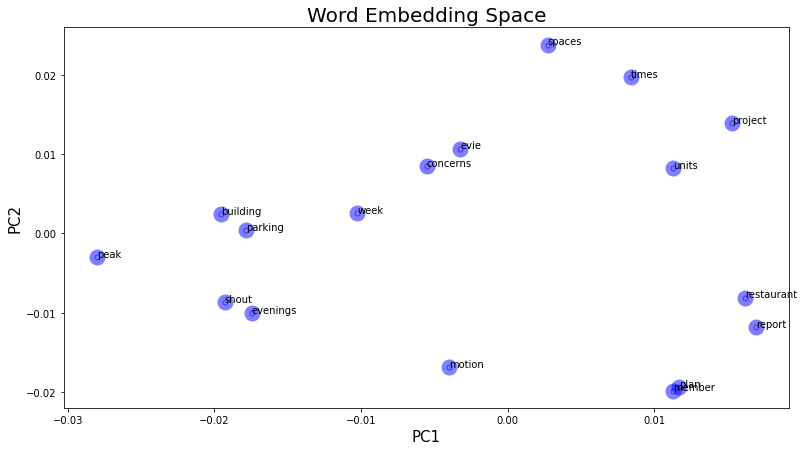

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue',alpha=0.5 )
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
    plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))